In [1]:
# ---------Checking whether the dataset and its binaries exist or not-----------------
# dataset all files are stored in folder named dataset and binaries extracted to binaries folder

In [2]:
!ls ../dataset/binaries

0001d517b935a29dd291ce0e45ad71db0be1617c.dll
0009d99691e8eed99c7dd1500e07cda336d54260.exe
00113d9802cca3deba19cf9daa17f1c2269de2b8.exe
001c4539a58ec70fcc582be8238314c5b5c1075a.dll
002c3a4a12eb9cdc80754e4cddccbc98e5769392.exe
002f4769122206f9d3a9fddaf24b41fc52b226ea.exe
0032014825d220f2a26632baf9ade7bb537bf4ac.exe
0036d720d8ff6c8f4860b5c69deba7c400e4d356.exe
0037c7716f1dc8e5c4e1f9a9f3e9d5aedb7a6979.exe
003824de7a82d2db9fc877c44ea93f76dd0e5ca9.exe
003c10125d80ba6cdbb05bc9aa047c7dbaa6b7ff.exe
003dc277a3bcb5e460a9b71810dff0009667a417.exe
0041fb800343c6120a37adffd35f04665c9243fe.exe
00427746e03afb4d3b28791a82315e52acf66a0b.exe
00475573fe331e89916a27a9207f446bacfcf96a.exe
004bb59ba37917bfea49e6904f0551df7b3c719f.exe
004c4b2857985725eebf69b3f20626c3f7a004fc.exe
005150c72b9cd08a62bc0d730e3593b4f160534a.exe
0051cc8c076eef8b7c3e0304b3aebd2ef40c30ec.exe
005231177f706856a0617a2c871d627ddedf54a7.exe
005e219370aaf892509b509b76cb082b36b16fcf.exe
006277edc5b75123c4273c9b12e5f1ba9e992295.exe
007060db8e

fd28d757838c4b2ee873cf4c4e1bc881425a5202.exe
fd373159d8d3a80fcdbfc3c4e3c55b900dc3860b.exe
fd3c6c46707fa8a7bf539c76a4e7f900428695dd.exe
fd424d872d5af225937bb911794580200db8f868.exe
fd466d0ffa0e6f63abe8b70a3ba3748cd347f33f.exe
fd48fc384cc7376b34866f97f5d6fdb0f4c41459.dll
fd4eaa7a7a2dcf927b7341a1c0ec415a1454b271.exe
fd4fb09ec3077418453d59a232c08c2f0801c253.exe
fd51c7cd33887c80f65543dc8ef0292791c2e36f.exe
fd58e14f769174a8ce70b372cc9248f4588ba862.exe
fd5ec21b4b68b8eb48a7eb56a4e9b96a60f0142b.exe
fd6124cb10a014748d9ae736e6cb72244897b541.exe
fd663a17f1b9c6ffee0c1c96108ae3ac96167862.exe
fd6672606b2bf9f5dca825942b131d4dad42eb9d.exe
fd66fefbfe55f8bfeb284769e5908f98c39a7beb.exe
fd6a5a230c259f850076f65df93224544b87363d.exe
fd6b61857f59334e95aa12c9336425834cd404e8.exe
fd74f9618d8e8d4935c40df2bde4d12e82c3de59.exe
fd77d0fb98fbf42e4f981025d0b80f40009531dd.exe
fd7c4d5592e508549164e4e31a3eec094775a04a.exe
fd7cf22765ce84ea161cb251cd9c908a5b7ec7bc.exe
fd809bd478ee63e2a23e3810efb85bd4bc2ab83f.exe
fd80adffcc

In [3]:
!ls ../dataset

bigdata1		     FIRMA_Release_Signature_v1.0
binaries		     icons_RELEASE1.0.tar.bz2
binaries_RELEASE1.0.tar.bz2  malicia_result
DB_RELEASE1.0_SCHEMA.png     README
DB_RELEASE1.0.sql.bz2	     release_malicia_1.0.tar
Filenames_Type.csv	     topk
finaldataset


In [4]:
!ls

297.ipynb  CS297  CS298_Writing  playground.ipynb  spark-warehouse


In [5]:
# -----------End of Checking whether the dataset and its binaries exist or not-------

In [6]:
# -----------Imports required for project------------

In [7]:
import sys
import numpy as np
import pandas as pd
import pprint
import findspark
findspark.init()
import os
import tensorflow as tf
from tensorflow import keras

In [8]:
# Imported seperately as some dependencies might give error
from pyspark.sql import SparkSession
from pyspark.ml.feature import NGram

In [9]:
# To be executed just once when you start a new session
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [10]:
# -----------End of Imports required for project-----------------

In [11]:
# funtion to create dictionary of files in each family for the dataset
TopFamilyName = []
def createMapOfFamilyToFiles(filenameMappedToFamily):
    nameDictionary = {}
    with open (filenameMappedToFamily,"r") as file:
        content = file.readlines()
        for line in content[1:]:
            line = line.split(",")
            name = line[0].replace("\"","")
            family = line[1].replace("\n","")
            if family not in nameDictionary.keys():
                nameDictionary[family] = [name]
            else :
                nameDictionary.get(family).append(name)
    for key in nameDictionary.keys():
        print(key + str(len(nameDictionary[key])))
        if len(nameDictionary[key]) >= 1000:
            TopFamilyName.append(key.replace('"',''))
    return nameDictionary

In [12]:
nameDictionary = createMapOfFamilyToFiles("../dataset/Filenames_Type.csv")

"winwebsec"4361
"zbot"2136
"zeroaccess"1305
"harebot"53
""1
"cridex"74
"cleaman"32
"smarthdd"68
"CLUSTER:gdata"9
"ransomNoaouy"5
"securityshield"58
"ramnit"4
"CLUSTER:85.93.17.123"45
"CLUSTER:newavr"29
"CLUSTER:46.105.131.121"20
"ufasoft-bitcoin"3
"CLUSTER:positivtkn.in.ua"14
"CLUSTER:foreign"6
"spyeye-ep"5
"CLUSTER:m9swachu.be"1
"CLUSTER:chapterleomemorykombo.eu"9
"unknown"3
"fakeav-rena"2
"WinRescue"5
"CLUSTER:mycomputer"1
"CLUSTER:91.234.32.10"5
"CLUSTER:price.dtdns.net"1
"CLUSTER:fadedtext"1
"CLUSTER:mergenew"3
"CLUSTER:justontime-12.com"1
"CLUSTER:colorballs"1
"CLUSTER:autoit-plus"3
"CLUSTER:dzony3777.su"1
"fakeav-webprotection"3
"cutwail"2
"CLUSTER:bundlemonkey.com"1
"CLUSTER:online-police.com"2
"CLUSTER:floppies"1
"CLUSTER:up2x.com"1
"CLUSTER:halfmoon"1
"CLUSTER:whatismyip.com"1
"CLUSTER:blackandwhite"1
"CLUSTER:azonpowzanadinoar.com"1
"CLUSTER:clarkclark"1
"dprn"1
"CLUSTER:paydayloatnsstc.ru"1
"russkill"1
"CLUSTER:in7cy"1
"CLUSTER:mindamura.com"1


In [13]:
print(TopFamilyName)

['winwebsec', 'zbot', 'zeroaccess']


In [14]:
# Reducing the dataset to the minimum length of topFamily size
minValue = len(nameDictionary['"'+TopFamilyName[0]+'"'])
for familyName in TopFamilyName:
    if len(nameDictionary['"'+familyName+'"']) < minValue:
        minValue = len(nameDictionary['"'+familyName+'"'])
print(minValue)
for familyName in TopFamilyName:
    nameDictionary['"'+familyName+'"'] = nameDictionary['"'+familyName+'"'][:1305] 

1305


In [15]:
path = '../dataset/binaries/'

In [16]:
for key in nameDictionary.keys():
    count = 0;
    for elem in nameDictionary[key]:
        filename = ""
        if os.path.isfile(path+elem+".exe"):
            filename = path+elem+".exe"
            count = count+1            
        elif os.path.isfile(path+elem+".dll"):
            filename = path+elem+".dll"
            count = count+1;
    print(key +" : " +str(count))

"winwebsec" : 1305
"zbot" : 1305
"zeroaccess" : 1305
"harebot" : 53
"" : 1
"cridex" : 74
"cleaman" : 32
"smarthdd" : 68
"CLUSTER:gdata" : 9
"ransomNoaouy" : 5
"securityshield" : 58
"ramnit" : 4
"CLUSTER:85.93.17.123" : 45
"CLUSTER:newavr" : 29
"CLUSTER:46.105.131.121" : 20
"ufasoft-bitcoin" : 3
"CLUSTER:positivtkn.in.ua" : 14
"CLUSTER:foreign" : 6
"spyeye-ep" : 5
"CLUSTER:m9swachu.be" : 1
"CLUSTER:chapterleomemorykombo.eu" : 9
"unknown" : 3
"fakeav-rena" : 2
"WinRescue" : 5
"CLUSTER:mycomputer" : 1
"CLUSTER:91.234.32.10" : 5
"CLUSTER:price.dtdns.net" : 1
"CLUSTER:fadedtext" : 1
"CLUSTER:mergenew" : 3
"CLUSTER:justontime-12.com" : 1
"CLUSTER:colorballs" : 1
"CLUSTER:autoit-plus" : 3
"CLUSTER:dzony3777.su" : 1
"fakeav-webprotection" : 3
"cutwail" : 2
"CLUSTER:bundlemonkey.com" : 1
"CLUSTER:online-police.com" : 2
"CLUSTER:floppies" : 1
"CLUSTER:up2x.com" : 1
"CLUSTER:halfmoon" : 1
"CLUSTER:whatismyip.com" : 1
"CLUSTER:blackandwhite" : 1
"CLUSTER:azonpowzanadinoar.com" : 1
"CLUSTER:clarkcl

In [17]:
# Intialize value of K for the Top K to be used
K = 1000

In [58]:
# ------------Top k for individual family--------------
tmpForTopKNgram = []
for key in nameDictionary.keys():
    freqOfNgramForFamily = {}
    tcounter = 0
    for elem in nameDictionary[key]:
        filename = ""
        if os.path.isfile(path+elem+".exe"):
            filename = path+elem+".exe"
        elif os.path.isfile(path+elem+".dll"):
            filename = path+elem+".dll"
        byteStream = ""
        with open (filename,'r+b') as file:
            byteStream = file.read()
            byteStream = byteStream[2:]
        byteStream = [str(int(tmpByte)) for tmpByte in byteStream]
        byteDataFrame = spark.createDataFrame([(0,byteStream)], ["id","bytes"])
        ngram = NGram(n=2, inputCol="bytes", outputCol="ngrams")
        ngramDataFrame = ngram.transform(byteDataFrame)
        df = ngramDataFrame.select("ngrams").toPandas()
        finalNgram = np.array(df.at[0,"ngrams"])
        freq = np.array(np.unique(finalNgram,return_counts=True)).T
        for element in freq:
            if element[0] in freqOfNgramForFamily.keys():
                freqOfNgramForFamily[element[0]] = int(freqOfNgramForFamily[element[0]]) + int(element[1])
            else :
                freqOfNgramForFamily[element[0]] = int(element[1])
        print(tcounter)
        tcounter = tcounter+1
    topKtuples = sorted(freqOfNgramForFamily.items(), key=lambda kv: kv[1],reverse=True)[:K]
    print("topK for family calculated")
    topKtuples = [key] + topKtuples
    tmpForTopKNgram.append(topKtuples)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965


25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
topK for family calculated
0
topK for family calculated
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
topK for family calculated
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
topK for family calculated
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
topK for family calculated
0
1
2
3
4
5
6
7
8
topK for family calculated
0
1
2
3
4
topK for family calculated
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
topK for family calculated
0
1
2
3
topK f

In [59]:
print(len(tmpForTopKNgram))

49


In [60]:
dataFrameForTopKNgram_ForEachFamily = pd.DataFrame(tmpForTopKNgram,columns=["family"]+[i for i in range(1,K+1)])
dataFrameForTopKNgram_ForEachFamily.to_csv("../dataset/topk/top1000.csv",sep="\t")

In [19]:
# -------------------Read csv file for TopK N Gram----------------------
dataOfCSVFileForTopNgram = pd.read_csv("../dataset/topk/top1000.csv",sep="\t")
dataOfCSVFileForTopNgram.head()
# ----------------------------End------------------------------------------

Unnamed: 0        family                  1                     2  \
0           0   "winwebsec"  ('0 0', 50821516)  ('255 255', 2044769)   
1           1        "zbot"  ('0 0', 34723155)      ('1 1', 2791098)   
2           2  "zeroaccess"  ('0 0', 12024258)     ('66 0', 1118444)   
3           3     "harebot"   ('0 0', 1873141)    ('200 200', 21283)   
4           4            ""      ('0 0', 6680)       ('13 13', 1427)   

                     3                  4                    5  \
0    ('255 1', 735710)  ('1 255', 685596)    ('255 0', 433400)   
1      ('3 3', 807523)    ('1 0', 669557)  ('255 255', 599287)   
2  ('255 255', 478592)  ('0 139', 426499)   ('139 69', 354382)   
3   ('255 255', 21251)    ('64 0', 19393)       ('8 8', 18450)   
4        ('66 0', 817)    ('139 69', 488)      ('139 77', 368)   

                  6                    7                   8  \
0   ('1 0', 343735)  ('204 204', 311998)  ('139 69', 240696)   
1  ('65 0', 443389)      ('2 0', 419323)   ('0 233', 351451)   
2   ('1 0', 326333)     ('67 0', 305088)   ('19 19', 277802)   
3  ('0 255', 10808)       ('66 0', 9565)      ('65 0', 9221)   
4    ('0 139', 367)     ('255 255', 364)        ('1 0', 278)   

         ...                         991               992  \
0        ...          ('255 176', 14970)   ('0 38', 14968)   
1        ...            ('200 0', 12086)  ('222 0', 12079)   
2        ...          ('196 203', 11479)  ('87 40', 11472)   
3        ...            ('248 184', 800)   ('64 112', 800)   
4        ...                ('64 24', 8)     ('69 152', 8)   

                  993                994                 995  \
0  ('232 131', 14968)  ('116 13', 14967)  ('211 211', 14966)   
1  ('226 251', 12073)   ('255 2', 12072)  ('255 207', 12072)   
2   ('233 66', 11458)    ('93 0', 11452)   ('161 66', 11443)   
3    ('136 104', 799)   ('216 208', 799)     ('216 48', 799)   
4       ('69 160', 8)        ('72 0', 8)       ('76 141', 8)   

                 996                997                 998  \
0   ('0 233', 14965)  ('255 52', 14958)    ('142 0', 14951)   
1   ('220 0', 12058)   ('3 232', 12057)  ('245 245', 12017)   
2  ('198 66', 11432)  ('15 140', 11427)  ('149 156', 11426)   
3   ('224 224', 799)    ('24 224', 799)    ('255 141', 799)   
4      ('77 254', 8)      ('78 137', 8)        ('78 69', 8)   

                  999               1000  
0  ('158 255', 14949)     ('1 4', 14946)  
1    ('243 6', 12011)    ('72 9', 12007)  
2    ('13 12', 11424)  ('139 83', 11420)  
3     ('72 200', 799)      ('8 40', 799)  
4        ('79 58', 8)       ('8 105', 8)  

[5 rows x 1002 columns]

In [20]:
print(dataOfCSVFileForTopNgram)

    Unnamed: 0                              family                   1  \
0            0                         "winwebsec"   ('0 0', 50821516)   
1            1                              "zbot"   ('0 0', 34723155)   
2            2                        "zeroaccess"   ('0 0', 12024258)   
3            3                           "harebot"    ('0 0', 1873141)   
4            4                                  ""       ('0 0', 6680)   
5            5                            "cridex"    ('0 0', 1092437)   
6            6                           "cleaman"     ('0 0', 259076)   
7            7                          "smarthdd"     ('0 0', 311576)   
8            8                     "CLUSTER:gdata"      ('0 0', 76760)   
9            9                      "ransomNoaouy"      ('0 0', 26952)   
10          10                    "securityshield"    ('0 0', 2243322)   
11          11                            "ramnit"      ('0 0', 34007)   
12          12              "CLUSTER:8

In [63]:
# --------------------Make Dictionary for topKNgrams from pandas frame---------------
dataOfCSVFileForTopNgram_List = dataOfCSVFileForTopNgram.values.tolist()
mapOfFamilyToTopKNgram = {}
for row in dataOfCSVFileForTopNgram_List:
    key_Family = row[1].replace('"',"")
    value_topK = []
    for ngram_iter in row[2:]:
        tmp_row = ngram_iter.replace("(","").replace(")","").replace("'","").split(",")
        tmp_row[1] = int(tmp_row[1].replace(" ",""))
        value_topK.append(tmp_row)
    mapOfFamilyToTopKNgram[key_Family] = value_topK
print(mapOfFamilyToTopKNgram)
# -------------------End-----------------------------------------

{'winwebsec': [['0 0', 50821516], ['255 255', 2044769], ['255 1', 735710], ['1 255', 685596], ['255 0', 433400], ['1 0', 343735], ['204 204', 311998], ['139 69', 240696], ['0 255', 228066], ['0 1', 221911], ['0 139', 214560], ['139 77', 211514], ['65 0', 203962], ['1 1', 199812], ['64 0', 199184], ['254 254', 175112], ['240 240', 163703], ['0 131', 160628], ['70 0', 159315], ['254 255', 157394], ['139 85', 152169], ['16 0', 143872], ['255 21', 135628], ['0 16', 132246], ['131 196', 126800], ['137 69', 114280], ['106 0', 112629], ['199 69', 112614], ['0 106', 112277], ['0 32', 111588], ['32 0', 108693], ['69 0', 108376], ['240 1', 103893], ['133 192', 102698], ['255 117', 100534], ['69 252', 100002], ['2 0', 97724], ['51 192', 97481], ['1 240', 96523], ['254 1', 95965], ['4 0', 92982], ['131 125', 88456], ['1 254', 87155], ['68 0', 86228], ['77 252', 84509], ['0 116', 84184], ['0 117', 82822], ['0 137', 82078], ['0 199', 80798], ['255 131', 79445], ['69 8', 76562], ['85 139', 75667], ['

In [64]:
# ----------------Generate feature vector by combining all the topk ngrams of all family---------------
dictionaryForMakingFeatureVector = {}
for familyName in mapOfFamilyToTopKNgram.keys():
    for everyTuple in mapOfFamilyToTopKNgram[familyName]:
        if everyTuple[0] in dictionaryForMakingFeatureVector.keys():
            dictionaryForMakingFeatureVector[everyTuple[0]] = dictionaryForMakingFeatureVector[everyTuple[0]]+everyTuple[1]
        else:
            dictionaryForMakingFeatureVector[everyTuple[0]] = everyTuple[1]
featureVectorTopK = sorted(dictionaryForMakingFeatureVector.items(), key=lambda kv: kv[1],reverse=True)[:K]

In [65]:
print(featureVectorTopK)

[('0 0', 107241483), ('255 255', 3586512), ('1 1', 3015489), ('1 0', 1478309), ('66 0', 1323310), ('65 0', 860273), ('0 255', 828519), ('2 0', 823577), ('3 3', 813006), ('255 1', 809541), ('0 139', 783269), ('1 255', 751774), ('139 69', 696368), ('255 0', 684139), ('64 0', 603978), ('4 0', 564037), ('3 0', 556336), ('204 204', 538782), ('139 77', 537285), ('0 233', 528275), ('254 255', 522953), ('0 1', 444132), ('0 199', 438952), ('199 69', 419042), ('67 0', 403639), ('0 131', 383188), ('255 117', 372804), ('139 85', 369556), ('253 255', 356918), ('16 0', 352177), ('137 69', 344838), ('68 0', 341920), ('0 104', 321567), ('5 0', 317204), ('0 137', 303071), ('255 21', 295258), ('0 32', 286218), ('19 19', 281780), ('32 0', 272415), ('0 116', 264782), ('0 16', 258642), ('69 252', 253906), ('0 128', 253267), ('255 37', 249366), ('0 117', 249030), ('0 15', 248255), ('101 0', 246657), ('69 0', 243496), ('255 139', 239871), ('0 51', 238801), ('231 3', 233650), ('106 0', 231587), ('70 0', 22708

In [66]:
dataset = []
# label1 = []
# label2 = []
# label3 = []
for key in nameDictionary.keys():
    counter = 0
    topKtuplesForFamily = mapOfFamilyToTopKNgram[key.replace('"',"")]
    for elem in nameDictionary[key]:
        freqOfNgramForSample = {}
        filename = ""
        if os.path.isfile(path+elem+".exe"):
          filename = path+elem+".exe"
        elif os.path.isfile(path+elem+".dll"):
          filename = path+elem+".dll"
        byteStream = ""
        with open (filename,'r+b') as file:
          byteStream = file.read()
          byteStream = byteStream[2:]
        byteStream = [str(int(elem)) for elem in byteStream]
        byteDataFrame = spark.createDataFrame([(0,byteStream)], ["id","bytes"])
        ngram = NGram(n=2, inputCol="bytes", outputCol="ngrams")
        ngramDataFrame = ngram.transform(byteDataFrame)
        df = ngramDataFrame.select("ngrams").toPandas()
        finalNgram = np.array(df.at[0,"ngrams"])
        freq = np.array(np.unique(finalNgram,return_counts=True)).T
        for element in freq:
          if element[0] in freqOfNgramForSample.keys():
            freqOfNgramForSample[element[0]] = int(freqOfNgramForSample[element[0]]) + int(element[1])
          else :
            freqOfNgramForSample[element[0]] = int(element[1])
        
        topKFreqForSample = []
        for ngram_tuple in featureVectorTopK:
            if ngram_tuple[0] in freqOfNgramForSample.keys():
                topKFreqForSample.append(freqOfNgramForSample[ngram_tuple[0]])
            else :
                topKFreqForSample.append(0)
        sumOfRow = sum(topKFreqForSample)
        for i in range(0,len(topKFreqForSample)):
            topKFreqForSample[i] = float(topKFreqForSample[i])/sumOfRow
        topKFreqForSample = [key.replace('"','')]+topKFreqForSample
        dataset.append(topKFreqForSample)
#         if key.replace('"','') == 'winwebsec':
#             label1.append(0)
#         else :
#             label1.append(1)
#         if key.replace('"','') == 'zbot':
#             label2.append(0)
#         else :
#             label2.append(1)
#         if key.replace('"','') == 'zeroaccess':
#             label3.append(0)
#         else :
#             label3.append(1)

        print (counter)
        counter = counter + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971


51
52
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
0
1
2
3
4
5
6
7
8
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
0
1
2
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4


In [32]:
dataset_Tmp = pd.DataFrame(dataset,columns=["Family Name"]+[i for i in range(1,K+1)])
dataset_Tmp.to_csv("../dataset/finaldataset/top1000_malicia.csv",sep="\t")

NameError: name 'dataset' is not defined

In [18]:
dataset_dataframe = pd.read_csv("../dataset/finaldataset/top1000_malicia.csv",sep="\t")
dataset_dataframe.head()

Unnamed: 0 Family Name         1         2         3         4         5  \
0           0   winwebsec  0.718341  0.005233  0.000200  0.002097  0.000080   
1           1   winwebsec  0.636010  0.057839  0.002298  0.003475  0.000168   
2           2   winwebsec  0.634146  0.003071  0.000197  0.002106  0.000132   
3           3   winwebsec  0.740424  0.026506  0.002622  0.004491  0.004308   
4           4   winwebsec  0.696610  0.008220  0.000492  0.002254  0.000114   

          6         7         8    ...          991       992       993  \
0  0.004934  0.002317  0.000979    ...     0.000260  0.000200  0.000180   
1  0.000645  0.000981  0.000308    ...     0.000112  0.000224  0.000168   
2  0.000943  0.001930  0.001075    ...     0.000307  0.000154  0.000285   
3  0.000269  0.001558  0.000634    ...     0.000236  0.000118  0.000086   
4  0.004223  0.002519  0.000928    ...     0.000246  0.000189  0.000114   

        994       995       996       997       998       999      1000  
0  0.000160  0.000100  0.000120  0.000180  0.000459  0.000220  0.000240  
1  0.000112  0.000336  0.000140  0.000196  0.000196  0.000168  0.000140  
2  0.000088  0.000110  0.000154  0.000241  0.000483  0.000263  0.000417  
3  0.000011  0.000150  0.000032  0.000140  0.000236  0.000021  0.000247  
4  0.000114  0.000208  0.000133  0.000170  0.000341  0.000057  0.000265  

[5 rows x 1002 columns]

In [19]:
print(len(dataset_dataframe))

4398


In [20]:
dataset = np.array(dataset_dataframe.iloc[:,2:])

In [21]:
y = np.array(dataset_dataframe.loc[:,"Family Name"])

In [22]:
topfam = set(TopFamilyName) 
label = []
for familyname in y:
    if familyname in topfam:
        for name_index in range(0,len(TopFamilyName)):
            if familyname == TopFamilyName[name_index]:
                label.append(name_index)
    else :
        label.append(len(TopFamilyName))
label = np.array(label)

In [23]:
print(len(label))

4398


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [25]:
# # Dividing the dataset into various sub-dataset
# skf = StratifiedKFold(n_splits=10,shuffle=True)
# subDatasetIndex = []
# for train_index, test_index in skf.split(dataset,label):
#     subDatasetIndex.append(test_index)
# # Verifying the whether the total is equal to total dataset
# sum = 0;
# for elem in subDatasetIndex:
#     print(len(elem))
#     sum = sum+len(elem)
# print(sum)

In [26]:
# MeanScoreForAll = []
# sizeOfEachDataset = []
# for i in range(1,11):
#     X = []
#     Y = []
#     tmp_sizeOfEachDataset_sum = 0;
#     for j in range (0,i):
#         tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
#         for rowIndex in subDatasetIndex[j]:
#             X.append(dataset[rowIndex])
#             Y.append(label[rowIndex])
#     sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
#     X = np.array(X)
#     Y = np.array(Y)
#     mean_accuracy_array = []
#     k_range = range(1, 31)
#     k_scores = []
#     # 1. we will loop through reasonable values of k
#     for k in k_range:
#         # 2. run KNeighborsClassifier with k neighbours
#         knn = KNeighborsClassifier(n_neighbors=k)
#         # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
#         cv = StratifiedKFold(n_splits=10,shuffle=True)
#         scores = cross_val_score(knn, X, Y, cv=cv, scoring='accuracy')
#         # 4. append mean of scores for k neighbors to k_scores list
#         k_scores.append(scores.mean())
#     print("For i = " + str(i))
#     print("Scores For K ranging from 1 to 30 \n" + str(k_scores))
#     highestAccuracy_k = (k_scores.index(max(k_scores))+1)
#     print("K with highest accuracy and its accuracy : " + str(highestAccuracy_k) +" , " + str(k_scores[highestAccuracy_k-1]))
#     mean_accuracy_array.append(k_scores[highestAccuracy_k-1])
#     mean = np.mean(mean_accuracy_array)
#     MeanScoreForAll.append(mean)
#     print("Mean Accuracy : " + str(mean))
#     print("\n\n")

In [42]:
avg_scores_knn = [0 for i in range(0,10)]
n_itr = 5
for itr in range(0,n_itr):
    # Dividing the dataset into various sub-dataset
    skf = StratifiedKFold(n_splits=10,shuffle=True)
    subDatasetIndex = []
    for train_index, test_index in skf.split(dataset,label):
        subDatasetIndex.append(test_index)
    # Verifying the whether the total is equal to total dataset
    sum = 0;
    for elem in subDatasetIndex:
        print(len(elem))
        sum = sum+len(elem)

    MeanScoreForAll = []
    sizeOfEachDataset = []
    for i in range(1,11):
        X = []
        Y = []
        tmp_sizeOfEachDataset_sum = 0;
        for j in range (0,i):
            tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
            for rowIndex in subDatasetIndex[j]:
                X.append(dataset[rowIndex])
                Y.append(label[rowIndex])
        sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
        X = np.array(X)
        Y = np.array(Y)
        mean_accuracy_array = []
        k_range = range(1, 31)
        k_scores = []
        # 1. we will loop through reasonable values of k
        for k in k_range:
            # 2. run KNeighborsClassifier with k neighbours
            knn = KNeighborsClassifier(n_neighbors=k)
            # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
            cv = StratifiedKFold(n_splits=10,shuffle=True)
            scores = cross_val_score(knn, X, Y, cv=cv, scoring='accuracy')
            # 4. append mean of scores for k neighbors to k_scores list
            k_scores.append(scores.mean())
        print("For i = " + str(i))
        print("Scores For K ranging from 1 to 30 \n" + str(k_scores))
        highestAccuracy_k = (k_scores.index(max(k_scores))+1)
        print("K with highest accuracy and its accuracy : " + str(highestAccuracy_k) +" , " + str(k_scores[highestAccuracy_k-1]))
        mean_accuracy_array.append(k_scores[highestAccuracy_k-1])
        mean = np.mean(mean_accuracy_array)
        MeanScoreForAll.append(mean)
        print("Mean Accuracy : " + str(mean))
        print("\n\n")
    for i in range(0,len(MeanScoreForAll)):
        avg_scores_knn[i] = avg_scores_knn[i]+MeanScoreForAll[i]

442
442
442
441
441
438
438
438
438
438
For i = 1
Scores For K ranging from 1 to 30 
[0.9384249471458774, 0.9096576852143403, 0.8985313301246007, 0.8867324906661869, 0.8685900319373847, 0.8551909495749179, 0.8620619855157214, 0.866303809995052, 0.8464430300031488, 0.8255262921146146, 0.8122857721200127, 0.8008827763033602, 0.790007197157123, 0.7783534253969682, 0.7689588862399352, 0.7580968017633034, 0.751120057577257, 0.7504734379919932, 0.7355011020646843, 0.722392155098736, 0.7353290450272143, 0.751463047096397, 0.7489395438801673, 0.7255656515676308, 0.7401916243083981, 0.726436057757186, 0.7014754172102019, 0.7034186496333948, 0.7036694255768972, 0.6994669605505826]
K with highest accuracy and its accuracy : 1 , 0.9384249471458774
Mean Accuracy : 0.9384249471458774



For i = 2
Scores For K ranging from 1 to 30 
[0.9447886883231711, 0.9388899893210239, 0.9400297977884184, 0.9310512763098971, 0.9275394146083803, 0.9150490314283418, 0.9093314731245765, 0.8970579707648673, 0.89143801

For i = 2
Scores For K ranging from 1 to 30 
[0.9434667344150102, 0.9308997037445315, 0.9290294475639301, 0.9254295991364957, 0.9093593188420774, 0.9139893152824188, 0.9130062466269363, 0.9039772009599595, 0.8970823716513372, 0.8892254297426712, 0.8800857188788225, 0.8689939370973854, 0.8618255307910481, 0.8622785260716295, 0.8610751317647869, 0.8631230838127391, 0.8697374464615845, 0.8611404400197504, 0.8666706856362028, 0.8532102954516748, 0.8515460114598046, 0.846004426607875, 0.8487380435656299, 0.8463102988965059, 0.8384619690654173, 0.82689623594796, 0.8158322998840241, 0.8047065003961554, 0.801043066129273, 0.7825921205231551]
K with highest accuracy and its accuracy : 1 , 0.9434667344150102
Mean Accuracy : 0.9434667344150102



For i = 3
Scores For K ranging from 1 to 30 
[0.9564063022078289, 0.9366909553550775, 0.9404625131724368, 0.934524507158095, 0.9298890945074152, 0.9238216773331276, 0.9223570308684813, 0.9162675097026242, 0.9147870563137739, 0.9104041689156193, 0.9057561

For i = 3
Scores For K ranging from 1 to 30 
[0.9495029172128409, 0.9276947592978126, 0.9404572441977022, 0.9246586732464595, 0.9214984450098955, 0.9117788572750405, 0.9124796309147454, 0.9095292620865137, 0.9081083095586913, 0.9048533682884827, 0.9042141516950677, 0.9026195800241602, 0.9004657259619092, 0.9018109851697638, 0.9035575860385021, 0.8982361785796901, 0.9050616855578688, 0.9005267689618834, 0.900543089932403, 0.8945671730022875, 0.8905583828102911, 0.8921197984938443, 0.8853073996967128, 0.8891962885856015, 0.8905815148944919, 0.8875790988768089, 0.8840337214383014, 0.8778263551545994, 0.8816426350014137, 0.8808161770375511]
K with highest accuracy and its accuracy : 1 , 0.9495029172128409
Mean Accuracy : 0.9495029172128409



For i = 4
Scores For K ranging from 1 to 30 
[0.9592183668287021, 0.9400261372705507, 0.9451722411666544, 0.936632627149387, 0.9371819814263949, 0.9305386708263803, 0.9320995066386126, 0.9286583835159256, 0.9230778495247769, 0.9235218022201265, 0.9196

For i = 4
Scores For K ranging from 1 to 30 
[0.9558982260756004, 0.9395153087136328, 0.941229376768483, 0.9377722375389974, 0.9320837081912501, 0.9315410650801711, 0.9303882500181382, 0.9220245955162157, 0.9196308858739025, 0.9174629072045274, 0.9196178988609155, 0.9186217804541827, 0.9133830443299716, 0.9162596677065951, 0.9156722230283683, 0.9109888993687877, 0.9054600957701515, 0.8992185300732786, 0.9010189545091778, 0.9026791337154465, 0.9014598781107163, 0.9026890916346224, 0.900881956032794, 0.90210142929696, 0.8974343394036133, 0.8998572698251468, 0.898691903068998, 0.894711165929043, 0.8908070449103971, 0.8913721976347675]
K with highest accuracy and its accuracy : 1 , 0.9558982260756004
Mean Accuracy : 0.9558982260756004



For i = 5
Scores For K ranging from 1 to 30 
[0.9619576484156619, 0.9443237819796577, 0.9533474841018302, 0.9420117334608398, 0.939309141440722, 0.93386458207086, 0.9325192905910396, 0.9316569902416699, 0.924803745941408, 0.9234563238218254, 0.921185670589

For i = 5
Scores For K ranging from 1 to 30 
[0.9669167539675556, 0.9465986964911959, 0.9515309891868646, 0.9401996105079832, 0.9389016635039118, 0.9338603207913362, 0.932068729458004, 0.9307276992577073, 0.9289279174130824, 0.9301623602839895, 0.9262019990381685, 0.9225819037293943, 0.9203380633536049, 0.9171644892635126, 0.9167484887676547, 0.9144304910598908, 0.9188512918594618, 0.916664563697551, 0.9144696450243475, 0.9117485413418823, 0.9102351783566845, 0.9094941584498683, 0.9112160750959204, 0.9125981685352652, 0.9099197053186856, 0.9098380215709291, 0.9048499725230483, 0.9057159807390166, 0.9029679535177417, 0.9026547218020896]
K with highest accuracy and its accuracy : 1 , 0.9669167539675556
Mean Accuracy : 0.9669167539675556



For i = 6
Scores For K ranging from 1 to 30 
[0.9693786844605425, 0.9501240819398007, 0.9527399799965586, 0.9437115988158974, 0.9421750053777587, 0.9383926931868055, 0.9338956878675091, 0.9308509182556083, 0.930090526225848, 0.9270844796872773, 0.92633

In [45]:
for score in avg_scores_knn:
    print((score*100)/5)

92.42514956592146
94.25728294693812
95.41338062559437
95.900195893492
96.30267923799468
96.72012795692397
96.8941797306643
97.00144919738139
97.21230518072596
97.1759117415846


In [46]:
# avg_scores_knn = [0.9233469029733256, 0.9410407121614017, 0.9540546688256611, 0.9559237647827035, 0.9592485537936731, 0.9637551391187843, 0.9675862869402604, 0.9707539579065003, 0.9689373262250338, 0.9724778074208258]
# n_itr = 5
tmp = avg_scores_knn
for i in range(0,len(avg_scores_knn)):
    avg_scores_knn[i] = avg_scores_knn[i] / n_itr
print(avg_scores_knn)

[0.9242514956592146, 0.9425728294693811, 0.9541338062559437, 0.9590019589349199, 0.9630267923799469, 0.9672012795692397, 0.968941797306643, 0.970014491973814, 0.9721230518072597, 0.9717591174158459]


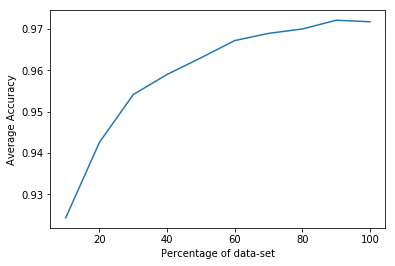

In [48]:
x_axis = [10*i for i in range(1,11)]
y_axis = avg_scores_knn
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.xlabel('Percentage of data-set')
plt.ylabel('Average Accuracy')
plt.show()

In [38]:
print(y_axis)

[0.9233469029733256, 0.9410407121614017, 0.9540546688256611, 0.9559237647827035, 0.9592485537936731, 0.9637551391187843, 0.9675862869402604, 0.9707539579065003, 0.9689373262250338, 0.9724778074208258]


In [26]:
# ----------------------------Deep Neural Netowrk----------------------

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.1)

In [28]:
print(len(X_train[0]))

1000


In [29]:
# model = keras.Sequential([
#     keras.layers.Dense(128,input_shape=(1000,)),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dense(4, activation=tf.nn.softmax)
# ])
model = keras.Sequential()
model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal',input_dim=1000))
model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal'))
model.add(keras.layers.Dense(4, activation='sigmoid', kernel_initializer='random_normal'))

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
3958/3958 [==============================] - 1s 328us/sample - loss: 1.2012 - acc: 0.6190
Epoch 2/5
3958/3958 [==============================] - 1s 142us/sample - loss: 0.5143 - acc: 0.8325
Epoch 3/5
3958/3958 [==============================] - 1s 183us/sample - loss: 0.2764 - acc: 0.9176
Epoch 4/5
3958/3958 [==============================] - 1s 187us/sample - loss: 0.2021 - acc: 0.9447
Epoch 5/5
3958/3958 [==============================] - 0s 101us/sample - loss: 0.1703 - acc: 0.9515


In [103]:
loss, acc = model.evaluate(X_test,y_test)

440/440 [==============================] - 0s 422us/sample - loss: 0.1456 - acc: 0.9523


In [32]:
print(model.metrics)

In [142]:
Acc_ScoreForAll_DNN = []
Loss_ScoreForAll_DNN = []
sizeOfEachDataset = []
for i in range(1,11):
    print("------" + str(i) + "--------")
    X = []
    Y = []
    tmp_sizeOfEachDataset_sum = 0;
    for j in range (0,i):
        tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
        for rowIndex in subDatasetIndex[j]:
            X.append(dataset[rowIndex])
            Y.append(label[rowIndex])
    sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
    X = np.array(X)
    Y = np.array(Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
    model = keras.Sequential()
    model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal',input_dim=1000))
    model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal'))
    model.add(keras.layers.Dense(4, activation='sigmoid', kernel_initializer='random_normal'))
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=1000)
    loss, acc = model.evaluate(X_test,y_test)
    Acc_ScoreForAll_DNN.append(acc)
    Loss_ScoreForAll_DNN.append(loss)

------1--------
Epoch 1/1000
397/397 [==============================] - 1s 3ms/sample - loss: 1.3815 - acc: 0.3401
Epoch 2/1000
397/397 [==============================] - 0s 243us/sample - loss: 1.3642 - acc: 0.3149
Epoch 3/1000
397/397 [==============================] - 0s 218us/sample - loss: 1.3307 - acc: 0.3325
Epoch 4/1000
397/397 [==============================] - 0s 266us/sample - loss: 1.2891 - acc: 0.3123
Epoch 5/1000
397/397 [==============================] - 0s 252us/sample - loss: 1.2405 - acc: 0.5164
Epoch 6/1000
397/397 [==============================] - 0s 239us/sample - loss: 1.1734 - acc: 0.6524
Epoch 7/1000
397/397 [==============================] - 0s 238us/sample - loss: 1.0951 - acc: 0.6801
Epoch 8/1000
397/397 [==============================] - 0s 227us/sample - loss: 1.0119 - acc: 0.6675
Epoch 9/1000
397/397 [==============================] - 0s 307us/sample - loss: 0.9137 - acc: 0.7431
Epoch 10/1000
397/397 [==============================] - 0s 249us/sample - lo

397/397 [==============================] - 0s 226us/sample - loss: 0.0020 - acc: 1.0000
Epoch 161/1000
397/397 [==============================] - 0s 241us/sample - loss: 0.0019 - acc: 1.0000
Epoch 162/1000
397/397 [==============================] - 0s 239us/sample - loss: 0.0019 - acc: 1.0000
Epoch 163/1000
397/397 [==============================] - 0s 219us/sample - loss: 0.0018 - acc: 1.0000
Epoch 164/1000
397/397 [==============================] - 0s 243us/sample - loss: 0.0018 - acc: 1.0000
Epoch 165/1000
397/397 [==============================] - 0s 214us/sample - loss: 0.0018 - acc: 1.0000
Epoch 166/1000
397/397 [==============================] - 0s 246us/sample - loss: 0.0017 - acc: 1.0000
Epoch 167/1000
397/397 [==============================] - 0s 234us/sample - loss: 0.0017 - acc: 1.0000
Epoch 168/1000
397/397 [==============================] - 0s 234us/sample - loss: 0.0017 - acc: 1.0000
Epoch 169/1000
397/397 [==============================] - 0s 233us/sample - loss: 0.0016

397/397 [==============================] - 0s 246us/sample - loss: 2.5100e-04 - acc: 1.0000
Epoch 315/1000
397/397 [==============================] - 0s 246us/sample - loss: 2.4868e-04 - acc: 1.0000
Epoch 316/1000
397/397 [==============================] - 0s 212us/sample - loss: 2.4845e-04 - acc: 1.0000
Epoch 317/1000
397/397 [==============================] - 0s 212us/sample - loss: 2.4460e-04 - acc: 1.0000
Epoch 318/1000
397/397 [==============================] - 0s 223us/sample - loss: 2.4515e-04 - acc: 1.0000
Epoch 319/1000
397/397 [==============================] - 0s 248us/sample - loss: 2.3994e-04 - acc: 1.0000
Epoch 320/1000
397/397 [==============================] - 0s 241us/sample - loss: 2.3656e-04 - acc: 1.0000
Epoch 321/1000
397/397 [==============================] - 0s 216us/sample - loss: 2.4413e-04 - acc: 1.0000
Epoch 322/1000
397/397 [==============================] - 0s 226us/sample - loss: 2.2955e-04 - acc: 1.0000
Epoch 323/1000
397/397 [============================

397/397 [==============================] - 0s 247us/sample - loss: 6.4699e-05 - acc: 1.0000
Epoch 467/1000
397/397 [==============================] - 0s 221us/sample - loss: 6.4659e-05 - acc: 1.0000
Epoch 468/1000
397/397 [==============================] - 0s 249us/sample - loss: 6.4358e-05 - acc: 1.0000
Epoch 469/1000
397/397 [==============================] - 0s 222us/sample - loss: 6.4327e-05 - acc: 1.0000
Epoch 470/1000
397/397 [==============================] - 0s 221us/sample - loss: 6.3863e-05 - acc: 1.0000
Epoch 471/1000
397/397 [==============================] - 0s 238us/sample - loss: 6.2400e-05 - acc: 1.0000
Epoch 472/1000
397/397 [==============================] - 0s 235us/sample - loss: 6.1976e-05 - acc: 1.0000
Epoch 473/1000
397/397 [==============================] - 0s 230us/sample - loss: 6.2248e-05 - acc: 1.0000
Epoch 474/1000
397/397 [==============================] - 0s 253us/sample - loss: 6.0059e-05 - acc: 1.0000
Epoch 475/1000
397/397 [============================

397/397 [==============================] - 0s 217us/sample - loss: 1.9930e-05 - acc: 1.0000
Epoch 619/1000
397/397 [==============================] - 0s 250us/sample - loss: 1.9780e-05 - acc: 1.0000
Epoch 620/1000
397/397 [==============================] - 0s 214us/sample - loss: 1.9679e-05 - acc: 1.0000
Epoch 621/1000
397/397 [==============================] - 0s 235us/sample - loss: 1.9990e-05 - acc: 1.0000
Epoch 622/1000
397/397 [==============================] - 0s 242us/sample - loss: 1.9627e-05 - acc: 1.0000
Epoch 623/1000
397/397 [==============================] - 0s 250us/sample - loss: 1.9337e-05 - acc: 1.0000
Epoch 624/1000
397/397 [==============================] - 0s 227us/sample - loss: 1.9027e-05 - acc: 1.0000
Epoch 625/1000
397/397 [==============================] - 0s 230us/sample - loss: 1.9114e-05 - acc: 1.0000
Epoch 626/1000
397/397 [==============================] - 0s 236us/sample - loss: 1.9105e-05 - acc: 1.0000
Epoch 627/1000
397/397 [============================

397/397 [==============================] - 0s 271us/sample - loss: 6.9592e-06 - acc: 1.0000
Epoch 771/1000
397/397 [==============================] - 0s 236us/sample - loss: 6.9598e-06 - acc: 1.0000
Epoch 772/1000
397/397 [==============================] - 0s 223us/sample - loss: 6.8073e-06 - acc: 1.0000
Epoch 773/1000
397/397 [==============================] - 0s 236us/sample - loss: 6.8097e-06 - acc: 1.0000
Epoch 774/1000
397/397 [==============================] - 0s 219us/sample - loss: 6.8091e-06 - acc: 1.0000
Epoch 775/1000
397/397 [==============================] - 0s 238us/sample - loss: 6.6644e-06 - acc: 1.0000
Epoch 776/1000
397/397 [==============================] - 0s 259us/sample - loss: 6.7532e-06 - acc: 1.0000
Epoch 777/1000
397/397 [==============================] - 0s 236us/sample - loss: 6.6211e-06 - acc: 1.0000
Epoch 778/1000
397/397 [==============================] - 0s 227us/sample - loss: 6.6097e-06 - acc: 1.0000
Epoch 779/1000
397/397 [============================

397/397 [==============================] - 0s 240us/sample - loss: 2.8667e-06 - acc: 1.0000
Epoch 923/1000
397/397 [==============================] - 0s 230us/sample - loss: 2.7877e-06 - acc: 1.0000
Epoch 924/1000
397/397 [==============================] - 0s 239us/sample - loss: 2.7370e-06 - acc: 1.0000
Epoch 925/1000
397/397 [==============================] - 0s 232us/sample - loss: 2.7193e-06 - acc: 1.0000
Epoch 926/1000
397/397 [==============================] - 0s 241us/sample - loss: 2.6568e-06 - acc: 1.0000
Epoch 927/1000
397/397 [==============================] - 0s 243us/sample - loss: 2.6610e-06 - acc: 1.0000
Epoch 928/1000
397/397 [==============================] - 0s 235us/sample - loss: 2.6520e-06 - acc: 1.0000
Epoch 929/1000
397/397 [==============================] - 0s 237us/sample - loss: 2.6619e-06 - acc: 1.0000
Epoch 930/1000
397/397 [==============================] - 0s 216us/sample - loss: 2.6592e-06 - acc: 1.0000
Epoch 931/1000
397/397 [============================

795/795 [==============================] - 0s 208us/sample - loss: 0.0097 - acc: 0.9975
Epoch 78/1000
795/795 [==============================] - 0s 204us/sample - loss: 0.0104 - acc: 0.9975
Epoch 79/1000
795/795 [==============================] - 0s 202us/sample - loss: 0.0094 - acc: 0.9975
Epoch 80/1000
795/795 [==============================] - 0s 203us/sample - loss: 0.0097 - acc: 0.9975
Epoch 81/1000
795/795 [==============================] - 0s 204us/sample - loss: 0.0098 - acc: 0.9950
Epoch 82/1000
795/795 [==============================] - 0s 206us/sample - loss: 0.0090 - acc: 0.9975
Epoch 83/1000
795/795 [==============================] - 0s 203us/sample - loss: 0.0081 - acc: 0.9975
Epoch 84/1000
795/795 [==============================] - 0s 211us/sample - loss: 0.0077 - acc: 0.9975
Epoch 85/1000
795/795 [==============================] - 0s 202us/sample - loss: 0.0079 - acc: 0.9975
Epoch 86/1000
795/795 [==============================] - 0s 200us/sample - loss: 0.0081 - acc: 0

795/795 [==============================] - 0s 227us/sample - loss: 0.0013 - acc: 1.0000
Epoch 236/1000
795/795 [==============================] - 0s 208us/sample - loss: 0.0015 - acc: 1.0000
Epoch 237/1000
795/795 [==============================] - 0s 199us/sample - loss: 9.9687e-04 - acc: 1.0000
Epoch 238/1000
795/795 [==============================] - 0s 198us/sample - loss: 8.6170e-04 - acc: 1.0000
Epoch 239/1000
795/795 [==============================] - 0s 212us/sample - loss: 9.3970e-04 - acc: 1.0000
Epoch 240/1000
795/795 [==============================] - 0s 205us/sample - loss: 0.0015 - acc: 1.0000
Epoch 241/1000
795/795 [==============================] - 0s 211us/sample - loss: 0.0014 - acc: 0.9987
Epoch 242/1000
795/795 [==============================] - 0s 212us/sample - loss: 0.0035 - acc: 0.9987
Epoch 243/1000
795/795 [==============================] - 0s 215us/sample - loss: 0.0015 - acc: 0.9987
Epoch 244/1000
795/795 [==============================] - 0s 207us/sample - 

795/795 [==============================] - 0s 210us/sample - loss: 1.5787e-04 - acc: 1.0000
Epoch 389/1000
795/795 [==============================] - 0s 214us/sample - loss: 2.2620e-04 - acc: 1.0000
Epoch 390/1000
795/795 [==============================] - 0s 201us/sample - loss: 1.3516e-04 - acc: 1.0000
Epoch 391/1000
795/795 [==============================] - 0s 217us/sample - loss: 1.0753e-04 - acc: 1.0000
Epoch 392/1000
795/795 [==============================] - 0s 208us/sample - loss: 1.5155e-04 - acc: 1.0000
Epoch 393/1000
795/795 [==============================] - 0s 211us/sample - loss: 1.1698e-04 - acc: 1.0000
Epoch 394/1000
795/795 [==============================] - 0s 216us/sample - loss: 1.1505e-04 - acc: 1.0000
Epoch 395/1000
795/795 [==============================] - 0s 207us/sample - loss: 1.4512e-04 - acc: 1.0000
Epoch 396/1000
795/795 [==============================] - 0s 205us/sample - loss: 1.7345e-04 - acc: 1.0000
Epoch 397/1000
795/795 [============================

795/795 [==============================] - 0s 213us/sample - loss: 3.0025e-05 - acc: 1.0000
Epoch 541/1000
795/795 [==============================] - 0s 205us/sample - loss: 3.2000e-05 - acc: 1.0000
Epoch 542/1000
795/795 [==============================] - 0s 207us/sample - loss: 3.3212e-05 - acc: 1.0000
Epoch 543/1000
795/795 [==============================] - 0s 220us/sample - loss: 2.8856e-05 - acc: 1.0000
Epoch 544/1000
795/795 [==============================] - 0s 211us/sample - loss: 2.9871e-05 - acc: 1.0000
Epoch 545/1000
795/795 [==============================] - 0s 207us/sample - loss: 2.9213e-05 - acc: 1.0000
Epoch 546/1000
795/795 [==============================] - 0s 204us/sample - loss: 2.9844e-05 - acc: 1.0000
Epoch 547/1000
795/795 [==============================] - 0s 205us/sample - loss: 3.0362e-05 - acc: 1.0000
Epoch 548/1000
795/795 [==============================] - 0s 203us/sample - loss: 2.7799e-05 - acc: 1.0000
Epoch 549/1000
795/795 [============================

795/795 [==============================] - 0s 220us/sample - loss: 7.4666e-06 - acc: 1.0000
Epoch 693/1000
795/795 [==============================] - 0s 202us/sample - loss: 6.3820e-06 - acc: 1.0000
Epoch 694/1000
795/795 [==============================] - 0s 208us/sample - loss: 7.3049e-06 - acc: 1.0000
Epoch 695/1000
795/795 [==============================] - 0s 214us/sample - loss: 6.1649e-06 - acc: 1.0000
Epoch 696/1000
795/795 [==============================] - 0s 204us/sample - loss: 6.3816e-06 - acc: 1.0000
Epoch 697/1000
795/795 [==============================] - 0s 205us/sample - loss: 7.9654e-06 - acc: 1.0000
Epoch 698/1000
795/795 [==============================] - 0s 208us/sample - loss: 6.4237e-06 - acc: 1.0000
Epoch 699/1000
795/795 [==============================] - 0s 203us/sample - loss: 6.0796e-06 - acc: 1.0000
Epoch 700/1000
795/795 [==============================] - 0s 212us/sample - loss: 6.9652e-06 - acc: 1.0000
Epoch 701/1000
795/795 [============================

795/795 [==============================] - 0s 207us/sample - loss: 6.9344e-06 - acc: 1.0000
Epoch 845/1000
795/795 [==============================] - 0s 205us/sample - loss: 6.7403e-06 - acc: 1.0000
Epoch 846/1000
795/795 [==============================] - 0s 200us/sample - loss: 6.5193e-06 - acc: 1.0000
Epoch 847/1000
795/795 [==============================] - 0s 210us/sample - loss: 6.3633e-06 - acc: 1.0000
Epoch 848/1000
795/795 [==============================] - 0s 201us/sample - loss: 6.1983e-06 - acc: 1.0000
Epoch 849/1000
795/795 [==============================] - 0s 204us/sample - loss: 6.0181e-06 - acc: 1.0000
Epoch 850/1000
795/795 [==============================] - 0s 202us/sample - loss: 5.9360e-06 - acc: 1.0000
Epoch 851/1000
795/795 [==============================] - 0s 203us/sample - loss: 5.7946e-06 - acc: 1.0000
Epoch 852/1000
795/795 [==============================] - 0s 211us/sample - loss: 5.6156e-06 - acc: 1.0000
Epoch 853/1000
795/795 [============================

795/795 [==============================] - 0s 217us/sample - loss: 1.9959e-06 - acc: 1.0000
Epoch 997/1000
795/795 [==============================] - 0s 206us/sample - loss: 1.9837e-06 - acc: 1.0000
Epoch 998/1000
795/795 [==============================] - 0s 206us/sample - loss: 1.9837e-06 - acc: 1.0000
Epoch 999/1000
795/795 [==============================] - 0s 208us/sample - loss: 1.9656e-06 - acc: 1.0000
Epoch 1000/1000
89/89 [==============================] - 1s 12ms/sample - loss: 0.3062 - acc: 0.9775
------3--------
Epoch 1/1000
1193/1193 [==============================] - 1s 1ms/sample - loss: 1.3645 - acc: 0.2992
Epoch 2/1000
1193/1193 [==============================] - 0s 208us/sample - loss: 1.2776 - acc: 0.3638
Epoch 3/1000
1193/1193 [==============================] - 0s 208us/sample - loss: 1.1284 - acc: 0.7049
Epoch 4/1000
1193/1193 [==============================] - 0s 218us/sample - loss: 0.8798 - acc: 0.7200
Epoch 5/1000
1193/1193 [==============================] - 0s

1193/1193 [==============================] - 0s 227us/sample - loss: 0.0023 - acc: 0.9992
Epoch 152/1000
1193/1193 [==============================] - 0s 214us/sample - loss: 0.0024 - acc: 0.9992
Epoch 153/1000
1193/1193 [==============================] - 0s 219us/sample - loss: 0.0024 - acc: 0.9992
Epoch 154/1000
1193/1193 [==============================] - 0s 216us/sample - loss: 0.0025 - acc: 0.9992
Epoch 155/1000
1193/1193 [==============================] - 0s 213us/sample - loss: 0.0025 - acc: 0.9992
Epoch 156/1000
1193/1193 [==============================] - 0s 216us/sample - loss: 0.0023 - acc: 0.9992
Epoch 157/1000
1193/1193 [==============================] - 0s 223us/sample - loss: 0.0027 - acc: 0.9992
Epoch 158/1000
1193/1193 [==============================] - 0s 217us/sample - loss: 0.0040 - acc: 0.9992
Epoch 159/1000
1193/1193 [==============================] - 0s 220us/sample - loss: 0.0026 - acc: 0.9992
Epoch 160/1000
1193/1193 [==============================] - 0s 222us/s

1193/1193 [==============================] - 0s 227us/sample - loss: 0.0013 - acc: 0.9992
Epoch 307/1000
1193/1193 [==============================] - 0s 217us/sample - loss: 0.0010 - acc: 1.0000
Epoch 308/1000
1193/1193 [==============================] - 0s 220us/sample - loss: 4.4373e-04 - acc: 1.0000
Epoch 309/1000
1193/1193 [==============================] - 0s 219us/sample - loss: 0.0012 - acc: 1.0000
Epoch 310/1000
1193/1193 [==============================] - 0s 218us/sample - loss: 0.0026 - acc: 0.9992
Epoch 311/1000
1193/1193 [==============================] - 0s 220us/sample - loss: 6.6845e-04 - acc: 1.0000
Epoch 312/1000
1193/1193 [==============================] - 0s 219us/sample - loss: 7.6503e-04 - acc: 1.0000
Epoch 313/1000
1193/1193 [==============================] - 0s 229us/sample - loss: 5.0822e-04 - acc: 1.0000
Epoch 314/1000
1193/1193 [==============================] - 0s 215us/sample - loss: 8.6505e-04 - acc: 1.0000
Epoch 315/1000
1193/1193 [========================

1193/1193 [==============================] - 0s 228us/sample - loss: 1.3024e-04 - acc: 1.0000
Epoch 457/1000
1193/1193 [==============================] - 0s 219us/sample - loss: 4.0846e-05 - acc: 1.0000
Epoch 458/1000
1193/1193 [==============================] - 0s 222us/sample - loss: 4.3958e-05 - acc: 1.0000
Epoch 459/1000
1193/1193 [==============================] - 0s 220us/sample - loss: 3.8675e-05 - acc: 1.0000
Epoch 460/1000
1193/1193 [==============================] - 0s 217us/sample - loss: 4.7776e-05 - acc: 1.0000
Epoch 461/1000
1193/1193 [==============================] - 0s 221us/sample - loss: 3.9727e-05 - acc: 1.0000
Epoch 462/1000
1193/1193 [==============================] - 0s 215us/sample - loss: 3.3802e-05 - acc: 1.0000
Epoch 463/1000
1193/1193 [==============================] - 0s 214us/sample - loss: 4.4246e-05 - acc: 1.0000
Epoch 464/1000
1193/1193 [==============================] - 0s 224us/sample - loss: 4.2446e-05 - acc: 1.0000
Epoch 465/1000
1193/1193 [========

1193/1193 [==============================] - 0s 227us/sample - loss: 1.9601e-05 - acc: 1.0000
Epoch 607/1000
1193/1193 [==============================] - 0s 215us/sample - loss: 1.6708e-05 - acc: 1.0000
Epoch 608/1000
1193/1193 [==============================] - 0s 215us/sample - loss: 1.6154e-05 - acc: 1.0000
Epoch 609/1000
1193/1193 [==============================] - 0s 215us/sample - loss: 2.1366e-05 - acc: 1.0000
Epoch 610/1000
1193/1193 [==============================] - 0s 222us/sample - loss: 1.4961e-05 - acc: 1.0000
Epoch 611/1000
1193/1193 [==============================] - 0s 215us/sample - loss: 1.9410e-05 - acc: 1.0000
Epoch 612/1000
1193/1193 [==============================] - 0s 214us/sample - loss: 1.6713e-05 - acc: 1.0000
Epoch 613/1000
1193/1193 [==============================] - 0s 220us/sample - loss: 1.7731e-05 - acc: 1.0000
Epoch 614/1000
1193/1193 [==============================] - 0s 219us/sample - loss: 1.5924e-05 - acc: 1.0000
Epoch 615/1000
1193/1193 [========

1193/1193 [==============================] - 0s 227us/sample - loss: 4.2786e-06 - acc: 1.0000
Epoch 757/1000
1193/1193 [==============================] - 0s 213us/sample - loss: 4.2215e-06 - acc: 1.0000
Epoch 758/1000
1193/1193 [==============================] - 0s 218us/sample - loss: 4.2234e-06 - acc: 1.0000
Epoch 759/1000
1193/1193 [==============================] - 0s 221us/sample - loss: 4.2492e-06 - acc: 1.0000
Epoch 760/1000
1193/1193 [==============================] - 0s 221us/sample - loss: 4.1308e-06 - acc: 1.0000
Epoch 761/1000
1193/1193 [==============================] - 0s 217us/sample - loss: 4.1187e-06 - acc: 1.0000
Epoch 762/1000
1193/1193 [==============================] - 0s 220us/sample - loss: 4.0737e-06 - acc: 1.0000
Epoch 763/1000
1193/1193 [==============================] - 0s 218us/sample - loss: 4.0708e-06 - acc: 1.0000
Epoch 764/1000
1193/1193 [==============================] - 0s 233us/sample - loss: 4.0555e-06 - acc: 1.0000
Epoch 765/1000
1193/1193 [========

1193/1193 [==============================] - 0s 227us/sample - loss: 1.6777e-06 - acc: 1.0000
Epoch 907/1000
1193/1193 [==============================] - 0s 216us/sample - loss: 1.6750e-06 - acc: 1.0000
Epoch 908/1000
1193/1193 [==============================] - 0s 209us/sample - loss: 1.7787e-06 - acc: 1.0000
Epoch 909/1000
1193/1193 [==============================] - 0s 221us/sample - loss: 1.7693e-06 - acc: 1.0000
Epoch 910/1000
1193/1193 [==============================] - 0s 218us/sample - loss: 2.7956e-06 - acc: 1.0000
Epoch 911/1000
1193/1193 [==============================] - 0s 214us/sample - loss: 2.0809e-06 - acc: 1.0000
Epoch 912/1000
1193/1193 [==============================] - 0s 221us/sample - loss: 1.5075e-06 - acc: 1.0000
Epoch 913/1000
1193/1193 [==============================] - 0s 218us/sample - loss: 1.7554e-06 - acc: 1.0000
Epoch 914/1000
1193/1193 [==============================] - 0s 223us/sample - loss: 1.6007e-06 - acc: 1.0000
Epoch 915/1000
1193/1193 [========

1590/1590 [==============================] - 0s 219us/sample - loss: 0.0091 - acc: 0.9975
Epoch 59/1000
1590/1590 [==============================] - 0s 209us/sample - loss: 0.0079 - acc: 0.9994
Epoch 60/1000
1590/1590 [==============================] - 0s 210us/sample - loss: 0.0077 - acc: 0.9987
Epoch 61/1000
1590/1590 [==============================] - 0s 219us/sample - loss: 0.0072 - acc: 0.9994
Epoch 62/1000
1590/1590 [==============================] - 0s 206us/sample - loss: 0.0068 - acc: 0.9994
Epoch 63/1000
1590/1590 [==============================] - 0s 209us/sample - loss: 0.0069 - acc: 0.9994
Epoch 64/1000
1590/1590 [==============================] - 0s 209us/sample - loss: 0.0063 - acc: 0.9994
Epoch 65/1000
1590/1590 [==============================] - 0s 209us/sample - loss: 0.0059 - acc: 0.9994
Epoch 66/1000
1590/1590 [==============================] - 0s 210us/sample - loss: 0.0066 - acc: 0.9987
Epoch 67/1000
1590/1590 [==============================] - 0s 207us/sample - l

1590/1590 [==============================] - 0s 219us/sample - loss: 0.0015 - acc: 0.9994
Epoch 215/1000
1590/1590 [==============================] - 0s 210us/sample - loss: 0.0016 - acc: 0.9994
Epoch 216/1000
1590/1590 [==============================] - 0s 209us/sample - loss: 0.0018 - acc: 0.9994
Epoch 217/1000
1590/1590 [==============================] - 0s 207us/sample - loss: 0.0018 - acc: 0.9994
Epoch 218/1000
1590/1590 [==============================] - 0s 210us/sample - loss: 0.0014 - acc: 0.9994
Epoch 219/1000
1590/1590 [==============================] - 0s 210us/sample - loss: 0.0020 - acc: 0.9994
Epoch 220/1000
1590/1590 [==============================] - 0s 206us/sample - loss: 0.0017 - acc: 0.9994
Epoch 221/1000
1590/1590 [==============================] - 0s 211us/sample - loss: 0.0013 - acc: 0.9994
Epoch 222/1000
1590/1590 [==============================] - 0s 210us/sample - loss: 0.0016 - acc: 0.9994
Epoch 223/1000
1590/1590 [==============================] - 0s 210us/s

1590/1590 [==============================] - 0s 212us/sample - loss: 7.7142e-04 - acc: 0.9994
Epoch 370/1000
1590/1590 [==============================] - 0s 205us/sample - loss: 0.0011 - acc: 0.9994
Epoch 371/1000
1590/1590 [==============================] - 0s 205us/sample - loss: 0.0013 - acc: 0.9994
Epoch 372/1000
1590/1590 [==============================] - 0s 200us/sample - loss: 7.5075e-04 - acc: 0.9994
Epoch 373/1000
1590/1590 [==============================] - 0s 210us/sample - loss: 0.0013 - acc: 0.9994
Epoch 374/1000
1590/1590 [==============================] - 0s 209us/sample - loss: 9.6751e-04 - acc: 0.9994
Epoch 375/1000
1590/1590 [==============================] - 0s 206us/sample - loss: 0.0010 - acc: 0.9994
Epoch 376/1000
1590/1590 [==============================] - 0s 205us/sample - loss: 0.0012 - acc: 1.0000
Epoch 377/1000
1590/1590 [==============================] - 0s 206us/sample - loss: 0.0038 - acc: 0.9987
Epoch 378/1000
1590/1590 [==============================] 

1590/1590 [==============================] - 0s 222us/sample - loss: 4.3843e-05 - acc: 1.0000
Epoch 520/1000
1590/1590 [==============================] - 0s 207us/sample - loss: 0.0090 - acc: 0.9962
Epoch 521/1000
1590/1590 [==============================] - 0s 209us/sample - loss: 0.0554 - acc: 0.9887
Epoch 522/1000
1590/1590 [==============================] - 0s 212us/sample - loss: 0.0026 - acc: 0.9994
Epoch 523/1000
1590/1590 [==============================] - 0s 207us/sample - loss: 1.8235e-04 - acc: 1.0000
Epoch 524/1000
1590/1590 [==============================] - 0s 209us/sample - loss: 3.3962e-05 - acc: 1.0000
Epoch 525/1000
1590/1590 [==============================] - 0s 210us/sample - loss: 3.2255e-05 - acc: 1.0000
Epoch 526/1000
1590/1590 [==============================] - 0s 211us/sample - loss: 3.0824e-05 - acc: 1.0000
Epoch 527/1000
1590/1590 [==============================] - 0s 216us/sample - loss: 2.9575e-05 - acc: 1.0000
Epoch 528/1000
1590/1590 [====================

1590/1590 [==============================] - 0s 219us/sample - loss: 8.1129e-06 - acc: 1.0000
Epoch 670/1000
1590/1590 [==============================] - 0s 205us/sample - loss: 7.9413e-06 - acc: 1.0000
Epoch 671/1000
1590/1590 [==============================] - 0s 206us/sample - loss: 7.8477e-06 - acc: 1.0000
Epoch 672/1000
1590/1590 [==============================] - 0s 208us/sample - loss: 7.6815e-06 - acc: 1.0000
Epoch 673/1000
1590/1590 [==============================] - 0s 213us/sample - loss: 7.5578e-06 - acc: 1.0000
Epoch 674/1000
1590/1590 [==============================] - 0s 206us/sample - loss: 7.4873e-06 - acc: 1.0000
Epoch 675/1000
1590/1590 [==============================] - 0s 207us/sample - loss: 7.3288e-06 - acc: 1.0000
Epoch 676/1000
1590/1590 [==============================] - 0s 229us/sample - loss: 7.2951e-06 - acc: 1.0000
Epoch 677/1000
1590/1590 [==============================] - 0s 213us/sample - loss: 7.1989e-06 - acc: 1.0000
Epoch 678/1000
1590/1590 [========

1590/1590 [==============================] - 0s 216us/sample - loss: 2.0843e-06 - acc: 1.0000
Epoch 820/1000
1590/1590 [==============================] - 0s 201us/sample - loss: 1.9653e-06 - acc: 1.0000
Epoch 821/1000
1590/1590 [==============================] - 0s 204us/sample - loss: 2.1882e-06 - acc: 1.0000
Epoch 822/1000
1590/1590 [==============================] - 0s 218us/sample - loss: 2.0271e-06 - acc: 1.0000
Epoch 823/1000
1590/1590 [==============================] - 0s 205us/sample - loss: 2.5447e-06 - acc: 1.0000
Epoch 824/1000
1590/1590 [==============================] - 0s 206us/sample - loss: 3.5333e-06 - acc: 1.0000
Epoch 825/1000
1590/1590 [==============================] - 0s 204us/sample - loss: 3.1750e-06 - acc: 1.0000
Epoch 826/1000
1590/1590 [==============================] - 0s 210us/sample - loss: 2.7434e-06 - acc: 1.0000
Epoch 827/1000
1590/1590 [==============================] - 0s 208us/sample - loss: 2.2272e-06 - acc: 1.0000
Epoch 828/1000
1590/1590 [========

1590/1590 [==============================] - 0s 213us/sample - loss: 1.4219e-06 - acc: 1.0000
Epoch 970/1000
1590/1590 [==============================] - 0s 207us/sample - loss: 1.4157e-06 - acc: 1.0000
Epoch 971/1000
1590/1590 [==============================] - 0s 217us/sample - loss: 1.4361e-06 - acc: 1.0000
Epoch 972/1000
1590/1590 [==============================] - 0s 213us/sample - loss: 1.3860e-06 - acc: 1.0000
Epoch 973/1000
1590/1590 [==============================] - 0s 203us/sample - loss: 1.3698e-06 - acc: 1.0000
Epoch 974/1000
1590/1590 [==============================] - 0s 211us/sample - loss: 1.3980e-06 - acc: 1.0000
Epoch 975/1000
1590/1590 [==============================] - 0s 209us/sample - loss: 1.3845e-06 - acc: 1.0000
Epoch 976/1000
1590/1590 [==============================] - 0s 209us/sample - loss: 1.4076e-06 - acc: 1.0000
Epoch 977/1000
1590/1590 [==============================] - 0s 216us/sample - loss: 1.3398e-06 - acc: 1.0000
Epoch 978/1000
1590/1590 [========

1987/1987 [==============================] - 0s 214us/sample - loss: 0.0020 - acc: 0.9995
Epoch 124/1000
1987/1987 [==============================] - 0s 208us/sample - loss: 0.0023 - acc: 0.9995
Epoch 125/1000
1987/1987 [==============================] - 0s 210us/sample - loss: 0.0040 - acc: 0.9985
Epoch 126/1000
1987/1987 [==============================] - 0s 208us/sample - loss: 0.0076 - acc: 0.9965
Epoch 127/1000
1987/1987 [==============================] - 0s 209us/sample - loss: 0.0043 - acc: 0.9990
Epoch 128/1000
1987/1987 [==============================] - 0s 206us/sample - loss: 0.0035 - acc: 0.9990
Epoch 129/1000
1987/1987 [==============================] - 0s 208us/sample - loss: 0.0021 - acc: 0.9995
Epoch 130/1000
1987/1987 [==============================] - 0s 214us/sample - loss: 0.0022 - acc: 0.9995
Epoch 131/1000
1987/1987 [==============================] - 0s 207us/sample - loss: 0.0020 - acc: 0.9995
Epoch 132/1000
1987/1987 [==============================] - 0s 211us/s

1987/1987 [==============================] - 0s 226us/sample - loss: 0.0065 - acc: 0.9985
Epoch 279/1000
1987/1987 [==============================] - 0s 205us/sample - loss: 0.0011 - acc: 0.9995
Epoch 280/1000
1987/1987 [==============================] - 0s 212us/sample - loss: 8.2120e-04 - acc: 0.9995
Epoch 281/1000
1987/1987 [==============================] - 0s 207us/sample - loss: 7.7504e-04 - acc: 0.9995
Epoch 282/1000
1987/1987 [==============================] - 0s 209us/sample - loss: 6.6002e-04 - acc: 1.0000
Epoch 283/1000
1987/1987 [==============================] - 0s 212us/sample - loss: 9.4487e-04 - acc: 0.9995
Epoch 284/1000
1987/1987 [==============================] - 0s 206us/sample - loss: 9.7750e-04 - acc: 0.9995
Epoch 285/1000
1987/1987 [==============================] - 0s 207us/sample - loss: 4.7739e-04 - acc: 1.0000
Epoch 286/1000
1987/1987 [==============================] - 0s 208us/sample - loss: 7.8912e-04 - acc: 0.9995
Epoch 287/1000
1987/1987 [================

1987/1987 [==============================] - 0s 213us/sample - loss: 1.5320e-04 - acc: 1.0000
Epoch 429/1000
1987/1987 [==============================] - 0s 212us/sample - loss: 9.8572e-05 - acc: 1.0000
Epoch 430/1000
1987/1987 [==============================] - 0s 210us/sample - loss: 6.4669e-05 - acc: 1.0000
Epoch 431/1000
1987/1987 [==============================] - 0s 216us/sample - loss: 6.0891e-05 - acc: 1.0000
Epoch 432/1000
1987/1987 [==============================] - 0s 214us/sample - loss: 6.1327e-05 - acc: 1.0000
Epoch 433/1000
1987/1987 [==============================] - 0s 212us/sample - loss: 5.6909e-05 - acc: 1.0000
Epoch 434/1000
1987/1987 [==============================] - 0s 215us/sample - loss: 5.4663e-05 - acc: 1.0000
Epoch 435/1000
1987/1987 [==============================] - 0s 205us/sample - loss: 5.3232e-05 - acc: 1.0000
Epoch 436/1000
1987/1987 [==============================] - 0s 211us/sample - loss: 5.0607e-05 - acc: 1.0000
Epoch 437/1000
1987/1987 [========

1987/1987 [==============================] - 0s 212us/sample - loss: 7.8393e-06 - acc: 1.0000
Epoch 579/1000
1987/1987 [==============================] - 0s 207us/sample - loss: 7.7663e-06 - acc: 1.0000
Epoch 580/1000
1987/1987 [==============================] - 0s 211us/sample - loss: 7.6947e-06 - acc: 1.0000
Epoch 581/1000
1987/1987 [==============================] - 0s 205us/sample - loss: 7.5289e-06 - acc: 1.0000
Epoch 582/1000
1987/1987 [==============================] - 0s 208us/sample - loss: 7.4864e-06 - acc: 1.0000
Epoch 583/1000
1987/1987 [==============================] - 0s 205us/sample - loss: 7.4955e-06 - acc: 1.0000
Epoch 584/1000
1987/1987 [==============================] - 0s 212us/sample - loss: 7.5010e-06 - acc: 1.0000
Epoch 585/1000
1987/1987 [==============================] - 0s 208us/sample - loss: 7.3778e-06 - acc: 1.0000
Epoch 586/1000
1987/1987 [==============================] - 0s 209us/sample - loss: 7.3353e-06 - acc: 1.0000
Epoch 587/1000
1987/1987 [========

1987/1987 [==============================] - 0s 219us/sample - loss: 3.6480e-06 - acc: 1.0000
Epoch 729/1000
1987/1987 [==============================] - 0s 212us/sample - loss: 3.6501e-06 - acc: 1.0000
Epoch 730/1000
1987/1987 [==============================] - 0s 210us/sample - loss: 3.6172e-06 - acc: 1.0000
Epoch 731/1000
1987/1987 [==============================] - 0s 209us/sample - loss: 3.5994e-06 - acc: 1.0000
Epoch 732/1000
1987/1987 [==============================] - 0s 211us/sample - loss: 3.5581e-06 - acc: 1.0000
Epoch 733/1000
1987/1987 [==============================] - 0s 210us/sample - loss: 3.5354e-06 - acc: 1.0000
Epoch 734/1000
1987/1987 [==============================] - 0s 213us/sample - loss: 3.5570e-06 - acc: 1.0000
Epoch 735/1000
1987/1987 [==============================] - 0s 203us/sample - loss: 3.5046e-06 - acc: 1.0000
Epoch 736/1000
1987/1987 [==============================] - 0s 206us/sample - loss: 3.4510e-06 - acc: 1.0000
Epoch 737/1000
1987/1987 [========

1987/1987 [==============================] - 0s 212us/sample - loss: 2.6716e-06 - acc: 1.0000
Epoch 879/1000
1987/1987 [==============================] - 0s 208us/sample - loss: 2.6240e-06 - acc: 1.0000
Epoch 880/1000
1987/1987 [==============================] - 0s 209us/sample - loss: 2.5921e-06 - acc: 1.0000
Epoch 881/1000
1987/1987 [==============================] - 0s 209us/sample - loss: 2.5914e-06 - acc: 1.0000
Epoch 882/1000
1987/1987 [==============================] - 0s 207us/sample - loss: 2.5438e-06 - acc: 1.0000
Epoch 883/1000
1987/1987 [==============================] - 0s 209us/sample - loss: 2.5239e-06 - acc: 1.0000
Epoch 884/1000
1987/1987 [==============================] - 0s 209us/sample - loss: 2.5036e-06 - acc: 1.0000
Epoch 885/1000
1987/1987 [==============================] - 0s 213us/sample - loss: 2.4809e-06 - acc: 1.0000
Epoch 886/1000
1987/1987 [==============================] - 0s 209us/sample - loss: 2.4470e-06 - acc: 1.0000
Epoch 887/1000
1987/1987 [========

2381/2381 [==============================] - 0s 206us/sample - loss: 0.0329 - acc: 0.9912
Epoch 29/1000
2381/2381 [==============================] - 0s 199us/sample - loss: 0.0298 - acc: 0.9920
Epoch 30/1000
2381/2381 [==============================] - 1s 211us/sample - loss: 0.0295 - acc: 0.9920
Epoch 31/1000
2381/2381 [==============================] - 0s 199us/sample - loss: 0.0329 - acc: 0.9920
Epoch 32/1000
2381/2381 [==============================] - 0s 205us/sample - loss: 0.0279 - acc: 0.9929
Epoch 33/1000
2381/2381 [==============================] - 0s 198us/sample - loss: 0.0257 - acc: 0.9941
Epoch 34/1000
2381/2381 [==============================] - 0s 204us/sample - loss: 0.0228 - acc: 0.9929
Epoch 35/1000
2381/2381 [==============================] - 0s 199us/sample - loss: 0.0223 - acc: 0.9950
Epoch 36/1000
2381/2381 [==============================] - 0s 201us/sample - loss: 0.0213 - acc: 0.9945
Epoch 37/1000
2381/2381 [==============================] - 0s 205us/sample - l

2381/2381 [==============================] - 0s 206us/sample - loss: 0.0015 - acc: 0.9996
Epoch 185/1000
2381/2381 [==============================] - 0s 209us/sample - loss: 0.0015 - acc: 0.9996
Epoch 186/1000
2381/2381 [==============================] - 0s 207us/sample - loss: 0.0014 - acc: 0.9996
Epoch 187/1000
2381/2381 [==============================] - 0s 205us/sample - loss: 0.0015 - acc: 0.9996
Epoch 188/1000
2381/2381 [==============================] - 0s 209us/sample - loss: 0.0015 - acc: 0.9996
Epoch 189/1000
2381/2381 [==============================] - 0s 206us/sample - loss: 0.0015 - acc: 0.9996
Epoch 190/1000
2381/2381 [==============================] - 0s 208us/sample - loss: 0.0014 - acc: 0.9996
Epoch 191/1000
2381/2381 [==============================] - 0s 205us/sample - loss: 0.0015 - acc: 0.9996
Epoch 192/1000
2381/2381 [==============================] - 0s 208us/sample - loss: 0.0016 - acc: 0.9996
Epoch 193/1000
2381/2381 [==============================] - 0s 203us/s

2381/2381 [==============================] - 1s 215us/sample - loss: 4.0085e-04 - acc: 1.0000
Epoch 340/1000
2381/2381 [==============================] - 0s 208us/sample - loss: 4.2332e-04 - acc: 1.0000
Epoch 341/1000
2381/2381 [==============================] - 0s 209us/sample - loss: 2.3177e-04 - acc: 1.0000
Epoch 342/1000
2381/2381 [==============================] - 0s 207us/sample - loss: 4.4681e-04 - acc: 1.0000
Epoch 343/1000
2381/2381 [==============================] - 0s 204us/sample - loss: 6.0398e-04 - acc: 0.9996
Epoch 344/1000
2381/2381 [==============================] - 0s 207us/sample - loss: 7.6998e-04 - acc: 1.0000
Epoch 345/1000
2381/2381 [==============================] - 0s 205us/sample - loss: 2.7673e-04 - acc: 1.0000
Epoch 346/1000
2381/2381 [==============================] - 0s 209us/sample - loss: 1.9512e-04 - acc: 1.0000
Epoch 347/1000
2381/2381 [==============================] - 0s 204us/sample - loss: 3.2670e-04 - acc: 1.0000
Epoch 348/1000
2381/2381 [========

2381/2381 [==============================] - 0s 206us/sample - loss: 2.1748e-05 - acc: 1.0000
Epoch 490/1000
2381/2381 [==============================] - 0s 206us/sample - loss: 2.4194e-05 - acc: 1.0000
Epoch 491/1000
2381/2381 [==============================] - 0s 205us/sample - loss: 2.4129e-05 - acc: 1.0000
Epoch 492/1000
2381/2381 [==============================] - 0s 202us/sample - loss: 2.1176e-05 - acc: 1.0000
Epoch 493/1000
2381/2381 [==============================] - 0s 207us/sample - loss: 2.0370e-05 - acc: 1.0000
Epoch 494/1000
2381/2381 [==============================] - 0s 204us/sample - loss: 2.1995e-05 - acc: 1.0000
Epoch 495/1000
2381/2381 [==============================] - 0s 208us/sample - loss: 1.9378e-05 - acc: 1.0000
Epoch 496/1000
2381/2381 [==============================] - 0s 208us/sample - loss: 2.3183e-05 - acc: 1.0000
Epoch 497/1000
2381/2381 [==============================] - 0s 205us/sample - loss: 2.2992e-05 - acc: 1.0000
Epoch 498/1000
2381/2381 [========

2381/2381 [==============================] - 1s 217us/sample - loss: 5.4769e-06 - acc: 1.0000
Epoch 640/1000
2381/2381 [==============================] - 0s 207us/sample - loss: 5.0466e-06 - acc: 1.0000
Epoch 641/1000
2381/2381 [==============================] - 0s 204us/sample - loss: 5.5557e-06 - acc: 1.0000
Epoch 642/1000
2381/2381 [==============================] - 0s 205us/sample - loss: 5.4075e-06 - acc: 1.0000
Epoch 643/1000
2381/2381 [==============================] - 0s 204us/sample - loss: 4.9338e-06 - acc: 1.0000
Epoch 644/1000
2381/2381 [==============================] - 0s 204us/sample - loss: 5.1834e-06 - acc: 1.0000
Epoch 645/1000
2381/2381 [==============================] - 0s 206us/sample - loss: 4.7987e-06 - acc: 1.0000
Epoch 646/1000
2381/2381 [==============================] - 0s 206us/sample - loss: 5.5308e-06 - acc: 1.0000
Epoch 647/1000
2381/2381 [==============================] - 0s 203us/sample - loss: 4.9429e-06 - acc: 1.0000
Epoch 648/1000
2381/2381 [========

2381/2381 [==============================] - 1s 214us/sample - loss: 3.0191e-06 - acc: 1.0000
Epoch 790/1000
2381/2381 [==============================] - 0s 209us/sample - loss: 2.9666e-06 - acc: 1.0000
Epoch 791/1000
2381/2381 [==============================] - 0s 206us/sample - loss: 2.8756e-06 - acc: 1.0000
Epoch 792/1000
2381/2381 [==============================] - 1s 217us/sample - loss: 2.7975e-06 - acc: 1.0000
Epoch 793/1000
2381/2381 [==============================] - 0s 206us/sample - loss: 2.7516e-06 - acc: 1.0000
Epoch 794/1000
2381/2381 [==============================] - 0s 209us/sample - loss: 2.7063e-06 - acc: 1.0000
Epoch 795/1000
2381/2381 [==============================] - 0s 209us/sample - loss: 2.6401e-06 - acc: 1.0000
Epoch 796/1000
2381/2381 [==============================] - 0s 209us/sample - loss: 2.5761e-06 - acc: 1.0000
Epoch 797/1000
2381/2381 [==============================] - 0s 207us/sample - loss: 2.5519e-06 - acc: 1.0000
Epoch 798/1000
2381/2381 [========

2381/2381 [==============================] - 1s 211us/sample - loss: 2.7919e-06 - acc: 1.0000
Epoch 940/1000
2381/2381 [==============================] - 0s 202us/sample - loss: 2.7594e-06 - acc: 1.0000
Epoch 941/1000
2381/2381 [==============================] - 0s 204us/sample - loss: 2.7006e-06 - acc: 1.0000
Epoch 942/1000
2381/2381 [==============================] - 0s 202us/sample - loss: 2.6135e-06 - acc: 1.0000
Epoch 943/1000
2381/2381 [==============================] - 0s 206us/sample - loss: 2.5668e-06 - acc: 1.0000
Epoch 944/1000
2381/2381 [==============================] - 0s 206us/sample - loss: 2.5011e-06 - acc: 1.0000
Epoch 945/1000
2381/2381 [==============================] - 0s 204us/sample - loss: 2.4628e-06 - acc: 1.0000
Epoch 946/1000
2381/2381 [==============================] - 0s 205us/sample - loss: 2.4183e-06 - acc: 1.0000
Epoch 947/1000
2381/2381 [==============================] - 0s 205us/sample - loss: 2.3574e-06 - acc: 1.0000
Epoch 948/1000
2381/2381 [========

2775/2775 [==============================] - 1s 208us/sample - loss: 0.0688 - acc: 0.9849
Epoch 15/1000
2775/2775 [==============================] - 1s 208us/sample - loss: 0.0639 - acc: 0.9863
Epoch 16/1000
2775/2775 [==============================] - 1s 207us/sample - loss: 0.0564 - acc: 0.9870
Epoch 17/1000
2775/2775 [==============================] - 1s 205us/sample - loss: 0.0557 - acc: 0.9859
Epoch 18/1000
2775/2775 [==============================] - 1s 210us/sample - loss: 0.0484 - acc: 0.9892
Epoch 19/1000
2775/2775 [==============================] - 1s 207us/sample - loss: 0.0478 - acc: 0.9892
Epoch 20/1000
2775/2775 [==============================] - 1s 205us/sample - loss: 0.0407 - acc: 0.9914
Epoch 21/1000
2775/2775 [==============================] - 1s 207us/sample - loss: 0.0388 - acc: 0.9899
Epoch 22/1000
2775/2775 [==============================] - 1s 206us/sample - loss: 0.0370 - acc: 0.9914
Epoch 23/1000
2775/2775 [==============================] - 1s 208us/sample - l

2775/2775 [==============================] - 1s 210us/sample - loss: 0.0033 - acc: 0.9989
Epoch 171/1000
2775/2775 [==============================] - 1s 210us/sample - loss: 0.0045 - acc: 0.9986
Epoch 172/1000
2775/2775 [==============================] - 1s 209us/sample - loss: 0.0019 - acc: 0.9996
Epoch 173/1000
2775/2775 [==============================] - 1s 209us/sample - loss: 0.0018 - acc: 0.9996
Epoch 174/1000
2775/2775 [==============================] - 1s 208us/sample - loss: 0.0017 - acc: 0.9996
Epoch 175/1000
2775/2775 [==============================] - 1s 208us/sample - loss: 0.0018 - acc: 0.9996
Epoch 176/1000
2775/2775 [==============================] - 1s 209us/sample - loss: 0.0019 - acc: 0.9993
Epoch 177/1000
2775/2775 [==============================] - 1s 212us/sample - loss: 0.0025 - acc: 0.9989
Epoch 178/1000
2775/2775 [==============================] - 1s 210us/sample - loss: 0.0035 - acc: 0.9989
Epoch 179/1000
2775/2775 [==============================] - 1s 219us/s

2775/2775 [==============================] - 1s 210us/sample - loss: 0.0013 - acc: 0.9993
Epoch 325/1000
2775/2775 [==============================] - 1s 206us/sample - loss: 0.0016 - acc: 0.9996
Epoch 326/1000
2775/2775 [==============================] - 1s 208us/sample - loss: 0.0012 - acc: 0.9996
Epoch 327/1000
2775/2775 [==============================] - 1s 207us/sample - loss: 0.0182 - acc: 0.9946
Epoch 328/1000
2775/2775 [==============================] - 1s 211us/sample - loss: 0.0013 - acc: 0.9996
Epoch 329/1000
2775/2775 [==============================] - 1s 210us/sample - loss: 9.7829e-04 - acc: 0.9996
Epoch 330/1000
2775/2775 [==============================] - 1s 215us/sample - loss: 0.0018 - acc: 0.9993
Epoch 331/1000
2775/2775 [==============================] - 1s 212us/sample - loss: 3.5750e-04 - acc: 1.0000
Epoch 332/1000
2775/2775 [==============================] - 1s 211us/sample - loss: 1.7651e-04 - acc: 1.0000
Epoch 333/1000
2775/2775 [==============================] 

2775/2775 [==============================] - 1s 221us/sample - loss: 2.0527e-05 - acc: 1.0000
Epoch 475/1000
2775/2775 [==============================] - 1s 214us/sample - loss: 1.3948e-05 - acc: 1.0000
Epoch 476/1000
2775/2775 [==============================] - 1s 218us/sample - loss: 1.3990e-05 - acc: 1.0000
Epoch 477/1000
2775/2775 [==============================] - 1s 216us/sample - loss: 1.7987e-05 - acc: 1.0000
Epoch 478/1000
2775/2775 [==============================] - 1s 210us/sample - loss: 2.4758e-05 - acc: 1.0000
Epoch 479/1000
2775/2775 [==============================] - 1s 202us/sample - loss: 3.2553e-05 - acc: 1.0000
Epoch 480/1000
2775/2775 [==============================] - 1s 209us/sample - loss: 1.1549e-05 - acc: 1.0000
Epoch 481/1000
2775/2775 [==============================] - 1s 217us/sample - loss: 1.7449e-05 - acc: 1.0000
Epoch 482/1000
2775/2775 [==============================] - 1s 212us/sample - loss: 1.7758e-05 - acc: 1.0000
Epoch 483/1000
2775/2775 [========

2775/2775 [==============================] - 1s 211us/sample - loss: 4.5547e-06 - acc: 1.0000
Epoch 625/1000
2775/2775 [==============================] - 1s 213us/sample - loss: 4.5898e-06 - acc: 1.0000
Epoch 626/1000
2775/2775 [==============================] - 1s 213us/sample - loss: 4.4920e-06 - acc: 1.0000
Epoch 627/1000
2775/2775 [==============================] - 1s 207us/sample - loss: 4.3795e-06 - acc: 1.0000
Epoch 628/1000
2775/2775 [==============================] - 1s 209us/sample - loss: 4.5003e-06 - acc: 1.0000
Epoch 629/1000
2775/2775 [==============================] - 1s 217us/sample - loss: 4.3927e-06 - acc: 1.0000
Epoch 630/1000
2775/2775 [==============================] - 1s 211us/sample - loss: 4.1007e-06 - acc: 1.0000
Epoch 631/1000
2775/2775 [==============================] - 1s 211us/sample - loss: 4.1993e-06 - acc: 1.0000
Epoch 632/1000
2775/2775 [==============================] - 1s 211us/sample - loss: 4.1064e-06 - acc: 1.0000
Epoch 633/1000
2775/2775 [========

2775/2775 [==============================] - 1s 216us/sample - loss: 1.7993e-06 - acc: 1.0000
Epoch 775/1000
2775/2775 [==============================] - 1s 211us/sample - loss: 1.7030e-06 - acc: 1.0000
Epoch 776/1000
2775/2775 [==============================] - 1s 205us/sample - loss: 1.6807e-06 - acc: 1.0000
Epoch 777/1000
2775/2775 [==============================] - 1s 208us/sample - loss: 1.7116e-06 - acc: 1.0000
Epoch 778/1000
2775/2775 [==============================] - 1s 215us/sample - loss: 1.7301e-06 - acc: 1.0000
Epoch 779/1000
2775/2775 [==============================] - 1s 211us/sample - loss: 1.6764e-06 - acc: 1.0000
Epoch 780/1000
2775/2775 [==============================] - 1s 209us/sample - loss: 1.6573e-06 - acc: 1.0000
Epoch 781/1000
2775/2775 [==============================] - 1s 216us/sample - loss: 1.5783e-06 - acc: 1.0000
Epoch 782/1000
2775/2775 [==============================] - 1s 210us/sample - loss: 1.6899e-06 - acc: 1.0000
Epoch 783/1000
2775/2775 [========

2775/2775 [==============================] - 1s 214us/sample - loss: 8.1671e-07 - acc: 1.0000
Epoch 925/1000
2775/2775 [==============================] - 1s 211us/sample - loss: 7.9316e-07 - acc: 1.0000
Epoch 926/1000
2775/2775 [==============================] - 1s 209us/sample - loss: 8.1249e-07 - acc: 1.0000
Epoch 927/1000
2775/2775 [==============================] - 1s 207us/sample - loss: 8.0146e-07 - acc: 1.0000
Epoch 928/1000
2775/2775 [==============================] - 1s 212us/sample - loss: 7.9716e-07 - acc: 1.0000
Epoch 929/1000
2775/2775 [==============================] - 1s 212us/sample - loss: 7.5842e-07 - acc: 1.0000
Epoch 930/1000
2775/2775 [==============================] - 1s 217us/sample - loss: 7.8204e-07 - acc: 1.0000
Epoch 931/1000
2775/2775 [==============================] - 1s 211us/sample - loss: 7.9703e-07 - acc: 1.0000
Epoch 932/1000
2775/2775 [==============================] - 1s 212us/sample - loss: 7.6962e-07 - acc: 1.0000
Epoch 933/1000
2775/2775 [========

3169/3169 [==============================] - 1s 211us/sample - loss: 0.0057 - acc: 0.9994
Epoch 77/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 0.0056 - acc: 0.9994
Epoch 78/1000
3169/3169 [==============================] - 1s 211us/sample - loss: 0.0055 - acc: 0.9991
Epoch 79/1000
3169/3169 [==============================] - 1s 215us/sample - loss: 0.0080 - acc: 0.9981
Epoch 80/1000
3169/3169 [==============================] - 1s 215us/sample - loss: 0.0058 - acc: 0.9991
Epoch 81/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 0.0056 - acc: 0.9991
Epoch 82/1000
3169/3169 [==============================] - 1s 209us/sample - loss: 0.0049 - acc: 0.9994
Epoch 83/1000
3169/3169 [==============================] - 1s 213us/sample - loss: 0.0047 - acc: 0.9994
Epoch 84/1000
3169/3169 [==============================] - 1s 210us/sample - loss: 0.0054 - acc: 0.9994
Epoch 85/1000
3169/3169 [==============================] - 1s 209us/sample - l

3169/3169 [==============================] - 1s 217us/sample - loss: 0.0014 - acc: 0.9997
Epoch 233/1000
3169/3169 [==============================] - 1s 217us/sample - loss: 0.0012 - acc: 0.9997
Epoch 234/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 0.0013 - acc: 0.9997
Epoch 235/1000
3169/3169 [==============================] - 1s 213us/sample - loss: 0.0012 - acc: 0.9997
Epoch 236/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 0.0012 - acc: 0.9997
Epoch 237/1000
3169/3169 [==============================] - 1s 213us/sample - loss: 0.0012 - acc: 0.9997
Epoch 238/1000
3169/3169 [==============================] - 1s 211us/sample - loss: 0.0012 - acc: 0.9997
Epoch 239/1000
3169/3169 [==============================] - 1s 211us/sample - loss: 0.0013 - acc: 0.9997
Epoch 240/1000
3169/3169 [==============================] - 1s 210us/sample - loss: 0.0015 - acc: 0.9997
Epoch 241/1000
3169/3169 [==============================] - 1s 215us/s

3169/3169 [==============================] - 1s 212us/sample - loss: 1.1969e-04 - acc: 1.0000
Epoch 385/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 8.4766e-05 - acc: 1.0000
Epoch 386/1000
3169/3169 [==============================] - 1s 215us/sample - loss: 7.7270e-05 - acc: 1.0000
Epoch 387/1000
3169/3169 [==============================] - 1s 213us/sample - loss: 6.6489e-05 - acc: 1.0000
Epoch 388/1000
3169/3169 [==============================] - 1s 210us/sample - loss: 6.9987e-05 - acc: 1.0000
Epoch 389/1000
3169/3169 [==============================] - 1s 208us/sample - loss: 6.1828e-05 - acc: 1.0000
Epoch 390/1000
3169/3169 [==============================] - 1s 210us/sample - loss: 5.8867e-05 - acc: 1.0000
Epoch 391/1000
3169/3169 [==============================] - 1s 211us/sample - loss: 5.2116e-05 - acc: 1.0000
Epoch 392/1000
3169/3169 [==============================] - 1s 212us/sample - loss: 5.7856e-05 - acc: 1.0000
Epoch 393/1000
3169/3169 [========

3169/3169 [==============================] - 1s 215us/sample - loss: 1.4345e-05 - acc: 1.0000
Epoch 535/1000
3169/3169 [==============================] - 1s 217us/sample - loss: 1.3181e-05 - acc: 1.0000
Epoch 536/1000
3169/3169 [==============================] - 1s 213us/sample - loss: 1.2386e-05 - acc: 1.0000
Epoch 537/1000
3169/3169 [==============================] - 1s 213us/sample - loss: 1.1911e-05 - acc: 1.0000
Epoch 538/1000
3169/3169 [==============================] - 1s 212us/sample - loss: 1.1371e-05 - acc: 1.0000
Epoch 539/1000
3169/3169 [==============================] - 1s 211us/sample - loss: 1.1066e-05 - acc: 1.0000
Epoch 540/1000
3169/3169 [==============================] - 1s 216us/sample - loss: 1.0667e-05 - acc: 1.0000
Epoch 541/1000
3169/3169 [==============================] - 1s 215us/sample - loss: 1.0390e-05 - acc: 1.0000
Epoch 542/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 1.0158e-05 - acc: 1.0000
Epoch 543/1000
3169/3169 [========

3169/3169 [==============================] - 1s 214us/sample - loss: 2.2478e-06 - acc: 1.0000
Epoch 685/1000
3169/3169 [==============================] - 1s 216us/sample - loss: 2.1315e-06 - acc: 1.0000
Epoch 686/1000
3169/3169 [==============================] - 1s 216us/sample - loss: 2.1332e-06 - acc: 1.0000
Epoch 687/1000
3169/3169 [==============================] - 1s 216us/sample - loss: 2.0966e-06 - acc: 1.0000
Epoch 688/1000
3169/3169 [==============================] - 1s 211us/sample - loss: 2.0492e-06 - acc: 1.0000
Epoch 689/1000
3169/3169 [==============================] - 1s 218us/sample - loss: 1.9217e-06 - acc: 1.0000
Epoch 690/1000
3169/3169 [==============================] - 1s 216us/sample - loss: 2.1242e-06 - acc: 1.0000
Epoch 691/1000
3169/3169 [==============================] - 1s 220us/sample - loss: 1.9413e-06 - acc: 1.0000
Epoch 692/1000
3169/3169 [==============================] - 1s 219us/sample - loss: 2.1463e-06 - acc: 1.0000
Epoch 693/1000
3169/3169 [========

3169/3169 [==============================] - 1s 218us/sample - loss: 2.7003e-06 - acc: 1.0000
Epoch 835/1000
3169/3169 [==============================] - 1s 217us/sample - loss: 2.6117e-06 - acc: 1.0000
Epoch 836/1000
3169/3169 [==============================] - 1s 211us/sample - loss: 2.5321e-06 - acc: 1.0000
Epoch 837/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 2.4747e-06 - acc: 1.0000
Epoch 838/1000
3169/3169 [==============================] - 1s 210us/sample - loss: 2.4048e-06 - acc: 1.0000
Epoch 839/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 2.3539e-06 - acc: 1.0000
Epoch 840/1000
3169/3169 [==============================] - 1s 215us/sample - loss: 2.3005e-06 - acc: 1.0000
Epoch 841/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 2.2548e-06 - acc: 1.0000
Epoch 842/1000
3169/3169 [==============================] - 1s 217us/sample - loss: 2.2207e-06 - acc: 1.0000
Epoch 843/1000
3169/3169 [========

3169/3169 [==============================] - 1s 216us/sample - loss: 1.6915e-06 - acc: 1.0000
Epoch 985/1000
3169/3169 [==============================] - 1s 212us/sample - loss: 1.6426e-06 - acc: 1.0000
Epoch 986/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 1.5922e-06 - acc: 1.0000
Epoch 987/1000
3169/3169 [==============================] - 1s 210us/sample - loss: 1.5443e-06 - acc: 1.0000
Epoch 988/1000
3169/3169 [==============================] - 1s 211us/sample - loss: 1.5008e-06 - acc: 1.0000
Epoch 989/1000
3169/3169 [==============================] - 1s 209us/sample - loss: 1.4589e-06 - acc: 1.0000
Epoch 990/1000
3169/3169 [==============================] - 1s 213us/sample - loss: 1.4170e-06 - acc: 1.0000
Epoch 991/1000
3169/3169 [==============================] - 1s 212us/sample - loss: 1.3793e-06 - acc: 1.0000
Epoch 992/1000
3169/3169 [==============================] - 1s 214us/sample - loss: 1.3410e-06 - acc: 1.0000
Epoch 993/1000
3169/3169 [========

3564/3564 [==============================] - 1s 216us/sample - loss: 0.0059 - acc: 0.9983
Epoch 140/1000
3564/3564 [==============================] - 1s 211us/sample - loss: 0.0044 - acc: 0.9980
Epoch 141/1000
3564/3564 [==============================] - 1s 212us/sample - loss: 0.0059 - acc: 0.9978
Epoch 142/1000
3564/3564 [==============================] - 1s 217us/sample - loss: 0.0042 - acc: 0.9992
Epoch 143/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 0.0060 - acc: 0.9980
Epoch 144/1000
3564/3564 [==============================] - 1s 213us/sample - loss: 0.0045 - acc: 0.9986
Epoch 145/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 0.0040 - acc: 0.9989
Epoch 146/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 0.0044 - acc: 0.9986
Epoch 147/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 0.0040 - acc: 0.9989
Epoch 148/1000
3564/3564 [==============================] - 1s 216us/s

3564/3564 [==============================] - 1s 220us/sample - loss: 0.0021 - acc: 0.9994
Epoch 296/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 0.0014 - acc: 0.9994
Epoch 297/1000
3564/3564 [==============================] - 1s 214us/sample - loss: 0.0018 - acc: 0.9994
Epoch 298/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 0.0018 - acc: 0.9994
Epoch 299/1000
3564/3564 [==============================] - 1s 211us/sample - loss: 0.0015 - acc: 0.9994
Epoch 300/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 0.0016 - acc: 0.9994
Epoch 301/1000
3564/3564 [==============================] - 1s 221us/sample - loss: 0.0063 - acc: 0.9972
Epoch 302/1000
3564/3564 [==============================] - 1s 210us/sample - loss: 0.0041 - acc: 0.9983
Epoch 303/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 0.0030 - acc: 0.9989
Epoch 304/1000
3564/3564 [==============================] - 1s 217us/s

3564/3564 [==============================] - 1s 217us/sample - loss: 6.8769e-04 - acc: 0.9997
Epoch 449/1000
3564/3564 [==============================] - 1s 213us/sample - loss: 5.6447e-04 - acc: 0.9997
Epoch 450/1000
3564/3564 [==============================] - 1s 214us/sample - loss: 0.0011 - acc: 0.9997
Epoch 451/1000
3564/3564 [==============================] - 1s 216us/sample - loss: 5.2633e-04 - acc: 0.9997
Epoch 452/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 8.6014e-04 - acc: 0.9994
Epoch 453/1000
3564/3564 [==============================] - 1s 217us/sample - loss: 0.0025 - acc: 0.9986
Epoch 454/1000
3564/3564 [==============================] - 1s 213us/sample - loss: 0.0154 - acc: 0.9964
Epoch 455/1000
3564/3564 [==============================] - 1s 214us/sample - loss: 0.0025 - acc: 0.9989
Epoch 456/1000
3564/3564 [==============================] - 1s 213us/sample - loss: 0.0019 - acc: 0.9992
Epoch 457/1000
3564/3564 [============================

Epoch 524/1000
3564/3564 [==============================] - 1s 216us/sample - loss: 7.0863e-04 - acc: 0.9997
Epoch 525/1000
3564/3564 [==============================] - 1s 211us/sample - loss: 6.0723e-04 - acc: 0.9997
Epoch 526/1000
3564/3564 [==============================] - 1s 212us/sample - loss: 5.3274e-04 - acc: 0.9997
Epoch 527/1000
3564/3564 [==============================] - 1s 213us/sample - loss: 5.8907e-04 - acc: 0.9997
Epoch 528/1000
3564/3564 [==============================] - 1s 219us/sample - loss: 5.0043e-04 - acc: 0.9997
Epoch 529/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 4.9252e-04 - acc: 0.9997
Epoch 530/1000
3564/3564 [==============================] - 1s 216us/sample - loss: 4.8790e-04 - acc: 0.9997
Epoch 531/1000
3564/3564 [==============================] - 1s 213us/sample - loss: 4.7743e-04 - acc: 0.9997
Epoch 532/1000
3564/3564 [==============================] - 1s 216us/sample - loss: 5.6893e-04 - acc: 0.9997
Epoch 533/1000
3564

3564/3564 [==============================] - 1s 218us/sample - loss: 6.9416e-04 - acc: 0.9997
Epoch 675/1000
3564/3564 [==============================] - 1s 216us/sample - loss: 6.7258e-04 - acc: 0.9997
Epoch 676/1000
3564/3564 [==============================] - 1s 217us/sample - loss: 6.3596e-04 - acc: 0.9994
Epoch 677/1000
3564/3564 [==============================] - 1s 212us/sample - loss: 0.0023 - acc: 0.9986
Epoch 678/1000
3564/3564 [==============================] - 1s 218us/sample - loss: 0.0022 - acc: 0.9992
Epoch 679/1000
3564/3564 [==============================] - 1s 213us/sample - loss: 4.5674e-04 - acc: 0.9997
Epoch 680/1000
3564/3564 [==============================] - 1s 219us/sample - loss: 4.2413e-04 - acc: 0.9997
Epoch 681/1000
3564/3564 [==============================] - 1s 216us/sample - loss: 5.5785e-04 - acc: 0.9997
Epoch 682/1000
3564/3564 [==============================] - 1s 218us/sample - loss: 4.1665e-04 - acc: 0.9997
Epoch 683/1000
3564/3564 [================

3564/3564 [==============================] - 1s 221us/sample - loss: 9.6197e-04 - acc: 0.9997
Epoch 825/1000
3564/3564 [==============================] - 1s 216us/sample - loss: 0.0020 - acc: 0.9992
Epoch 826/1000
3564/3564 [==============================] - 1s 214us/sample - loss: 4.2649e-04 - acc: 0.9997
Epoch 827/1000
3564/3564 [==============================] - 1s 213us/sample - loss: 3.9968e-04 - acc: 0.9997
Epoch 828/1000
3564/3564 [==============================] - 1s 222us/sample - loss: 3.9696e-04 - acc: 0.9997
Epoch 829/1000
3564/3564 [==============================] - 1s 216us/sample - loss: 4.7765e-04 - acc: 0.9997
Epoch 830/1000
3564/3564 [==============================] - 1s 218us/sample - loss: 5.5626e-04 - acc: 0.9997
Epoch 831/1000
3564/3564 [==============================] - 1s 216us/sample - loss: 4.0249e-04 - acc: 0.9997
Epoch 832/1000
3564/3564 [==============================] - 1s 213us/sample - loss: 3.9920e-04 - acc: 0.9997
Epoch 833/1000
3564/3564 [============

3564/3564 [==============================] - 1s 216us/sample - loss: 3.9831e-04 - acc: 0.9997
Epoch 975/1000
3564/3564 [==============================] - 1s 214us/sample - loss: 3.9757e-04 - acc: 0.9997
Epoch 976/1000
3564/3564 [==============================] - 1s 215us/sample - loss: 3.9607e-04 - acc: 0.9997
Epoch 977/1000
3564/3564 [==============================] - 1s 218us/sample - loss: 4.3631e-04 - acc: 0.9997
Epoch 978/1000
3564/3564 [==============================] - 1s 212us/sample - loss: 5.6838e-04 - acc: 0.9997
Epoch 979/1000
3564/3564 [==============================] - 1s 210us/sample - loss: 0.0025 - acc: 0.9997
Epoch 980/1000
3564/3564 [==============================] - 1s 216us/sample - loss: 5.7020e-04 - acc: 0.9997
Epoch 981/1000
3564/3564 [==============================] - 1s 214us/sample - loss: 4.0115e-04 - acc: 0.9997
Epoch 982/1000
3564/3564 [==============================] - 1s 219us/sample - loss: 3.9831e-04 - acc: 0.9997
Epoch 983/1000
3564/3564 [============

3958/3958 [==============================] - 1s 217us/sample - loss: 0.0053 - acc: 0.9985
Epoch 129/1000
3958/3958 [==============================] - 1s 209us/sample - loss: 0.0072 - acc: 0.9982
Epoch 130/1000
3958/3958 [==============================] - 1s 210us/sample - loss: 0.0059 - acc: 0.9982
Epoch 131/1000
3958/3958 [==============================] - 1s 215us/sample - loss: 0.0057 - acc: 0.9985
Epoch 132/1000
3958/3958 [==============================] - 1s 218us/sample - loss: 0.0067 - acc: 0.9982
Epoch 133/1000
3958/3958 [==============================] - 1s 213us/sample - loss: 0.0067 - acc: 0.9982
Epoch 134/1000
3958/3958 [==============================] - 1s 215us/sample - loss: 0.0053 - acc: 0.9985
Epoch 135/1000
3958/3958 [==============================] - 1s 214us/sample - loss: 0.0052 - acc: 0.9980
Epoch 136/1000
3958/3958 [==============================] - 1s 212us/sample - loss: 0.0053 - acc: 0.9982
Epoch 137/1000
3958/3958 [==============================] - 1s 214us/s

3958/3958 [==============================] - 1s 219us/sample - loss: 0.0090 - acc: 0.9970
Epoch 285/1000
3958/3958 [==============================] - 1s 218us/sample - loss: 0.0043 - acc: 0.9987
Epoch 286/1000
3958/3958 [==============================] - 1s 220us/sample - loss: 0.0025 - acc: 0.9990
Epoch 287/1000
3958/3958 [==============================] - 1s 216us/sample - loss: 0.0019 - acc: 0.9992
Epoch 288/1000
3958/3958 [==============================] - 1s 215us/sample - loss: 0.0017 - acc: 0.9995
Epoch 289/1000
3958/3958 [==============================] - 1s 210us/sample - loss: 0.0018 - acc: 0.9995
Epoch 290/1000
3958/3958 [==============================] - 1s 215us/sample - loss: 0.0030 - acc: 0.9992
Epoch 291/1000
3958/3958 [==============================] - 1s 212us/sample - loss: 0.0013 - acc: 0.9995
Epoch 292/1000
3958/3958 [==============================] - 1s 218us/sample - loss: 0.0021 - acc: 0.9992
Epoch 293/1000
3958/3958 [==============================] - 1s 214us/s

3958/3958 [==============================] - 1s 217us/sample - loss: 0.0011 - acc: 0.9997
Epoch 363/1000
3958/3958 [==============================] - 1s 211us/sample - loss: 9.1463e-04 - acc: 0.9997
Epoch 364/1000
3958/3958 [==============================] - 1s 211us/sample - loss: 0.0013 - acc: 0.9992
Epoch 365/1000
3958/3958 [==============================] - 1s 214us/sample - loss: 0.0020 - acc: 0.9990
Epoch 366/1000
3958/3958 [==============================] - 1s 212us/sample - loss: 0.0025 - acc: 0.9992
Epoch 367/1000
3958/3958 [==============================] - 1s 217us/sample - loss: 0.0029 - acc: 0.9987
Epoch 368/1000
3958/3958 [==============================] - 1s 212us/sample - loss: 0.0026 - acc: 0.9992
Epoch 369/1000
3958/3958 [==============================] - 1s 213us/sample - loss: 0.0035 - acc: 0.9990
Epoch 370/1000
3958/3958 [==============================] - 1s 217us/sample - loss: 9.3860e-04 - acc: 0.9997
Epoch 371/1000
3958/3958 [==============================] - 1s

3958/3958 [==============================] - 1s 220us/sample - loss: 5.2396e-04 - acc: 0.9997
Epoch 514/1000
3958/3958 [==============================] - 1s 219us/sample - loss: 6.6363e-04 - acc: 0.9997
Epoch 515/1000
3958/3958 [==============================] - 1s 250us/sample - loss: 6.6504e-04 - acc: 0.9997
Epoch 516/1000
3958/3958 [==============================] - 1s 219us/sample - loss: 5.7438e-04 - acc: 0.9997
Epoch 517/1000
3958/3958 [==============================] - 1s 276us/sample - loss: 5.6696e-04 - acc: 0.9997
Epoch 518/1000
3958/3958 [==============================] - 1s 249us/sample - loss: 7.4099e-04 - acc: 0.9997
Epoch 519/1000
3958/3958 [==============================] - 1s 254us/sample - loss: 8.0119e-04 - acc: 0.9997
Epoch 520/1000
3958/3958 [==============================] - 1s 217us/sample - loss: 6.2521e-04 - acc: 0.9997
Epoch 521/1000
3958/3958 [==============================] - 1s 246us/sample - loss: 6.2535e-04 - acc: 0.9995
Epoch 522/1000
3958/3958 [========

3958/3958 [==============================] - 1s 214us/sample - loss: 0.0030 - acc: 0.9990
Epoch 664/1000
3958/3958 [==============================] - 1s 218us/sample - loss: 7.9354e-04 - acc: 0.9997
Epoch 665/1000
3958/3958 [==============================] - 1s 212us/sample - loss: 6.3570e-04 - acc: 0.9997
Epoch 666/1000
3958/3958 [==============================] - 1s 221us/sample - loss: 4.4292e-04 - acc: 0.9997
Epoch 667/1000
3958/3958 [==============================] - 1s 214us/sample - loss: 8.6805e-04 - acc: 0.9997
Epoch 668/1000
3958/3958 [==============================] - 1s 217us/sample - loss: 6.0147e-04 - acc: 0.9995
Epoch 669/1000
3958/3958 [==============================] - 1s 212us/sample - loss: 4.9547e-04 - acc: 0.9997
Epoch 670/1000
3958/3958 [==============================] - 1s 213us/sample - loss: 4.5574e-04 - acc: 0.9997
Epoch 671/1000
3958/3958 [==============================] - 1s 217us/sample - loss: 4.6868e-04 - acc: 0.9997
Epoch 672/1000
3958/3958 [============

3958/3958 [==============================] - 1s 246us/sample - loss: 4.2810e-04 - acc: 0.9997
Epoch 814/1000
3958/3958 [==============================] - 1s 226us/sample - loss: 4.0492e-04 - acc: 0.9997
Epoch 815/1000
3958/3958 [==============================] - 1s 209us/sample - loss: 3.9378e-04 - acc: 0.9997
Epoch 816/1000
3958/3958 [==============================] - 1s 195us/sample - loss: 3.8930e-04 - acc: 0.9997
Epoch 817/1000
3958/3958 [==============================] - 1s 195us/sample - loss: 3.7568e-04 - acc: 0.9997
Epoch 818/1000
3958/3958 [==============================] - 1s 193us/sample - loss: 4.6268e-04 - acc: 0.9997
Epoch 819/1000
3958/3958 [==============================] - 1s 192us/sample - loss: 4.8441e-04 - acc: 1.0000
Epoch 820/1000
3958/3958 [==============================] - 1s 212us/sample - loss: 4.1819e-04 - acc: 0.9997
Epoch 821/1000
3958/3958 [==============================] - 1s 200us/sample - loss: 3.6820e-04 - acc: 0.9997
Epoch 822/1000
3958/3958 [========

3958/3958 [==============================] - 1s 214us/sample - loss: 9.7943e-04 - acc: 0.9995
Epoch 964/1000
3958/3958 [==============================] - 1s 222us/sample - loss: 0.0026 - acc: 0.9990
Epoch 965/1000
3958/3958 [==============================] - 1s 218us/sample - loss: 0.0014 - acc: 0.9995
Epoch 966/1000
3958/3958 [==============================] - 1s 214us/sample - loss: 9.4535e-04 - acc: 0.9995
Epoch 967/1000
3958/3958 [==============================] - 1s 217us/sample - loss: 0.0083 - acc: 0.9980
Epoch 968/1000
3958/3958 [==============================] - 1s 214us/sample - loss: 4.5429e-04 - acc: 0.9997
Epoch 969/1000
3958/3958 [==============================] - 1s 222us/sample - loss: 4.1547e-04 - acc: 0.9997
Epoch 970/1000
3958/3958 [==============================] - 1s 217us/sample - loss: 4.2881e-04 - acc: 0.9997
Epoch 971/1000
3958/3958 [==============================] - 1s 215us/sample - loss: 4.2865e-04 - acc: 0.9997
Epoch 972/1000
3958/3958 [====================

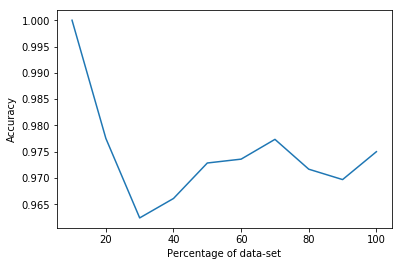

In [143]:
x_axis = [10*i for i in range(1,11)]
y_axis = Acc_ScoreForAll_DNN
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.xlabel('Percentage of data-set')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Trial and error
# valuesOfEpochs = [5,10,50,100,200,500,1000]
# valuesOfTestSize = [0.1,0.2,0.3]
valuesOfEpochs = [50]
valuesOfTestSize = [0.1,0.2,0.3]
overAllY = []
n_itr = 10
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        sizeOfEachDataset = []
        accForVariousSize = [0 for i in range (0,10)]
        lossForVariousSize = [0 for i in range(0,10)]
        for itr in range(0,n_itr):
            # Dividing the dataset into various sub-dataset
            skf = StratifiedKFold(n_splits=10,shuffle=True)
            subDatasetIndex = []
            for train_index, test_index in skf.split(dataset,label):
                subDatasetIndex.append(test_index)
                
            for i in range(1,11):
                print("------" + str(i) + "--------")
                X = []
                Y = []
                tmp_sizeOfEachDataset_sum = 0;
                for j in range (0,i):
                    tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
                    for rowIndex in subDatasetIndex[j]:
                        X.append(dataset[rowIndex])
                        Y.append(label[rowIndex])
                sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
                X = np.array(X)
                Y = np.array(Y)
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=v)
                model = keras.Sequential()
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal',input_dim=1000))
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal'))
                model.add(keras.layers.Dense(4, activation='sigmoid', kernel_initializer='random_normal'))
                model.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=e)
                loss, acc = model.evaluate(X_test,y_test)
                accForVariousSize[i-1] = accForVariousSize[i-1] + acc
                lossForVariousSize[i-1] = lossForVariousSize[i-1] + loss
        print(accForVariousSize)
            
        for i in range(0,10):
            accForVariousSize[i] = accForVariousSize[i] / n_itr
            lossForVariousSize[i] = lossForVariousSize[i] / n_itr
        overAllY.append(accForVariousSize)

------1--------
Epoch 1/50
397/397 [==============================] - 5s 13ms/sample - loss: 1.3840 - acc: 0.3526
Epoch 2/50
397/397 [==============================] - 0s 395us/sample - loss: 1.3748 - acc: 0.4232
Epoch 3/50
397/397 [==============================] - 0s 385us/sample - loss: 1.3534 - acc: 0.4761
Epoch 4/50
397/397 [==============================] - 0s 380us/sample - loss: 1.3116 - acc: 0.6725
Epoch 5/50
397/397 [==============================] - 0s 475us/sample - loss: 1.2546 - acc: 0.7179
Epoch 6/50
397/397 [==============================] - 0s 374us/sample - loss: 1.1850 - acc: 0.7280
Epoch 7/50
397/397 [==============================] - 0s 538us/sample - loss: 1.0943 - acc: 0.7229
Epoch 8/50
397/397 [==============================] - 0s 552us/sample - loss: 1.0056 - acc: 0.7179
Epoch 9/50
397/397 [==============================] - 0s 543us/sample - loss: 0.9136 - acc: 0.7204
Epoch 10/50
397/397 [==============================] - 0s 463us/sample - loss: 0.8178 - acc: 0

Epoch 32/50
795/795 [==============================] - 0s 615us/sample - loss: 0.0742 - acc: 0.9799
Epoch 33/50
795/795 [==============================] - 0s 459us/sample - loss: 0.0784 - acc: 0.9761
Epoch 34/50
795/795 [==============================] - 0s 489us/sample - loss: 0.0695 - acc: 0.9824
Epoch 35/50
795/795 [==============================] - 0s 428us/sample - loss: 0.0676 - acc: 0.9774
Epoch 36/50
795/795 [==============================] - 0s 417us/sample - loss: 0.0657 - acc: 0.9824
Epoch 37/50
795/795 [==============================] - 0s 421us/sample - loss: 0.0610 - acc: 0.9836
Epoch 38/50
795/795 [==============================] - 0s 414us/sample - loss: 0.0606 - acc: 0.9849
Epoch 39/50
795/795 [==============================] - 0s 409us/sample - loss: 0.0558 - acc: 0.9887
Epoch 40/50
795/795 [==============================] - 0s 416us/sample - loss: 0.0565 - acc: 0.9862
Epoch 41/50
795/795 [==============================] - 0s 412us/sample - loss: 0.0530 - acc: 0.9849


1590/1590 [==============================] - 1s 433us/sample - loss: 0.1720 - acc: 0.9465
Epoch 11/50
1590/1590 [==============================] - 1s 428us/sample - loss: 0.1540 - acc: 0.9553
Epoch 12/50
1590/1590 [==============================] - 1s 422us/sample - loss: 0.1401 - acc: 0.9616
Epoch 13/50
1590/1590 [==============================] - 1s 437us/sample - loss: 0.1287 - acc: 0.9692
Epoch 14/50
1590/1590 [==============================] - 1s 406us/sample - loss: 0.1178 - acc: 0.9660
Epoch 15/50
1590/1590 [==============================] - 1s 443us/sample - loss: 0.1122 - acc: 0.9704
Epoch 16/50
1590/1590 [==============================] - 1s 440us/sample - loss: 0.1033 - acc: 0.9723
Epoch 17/50
1590/1590 [==============================] - 1s 405us/sample - loss: 0.0962 - acc: 0.9748
Epoch 18/50
1590/1590 [==============================] - 1s 402us/sample - loss: 0.0902 - acc: 0.9748
Epoch 19/50
1590/1590 [==============================] - 1s 433us/sample - loss: 0.0958 - acc:

1987/1987 [==============================] - 1s 497us/sample - loss: 0.0236 - acc: 0.9945
Epoch 40/50
1987/1987 [==============================] - 1s 510us/sample - loss: 0.0249 - acc: 0.9930
Epoch 41/50
1987/1987 [==============================] - 1s 466us/sample - loss: 0.0228 - acc: 0.9940
Epoch 42/50
1987/1987 [==============================] - 1s 500us/sample - loss: 0.0214 - acc: 0.9940
Epoch 43/50
1987/1987 [==============================] - 1s 433us/sample - loss: 0.0223 - acc: 0.9930
Epoch 44/50
1987/1987 [==============================] - 1s 471us/sample - loss: 0.0207 - acc: 0.9960
Epoch 45/50
1987/1987 [==============================] - 1s 424us/sample - loss: 0.0205 - acc: 0.9945
Epoch 46/50
1987/1987 [==============================] - 1s 410us/sample - loss: 0.0180 - acc: 0.9950
Epoch 47/50
1987/1987 [==============================] - 1s 472us/sample - loss: 0.0209 - acc: 0.9950
Epoch 48/50
1987/1987 [==============================] - 1s 446us/sample - loss: 0.0187 - acc:

2775/2775 [==============================] - 1s 406us/sample - loss: 0.0741 - acc: 0.9809
Epoch 18/50
2775/2775 [==============================] - 1s 404us/sample - loss: 0.0715 - acc: 0.9791
Epoch 19/50
2775/2775 [==============================] - 1s 404us/sample - loss: 0.0684 - acc: 0.9795
Epoch 20/50
2775/2775 [==============================] - 1s 405us/sample - loss: 0.0601 - acc: 0.9816
Epoch 21/50
2775/2775 [==============================] - 1s 407us/sample - loss: 0.0585 - acc: 0.9820
Epoch 22/50
2775/2775 [==============================] - 1s 409us/sample - loss: 0.0572 - acc: 0.9845
Epoch 23/50
2775/2775 [==============================] - 1s 393us/sample - loss: 0.0558 - acc: 0.9852
Epoch 24/50
2775/2775 [==============================] - 1s 399us/sample - loss: 0.0496 - acc: 0.9849
Epoch 25/50
2775/2775 [==============================] - 1s 406us/sample - loss: 0.0457 - acc: 0.9867
Epoch 26/50
2775/2775 [==============================] - 1s 416us/sample - loss: 0.0460 - acc:

3169/3169 [==============================] - 3s 994us/sample - loss: 0.0205 - acc: 0.9943
Epoch 47/50
3169/3169 [==============================] - 3s 1ms/sample - loss: 0.0175 - acc: 0.9946
Epoch 48/50
3169/3169 [==============================] - 3s 996us/sample - loss: 0.0183 - acc: 0.9943
Epoch 49/50
3169/3169 [==============================] - 3s 1ms/sample - loss: 0.0165 - acc: 0.9956
Epoch 50/50
353/353 [==============================] - 13s 35ms/sample - loss: 0.0911 - acc: 0.9858
------9--------
Epoch 1/50
3564/3564 [==============================] - 19s 5ms/sample - loss: 1.2237 - acc: 0.5264
Epoch 2/50
3564/3564 [==============================] - 5s 1ms/sample - loss: 0.6319 - acc: 0.7890
Epoch 3/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.3205 - acc: 0.9040
Epoch 4/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.2257 - acc: 0.9357
Epoch 5/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.1840 - acc: 0.9

3958/3958 [==============================] - 4s 980us/sample - loss: 0.0354 - acc: 0.9874
Epoch 26/50
3958/3958 [==============================] - 4s 968us/sample - loss: 0.0308 - acc: 0.9894
Epoch 27/50
3958/3958 [==============================] - 4s 978us/sample - loss: 0.0300 - acc: 0.9912
Epoch 28/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0278 - acc: 0.9924
Epoch 29/50
3958/3958 [==============================] - 4s 980us/sample - loss: 0.0275 - acc: 0.9909
Epoch 30/50
3958/3958 [==============================] - 4s 976us/sample - loss: 0.0254 - acc: 0.9917
Epoch 31/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0250 - acc: 0.9924
Epoch 32/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0236 - acc: 0.9932
Epoch 33/50
3958/3958 [==============================] - 4s 985us/sample - loss: 0.0212 - acc: 0.9942
Epoch 34/50
3958/3958 [==============================] - 4s 992us/sample - loss: 0.0210 - acc: 0.995

795/795 [==============================] - 1s 1ms/sample - loss: 0.9610 - acc: 0.7220
Epoch 6/50
795/795 [==============================] - 1s 991us/sample - loss: 0.7837 - acc: 0.7673
Epoch 7/50
795/795 [==============================] - 1s 994us/sample - loss: 0.6122 - acc: 0.8013
Epoch 8/50
795/795 [==============================] - 1s 986us/sample - loss: 0.5046 - acc: 0.8126
Epoch 9/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.4238 - acc: 0.8667
Epoch 10/50
795/795 [==============================] - 1s 980us/sample - loss: 0.3540 - acc: 0.8868
Epoch 11/50
795/795 [==============================] - 1s 969us/sample - loss: 0.3148 - acc: 0.9044
Epoch 12/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.2845 - acc: 0.9145
Epoch 13/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.2556 - acc: 0.9296
Epoch 14/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.2423 - acc: 0.9195
Epoch 15/50
795/795 [=====

1193/1193 [==============================] - 2s 1ms/sample - loss: 0.0547 - acc: 0.9849
Epoch 37/50
1193/1193 [==============================] - 2s 1ms/sample - loss: 0.0497 - acc: 0.9849
Epoch 38/50
1193/1193 [==============================] - 2s 1ms/sample - loss: 0.0476 - acc: 0.9858
Epoch 39/50
1193/1193 [==============================] - 2s 1ms/sample - loss: 0.0450 - acc: 0.9866
Epoch 40/50
1193/1193 [==============================] - 2s 1ms/sample - loss: 0.0479 - acc: 0.9908
Epoch 41/50
1193/1193 [==============================] - 2s 2ms/sample - loss: 0.0426 - acc: 0.9891
Epoch 42/50
1193/1193 [==============================] - 2s 1ms/sample - loss: 0.0410 - acc: 0.9883
Epoch 43/50
1193/1193 [==============================] - 2s 1ms/sample - loss: 0.0410 - acc: 0.9899
Epoch 44/50
1193/1193 [==============================] - 2s 1ms/sample - loss: 0.0385 - acc: 0.9925
Epoch 45/50
1193/1193 [==============================] - 2s 1ms/sample - loss: 0.0387 - acc: 0.9908
Epoch 46/50


1987/1987 [==============================] - 4s 2ms/sample - loss: 0.0977 - acc: 0.9743
Epoch 16/50
1987/1987 [==============================] - 4s 2ms/sample - loss: 0.0917 - acc: 0.9774 1s -
Epoch 17/50
1987/1987 [==============================] - 3s 1ms/sample - loss: 0.0923 - acc: 0.9784
Epoch 18/50
1987/1987 [==============================] - 2s 1ms/sample - loss: 0.0837 - acc: 0.9753
Epoch 19/50
1987/1987 [==============================] - 3s 1ms/sample - loss: 0.0776 - acc: 0.9804
Epoch 20/50
1987/1987 [==============================] - 3s 2ms/sample - loss: 0.0741 - acc: 0.9799
Epoch 21/50
1987/1987 [==============================] - 3s 2ms/sample - loss: 0.0759 - acc: 0.9789
Epoch 22/50
1987/1987 [==============================] - 3s 2ms/sample - loss: 0.0703 - acc: 0.9804
Epoch 23/50
1987/1987 [==============================] - 4s 2ms/sample - loss: 0.0640 - acc: 0.9824
Epoch 24/50
1987/1987 [==============================] - 2s 1ms/sample - loss: 0.0607 - acc: 0.9834
Epoch 2

2381/2381 [==============================] - 1s 428us/sample - loss: 0.0172 - acc: 0.9971
Epoch 46/50
2381/2381 [==============================] - 1s 426us/sample - loss: 0.0175 - acc: 0.9966
Epoch 47/50
2381/2381 [==============================] - 1s 431us/sample - loss: 0.0162 - acc: 0.9971
Epoch 48/50
2381/2381 [==============================] - 1s 422us/sample - loss: 0.0153 - acc: 0.9971
Epoch 49/50
2381/2381 [==============================] - 1s 424us/sample - loss: 0.0159 - acc: 0.9975
Epoch 50/50
265/265 [==============================] - 5s 17ms/sample - loss: 0.1794 - acc: 0.9698
------7--------
Epoch 1/50
2775/2775 [==============================] - 7s 3ms/sample - loss: 1.2939 - acc: 0.4876
Epoch 2/50
2775/2775 [==============================] - 2s 621us/sample - loss: 0.8229 - acc: 0.7542
Epoch 3/50
2775/2775 [==============================] - 2s 549us/sample - loss: 0.4395 - acc: 0.8490
Epoch 4/50
2775/2775 [==============================] - 1s 440us/sample - loss: 0.2890

3169/3169 [==============================] - 1s 430us/sample - loss: 0.0467 - acc: 0.9877
Epoch 24/50
3169/3169 [==============================] - 1s 418us/sample - loss: 0.0420 - acc: 0.9874
Epoch 25/50
3169/3169 [==============================] - 1s 427us/sample - loss: 0.0421 - acc: 0.9880
Epoch 26/50
3169/3169 [==============================] - 1s 418us/sample - loss: 0.0542 - acc: 0.9820
Epoch 27/50
3169/3169 [==============================] - 1s 418us/sample - loss: 0.0374 - acc: 0.9893
Epoch 28/50
3169/3169 [==============================] - 1s 419us/sample - loss: 0.0357 - acc: 0.9896
Epoch 29/50
3169/3169 [==============================] - 1s 425us/sample - loss: 0.0351 - acc: 0.9880
Epoch 30/50
3169/3169 [==============================] - 1s 418us/sample - loss: 0.0334 - acc: 0.9912
Epoch 31/50
3169/3169 [==============================] - 1s 419us/sample - loss: 0.0316 - acc: 0.9918
Epoch 32/50
3169/3169 [==============================] - 1s 420us/sample - loss: 0.0308 - acc:

3958/3958 [==============================] - 6s 2ms/sample - loss: 1.1840 - acc: 0.5609
Epoch 2/50
3958/3958 [==============================] - 2s 411us/sample - loss: 0.5189 - acc: 0.8287
Epoch 3/50
3958/3958 [==============================] - 2s 411us/sample - loss: 0.2720 - acc: 0.9146
Epoch 4/50
3958/3958 [==============================] - 2s 413us/sample - loss: 0.1974 - acc: 0.9434
Epoch 5/50
3958/3958 [==============================] - 2s 412us/sample - loss: 0.1607 - acc: 0.9578
Epoch 6/50
3958/3958 [==============================] - 2s 442us/sample - loss: 0.1411 - acc: 0.9644
Epoch 7/50
3958/3958 [==============================] - 2s 491us/sample - loss: 0.1254 - acc: 0.9689
Epoch 8/50
3958/3958 [==============================] - 2s 431us/sample - loss: 0.1100 - acc: 0.9704
Epoch 9/50
3958/3958 [==============================] - 2s 430us/sample - loss: 0.1002 - acc: 0.9735
Epoch 10/50
3958/3958 [==============================] - 2s 529us/sample - loss: 0.0931 - acc: 0.9742
Ep

397/397 [==============================] - 0s 477us/sample - loss: 0.1728 - acc: 0.9521
Epoch 32/50
397/397 [==============================] - 0s 527us/sample - loss: 0.1652 - acc: 0.9673
Epoch 33/50
397/397 [==============================] - 0s 473us/sample - loss: 0.1534 - acc: 0.9597
Epoch 34/50
397/397 [==============================] - 0s 460us/sample - loss: 0.1505 - acc: 0.9647
Epoch 35/50
397/397 [==============================] - 0s 460us/sample - loss: 0.1406 - acc: 0.9723
Epoch 36/50
397/397 [==============================] - 0s 440us/sample - loss: 0.1347 - acc: 0.9748
Epoch 37/50
397/397 [==============================] - 0s 570us/sample - loss: 0.1299 - acc: 0.9748
Epoch 38/50
397/397 [==============================] - 0s 501us/sample - loss: 0.1240 - acc: 0.9698
Epoch 39/50
397/397 [==============================] - 0s 547us/sample - loss: 0.1265 - acc: 0.9748
Epoch 40/50
397/397 [==============================] - 0s 451us/sample - loss: 0.1117 - acc: 0.9798
Epoch 41/50


1193/1193 [==============================] - 1s 437us/sample - loss: 0.2101 - acc: 0.9413
Epoch 12/50
1193/1193 [==============================] - 1s 426us/sample - loss: 0.1881 - acc: 0.9589
Epoch 13/50
1193/1193 [==============================] - 1s 421us/sample - loss: 0.1726 - acc: 0.9598
Epoch 14/50
1193/1193 [==============================] - 1s 433us/sample - loss: 0.1668 - acc: 0.9514
Epoch 15/50
1193/1193 [==============================] - 1s 425us/sample - loss: 0.1483 - acc: 0.9598
Epoch 16/50
1193/1193 [==============================] - 1s 422us/sample - loss: 0.1373 - acc: 0.9698
Epoch 17/50
1193/1193 [==============================] - 1s 427us/sample - loss: 0.1269 - acc: 0.9723
Epoch 18/50
1193/1193 [==============================] - 1s 432us/sample - loss: 0.1192 - acc: 0.9698
Epoch 19/50
1193/1193 [==============================] - 1s 477us/sample - loss: 0.1151 - acc: 0.9723
Epoch 20/50
1193/1193 [==============================] - 1s 431us/sample - loss: 0.1094 - acc:

1590/1590 [==============================] - 1s 437us/sample - loss: 0.0405 - acc: 0.9899
Epoch 41/50
1590/1590 [==============================] - 1s 432us/sample - loss: 0.0329 - acc: 0.9918
Epoch 42/50
1590/1590 [==============================] - 1s 440us/sample - loss: 0.0321 - acc: 0.9912
Epoch 43/50
1590/1590 [==============================] - 1s 434us/sample - loss: 0.0311 - acc: 0.9925
Epoch 44/50
1590/1590 [==============================] - 1s 444us/sample - loss: 0.0331 - acc: 0.9893
Epoch 45/50
1590/1590 [==============================] - 1s 440us/sample - loss: 0.0325 - acc: 0.9918
Epoch 46/50
1590/1590 [==============================] - 1s 436us/sample - loss: 0.0303 - acc: 0.9918
Epoch 47/50
1590/1590 [==============================] - 1s 430us/sample - loss: 0.0327 - acc: 0.9925
Epoch 48/50
1590/1590 [==============================] - 1s 494us/sample - loss: 0.0373 - acc: 0.9906
Epoch 49/50
1590/1590 [==============================] - 1s 442us/sample - loss: 0.0281 - acc:

2381/2381 [==============================] - 1s 553us/sample - loss: 0.0710 - acc: 0.9765
Epoch 19/50
2381/2381 [==============================] - 1s 589us/sample - loss: 0.0666 - acc: 0.9807
Epoch 20/50
2381/2381 [==============================] - 1s 609us/sample - loss: 0.0623 - acc: 0.9815
Epoch 21/50
2381/2381 [==============================] - 1s 513us/sample - loss: 0.0588 - acc: 0.9832
Epoch 22/50
2381/2381 [==============================] - 1s 577us/sample - loss: 0.0566 - acc: 0.9853
Epoch 23/50
2381/2381 [==============================] - 1s 613us/sample - loss: 0.0535 - acc: 0.9845
Epoch 24/50
2381/2381 [==============================] - 1s 462us/sample - loss: 0.0544 - acc: 0.9832
Epoch 25/50
2381/2381 [==============================] - 1s 452us/sample - loss: 0.0477 - acc: 0.9866
Epoch 26/50
2381/2381 [==============================] - 1s 427us/sample - loss: 0.0468 - acc: 0.9857
Epoch 27/50
2381/2381 [==============================] - 1s 432us/sample - loss: 0.0448 - acc:

2775/2775 [==============================] - 1s 423us/sample - loss: 0.0190 - acc: 0.9950
Epoch 48/50
2775/2775 [==============================] - 1s 421us/sample - loss: 0.0186 - acc: 0.9939
Epoch 49/50
2775/2775 [==============================] - 1s 422us/sample - loss: 0.0172 - acc: 0.9953
Epoch 50/50
309/309 [==============================] - 5s 17ms/sample - loss: 0.1736 - acc: 0.9579
------8--------
Epoch 1/50
3169/3169 [==============================] - 7s 2ms/sample - loss: 1.2568 - acc: 0.5219
Epoch 2/50
3169/3169 [==============================] - 1s 430us/sample - loss: 0.7299 - acc: 0.7703
Epoch 3/50
3169/3169 [==============================] - 1s 429us/sample - loss: 0.3573 - acc: 0.8861
Epoch 4/50
3169/3169 [==============================] - 1s 430us/sample - loss: 0.2541 - acc: 0.9277
Epoch 5/50
3169/3169 [==============================] - 1s 432us/sample - loss: 0.1994 - acc: 0.9435
Epoch 6/50
3169/3169 [==============================] - 1s 428us/sample - loss: 0.1656 -

3564/3564 [==============================] - 2s 433us/sample - loss: 0.0412 - acc: 0.9888
Epoch 26/50
3564/3564 [==============================] - 2s 430us/sample - loss: 0.0385 - acc: 0.9896
Epoch 27/50
3564/3564 [==============================] - 2s 433us/sample - loss: 0.0350 - acc: 0.9899
Epoch 28/50
3564/3564 [==============================] - 2s 430us/sample - loss: 0.0346 - acc: 0.9907
Epoch 29/50
3564/3564 [==============================] - 2s 433us/sample - loss: 0.0331 - acc: 0.9896
Epoch 30/50
3564/3564 [==============================] - 2s 431us/sample - loss: 0.0288 - acc: 0.9919
Epoch 31/50
3564/3564 [==============================] - 2s 435us/sample - loss: 0.0311 - acc: 0.9916
Epoch 32/50
3564/3564 [==============================] - 2s 432us/sample - loss: 0.0287 - acc: 0.9905
Epoch 33/50
3564/3564 [==============================] - 2s 436us/sample - loss: 0.0269 - acc: 0.9927
Epoch 34/50
3564/3564 [==============================] - 2s 435us/sample - loss: 0.0266 - acc:

397/397 [==============================] - 0s 504us/sample - loss: 1.3465 - acc: 0.4736
Epoch 4/50
397/397 [==============================] - 0s 445us/sample - loss: 1.3145 - acc: 0.4307
Epoch 5/50
397/397 [==============================] - 0s 432us/sample - loss: 1.2793 - acc: 0.3627
Epoch 6/50
397/397 [==============================] - 0s 440us/sample - loss: 1.2323 - acc: 0.5919
Epoch 7/50
397/397 [==============================] - 0s 437us/sample - loss: 1.1625 - acc: 0.6196
Epoch 8/50
397/397 [==============================] - 0s 468us/sample - loss: 1.0766 - acc: 0.5340
Epoch 9/50
397/397 [==============================] - 0s 676us/sample - loss: 0.9826 - acc: 0.6247
Epoch 10/50
397/397 [==============================] - 0s 449us/sample - loss: 0.8911 - acc: 0.6373
Epoch 11/50
397/397 [==============================] - 0s 457us/sample - loss: 0.8029 - acc: 0.7683
Epoch 12/50
397/397 [==============================] - 0s 493us/sample - loss: 0.7272 - acc: 0.7758
Epoch 13/50
397/39

795/795 [==============================] - 0s 499us/sample - loss: 0.0629 - acc: 0.9824
Epoch 35/50
795/795 [==============================] - 0s 530us/sample - loss: 0.0665 - acc: 0.9849
Epoch 36/50
795/795 [==============================] - 0s 538us/sample - loss: 0.0559 - acc: 0.9874
Epoch 37/50
795/795 [==============================] - 0s 480us/sample - loss: 0.0529 - acc: 0.9862
Epoch 38/50
795/795 [==============================] - 0s 469us/sample - loss: 0.0487 - acc: 0.9874
Epoch 39/50
795/795 [==============================] - 0s 553us/sample - loss: 0.0474 - acc: 0.9874
Epoch 40/50
795/795 [==============================] - 0s 521us/sample - loss: 0.0484 - acc: 0.9874
Epoch 41/50
795/795 [==============================] - 0s 478us/sample - loss: 0.0439 - acc: 0.9899
Epoch 42/50
795/795 [==============================] - 0s 553us/sample - loss: 0.0406 - acc: 0.9874
Epoch 43/50
795/795 [==============================] - 0s 535us/sample - loss: 0.0388 - acc: 0.9912
Epoch 44/50


Epoch 13/50
1590/1590 [==============================] - 1s 679us/sample - loss: 0.1308 - acc: 0.9660
Epoch 14/50
1590/1590 [==============================] - 1s 476us/sample - loss: 0.1209 - acc: 0.9673
Epoch 15/50
1590/1590 [==============================] - 1s 534us/sample - loss: 0.1103 - acc: 0.9692
Epoch 16/50
1590/1590 [==============================] - 1s 472us/sample - loss: 0.1088 - acc: 0.9679
Epoch 17/50
1590/1590 [==============================] - 1s 520us/sample - loss: 0.1007 - acc: 0.9792
Epoch 18/50
1590/1590 [==============================] - 1s 474us/sample - loss: 0.0939 - acc: 0.9736
Epoch 19/50
1590/1590 [==============================] - 1s 523us/sample - loss: 0.0883 - acc: 0.9755
Epoch 20/50
1590/1590 [==============================] - 1s 481us/sample - loss: 0.0840 - acc: 0.9761
Epoch 21/50
1590/1590 [==============================] - 1s 535us/sample - loss: 0.0769 - acc: 0.9799
Epoch 22/50
1590/1590 [==============================] - 1s 470us/sample - loss: 0

1987/1987 [==============================] - 1s 441us/sample - loss: 0.0300 - acc: 0.9904
Epoch 43/50
1987/1987 [==============================] - 1s 442us/sample - loss: 0.0295 - acc: 0.9904
Epoch 44/50
1987/1987 [==============================] - 1s 430us/sample - loss: 0.0299 - acc: 0.9904
Epoch 45/50
1987/1987 [==============================] - 1s 439us/sample - loss: 0.0276 - acc: 0.9909
Epoch 46/50
1987/1987 [==============================] - 1s 492us/sample - loss: 0.0265 - acc: 0.9919
Epoch 47/50
1987/1987 [==============================] - 1s 585us/sample - loss: 0.0260 - acc: 0.9925
Epoch 48/50
1987/1987 [==============================] - 1s 492us/sample - loss: 0.0256 - acc: 0.9925
Epoch 49/50
1987/1987 [==============================] - 1s 567us/sample - loss: 0.0290 - acc: 0.9889
Epoch 50/50
221/221 [==============================] - 6s 28ms/sample - loss: 0.0793 - acc: 0.9774
------6--------
Epoch 1/50
2381/2381 [==============================] - 6s 3ms/sample - loss: 1.3

2775/2775 [==============================] - 1s 461us/sample - loss: 0.0600 - acc: 0.9823
Epoch 21/50
2775/2775 [==============================] - 2s 567us/sample - loss: 0.0568 - acc: 0.9823
Epoch 22/50
2775/2775 [==============================] - 2s 613us/sample - loss: 0.0523 - acc: 0.9834
Epoch 23/50
2775/2775 [==============================] - 1s 472us/sample - loss: 0.0520 - acc: 0.9831
Epoch 24/50
2775/2775 [==============================] - 2s 574us/sample - loss: 0.0510 - acc: 0.9813
Epoch 25/50
2775/2775 [==============================] - 1s 471us/sample - loss: 0.0460 - acc: 0.9845
Epoch 26/50
2775/2775 [==============================] - 2s 582us/sample - loss: 0.0427 - acc: 0.9867
Epoch 27/50
2775/2775 [==============================] - 1s 533us/sample - loss: 0.0404 - acc: 0.9881
Epoch 28/50
2775/2775 [==============================] - 1s 490us/sample - loss: 0.0415 - acc: 0.9874
Epoch 29/50
2775/2775 [==============================] - 3s 932us/sample - loss: 0.0396 - acc:

3169/3169 [==============================] - 1s 409us/sample - loss: 0.0151 - acc: 0.9956
Epoch 50/50
353/353 [==============================] - 6s 17ms/sample - loss: 0.1597 - acc: 0.9632
------9--------
Epoch 1/50
3564/3564 [==============================] - 7s 2ms/sample - loss: 1.2155 - acc: 0.4964
Epoch 2/50
3564/3564 [==============================] - 1s 416us/sample - loss: 0.5811 - acc: 0.8143
Epoch 3/50
3564/3564 [==============================] - 1s 420us/sample - loss: 0.3107 - acc: 0.9029
Epoch 4/50
3564/3564 [==============================] - 2s 434us/sample - loss: 0.2208 - acc: 0.9386
Epoch 5/50
3564/3564 [==============================] - 2s 444us/sample - loss: 0.1720 - acc: 0.9551
Epoch 6/50
3564/3564 [==============================] - 1s 418us/sample - loss: 0.1442 - acc: 0.9652
Epoch 7/50
3564/3564 [==============================] - 2s 438us/sample - loss: 0.1251 - acc: 0.9689
Epoch 8/50
3564/3564 [==============================] - 2s 434us/sample - loss: 0.1117 - a

3958/3958 [==============================] - 2s 464us/sample - loss: 0.0326 - acc: 0.9891
Epoch 28/50
3958/3958 [==============================] - 2s 584us/sample - loss: 0.0298 - acc: 0.9914
Epoch 29/50
3958/3958 [==============================] - 2s 540us/sample - loss: 0.0270 - acc: 0.9922
Epoch 30/50
3958/3958 [==============================] - 2s 471us/sample - loss: 0.0281 - acc: 0.9904
Epoch 31/50
3958/3958 [==============================] - 2s 469us/sample - loss: 0.0252 - acc: 0.9919
Epoch 32/50
3958/3958 [==============================] - 2s 431us/sample - loss: 0.0246 - acc: 0.9937
Epoch 33/50
3958/3958 [==============================] - 2s 434us/sample - loss: 0.0226 - acc: 0.9942
Epoch 34/50
3958/3958 [==============================] - 2s 434us/sample - loss: 0.0223 - acc: 0.9932
Epoch 35/50
3958/3958 [==============================] - 2s 442us/sample - loss: 0.0216 - acc: 0.9942
Epoch 36/50
3958/3958 [==============================] - 2s 436us/sample - loss: 0.0192 - acc:

795/795 [==============================] - 0s 419us/sample - loss: 0.7997 - acc: 0.7560
Epoch 7/50
795/795 [==============================] - 0s 427us/sample - loss: 0.6283 - acc: 0.7849
Epoch 8/50
795/795 [==============================] - 0s 426us/sample - loss: 0.4878 - acc: 0.8214
Epoch 9/50
795/795 [==============================] - 0s 420us/sample - loss: 0.3987 - acc: 0.8730
Epoch 10/50
795/795 [==============================] - 0s 422us/sample - loss: 0.3492 - acc: 0.8981
Epoch 11/50
795/795 [==============================] - 0s 415us/sample - loss: 0.3002 - acc: 0.9082
Epoch 12/50
795/795 [==============================] - 0s 430us/sample - loss: 0.2713 - acc: 0.9107
Epoch 13/50
795/795 [==============================] - 0s 432us/sample - loss: 0.2503 - acc: 0.9220
Epoch 14/50
795/795 [==============================] - 0s 433us/sample - loss: 0.2305 - acc: 0.9233
Epoch 15/50
795/795 [==============================] - 0s 423us/sample - loss: 0.2065 - acc: 0.9421
Epoch 16/50
795

1193/1193 [==============================] - 1s 477us/sample - loss: 0.0491 - acc: 0.9866
Epoch 37/50
1193/1193 [==============================] - 1s 447us/sample - loss: 0.0478 - acc: 0.9849
Epoch 38/50
1193/1193 [==============================] - 1s 445us/sample - loss: 0.0461 - acc: 0.9858
Epoch 39/50
1193/1193 [==============================] - 1s 442us/sample - loss: 0.0408 - acc: 0.9883
Epoch 40/50
1193/1193 [==============================] - 1s 439us/sample - loss: 0.0422 - acc: 0.9874
Epoch 41/50
1193/1193 [==============================] - 1s 502us/sample - loss: 0.0381 - acc: 0.9908
Epoch 42/50
1193/1193 [==============================] - 1s 477us/sample - loss: 0.0389 - acc: 0.9891
Epoch 43/50
1193/1193 [==============================] - 1s 467us/sample - loss: 0.0373 - acc: 0.9908
Epoch 44/50
1193/1193 [==============================] - 1s 487us/sample - loss: 0.0360 - acc: 0.9899
Epoch 45/50
1193/1193 [==============================] - 1s 499us/sample - loss: 0.0320 - acc:

1987/1987 [==============================] - 1s 454us/sample - loss: 0.1142 - acc: 0.9713
Epoch 15/50
1987/1987 [==============================] - 1s 498us/sample - loss: 0.1065 - acc: 0.9683
Epoch 16/50
1987/1987 [==============================] - 1s 596us/sample - loss: 0.0971 - acc: 0.9723
Epoch 17/50
1987/1987 [==============================] - 1s 515us/sample - loss: 0.0949 - acc: 0.9713
Epoch 18/50
1987/1987 [==============================] - 1s 594us/sample - loss: 0.0874 - acc: 0.9763
Epoch 19/50
1987/1987 [==============================] - 1s 604us/sample - loss: 0.0833 - acc: 0.9748
Epoch 20/50
1987/1987 [==============================] - 1s 435us/sample - loss: 0.0770 - acc: 0.9794
Epoch 21/50
1987/1987 [==============================] - 1s 441us/sample - loss: 0.0725 - acc: 0.9763
Epoch 22/50
1987/1987 [==============================] - 1s 444us/sample - loss: 0.0741 - acc: 0.9763
Epoch 23/50
1987/1987 [==============================] - 1s 438us/sample - loss: 0.0661 - acc:

2381/2381 [==============================] - 1s 473us/sample - loss: 0.0277 - acc: 0.9895
Epoch 44/50
2381/2381 [==============================] - 1s 455us/sample - loss: 0.0259 - acc: 0.9933
Epoch 45/50
2381/2381 [==============================] - 1s 448us/sample - loss: 0.0234 - acc: 0.9937
Epoch 46/50
2381/2381 [==============================] - 1s 460us/sample - loss: 0.0237 - acc: 0.9924
Epoch 47/50
2381/2381 [==============================] - 1s 445us/sample - loss: 0.0242 - acc: 0.9929
Epoch 48/50
2381/2381 [==============================] - 1s 452us/sample - loss: 0.0216 - acc: 0.9924
Epoch 49/50
2381/2381 [==============================] - 1s 506us/sample - loss: 0.0206 - acc: 0.9924
Epoch 50/50
265/265 [==============================] - 5s 20ms/sample - loss: 0.1271 - acc: 0.9774
------7--------
Epoch 1/50
2775/2775 [==============================] - 7s 3ms/sample - loss: 1.2842 - acc: 0.4969
Epoch 2/50
2775/2775 [==============================] - 1s 431us/sample - loss: 0.79

3169/3169 [==============================] - 1s 451us/sample - loss: 0.0521 - acc: 0.9849
Epoch 22/50
3169/3169 [==============================] - 1s 447us/sample - loss: 0.0472 - acc: 0.9867
Epoch 23/50
3169/3169 [==============================] - 1s 450us/sample - loss: 0.0442 - acc: 0.9867
Epoch 24/50
3169/3169 [==============================] - 1s 450us/sample - loss: 0.0431 - acc: 0.9871
Epoch 25/50
3169/3169 [==============================] - 1s 447us/sample - loss: 0.0413 - acc: 0.9883
Epoch 26/50
3169/3169 [==============================] - 1s 445us/sample - loss: 0.0375 - acc: 0.9896
Epoch 27/50
3169/3169 [==============================] - 1s 454us/sample - loss: 0.0363 - acc: 0.9902
Epoch 28/50
3169/3169 [==============================] - 1s 450us/sample - loss: 0.0317 - acc: 0.9908
Epoch 29/50
3169/3169 [==============================] - 1s 450us/sample - loss: 0.0312 - acc: 0.9896
Epoch 30/50
3169/3169 [==============================] - 1s 451us/sample - loss: 0.0289 - acc:

396/396 [==============================] - 6s 14ms/sample - loss: 0.1234 - acc: 0.9672
------10--------
Epoch 1/50
3958/3958 [==============================] - 8s 2ms/sample - loss: 1.2025 - acc: 0.5407
Epoch 2/50
3958/3958 [==============================] - 2s 456us/sample - loss: 0.5602 - acc: 0.8252
Epoch 3/50
3958/3958 [==============================] - 2s 458us/sample - loss: 0.2845 - acc: 0.9146
Epoch 4/50
3958/3958 [==============================] - 2s 460us/sample - loss: 0.2060 - acc: 0.9411
Epoch 5/50
3958/3958 [==============================] - 2s 456us/sample - loss: 0.1675 - acc: 0.9538
Epoch 6/50
3958/3958 [==============================] - 2s 488us/sample - loss: 0.1465 - acc: 0.9581
Epoch 7/50
3958/3958 [==============================] - 2s 477us/sample - loss: 0.1266 - acc: 0.9674
Epoch 8/50
3958/3958 [==============================] - 2s 503us/sample - loss: 0.1156 - acc: 0.9694
Epoch 9/50
3958/3958 [==============================] - 2s 482us/sample - loss: 0.1048 - a

397/397 [==============================] - 0s 473us/sample - loss: 0.1683 - acc: 0.9647
Epoch 30/50
397/397 [==============================] - 0s 470us/sample - loss: 0.1596 - acc: 0.9521
Epoch 31/50
397/397 [==============================] - 0s 480us/sample - loss: 0.1546 - acc: 0.9673
Epoch 32/50
397/397 [==============================] - 0s 479us/sample - loss: 0.1459 - acc: 0.9647
Epoch 33/50
397/397 [==============================] - 0s 473us/sample - loss: 0.1415 - acc: 0.9647
Epoch 34/50
397/397 [==============================] - 0s 462us/sample - loss: 0.1330 - acc: 0.9647
Epoch 35/50
397/397 [==============================] - 0s 489us/sample - loss: 0.1265 - acc: 0.9673
Epoch 36/50
397/397 [==============================] - 0s 488us/sample - loss: 0.1207 - acc: 0.9698
Epoch 37/50
397/397 [==============================] - 0s 472us/sample - loss: 0.1175 - acc: 0.9773
Epoch 38/50
397/397 [==============================] - 0s 481us/sample - loss: 0.1148 - acc: 0.9698
Epoch 39/50


1193/1193 [==============================] - 1s 464us/sample - loss: 0.2742 - acc: 0.9170
Epoch 10/50
1193/1193 [==============================] - 1s 460us/sample - loss: 0.2534 - acc: 0.9279
Epoch 11/50
1193/1193 [==============================] - 1s 464us/sample - loss: 0.2312 - acc: 0.9355
Epoch 12/50
1193/1193 [==============================] - 1s 457us/sample - loss: 0.2109 - acc: 0.9455
Epoch 13/50
1193/1193 [==============================] - 1s 463us/sample - loss: 0.1983 - acc: 0.9447
Epoch 14/50
1193/1193 [==============================] - 1s 460us/sample - loss: 0.1831 - acc: 0.9547
Epoch 15/50
1193/1193 [==============================] - 1s 460us/sample - loss: 0.1720 - acc: 0.9522
Epoch 16/50
1193/1193 [==============================] - 1s 532us/sample - loss: 0.1570 - acc: 0.9514
Epoch 17/50
1193/1193 [==============================] - 1s 468us/sample - loss: 0.1462 - acc: 0.9564
Epoch 18/50
1193/1193 [==============================] - 1s 467us/sample - loss: 0.1421 - acc:

1590/1590 [==============================] - 1s 451us/sample - loss: 0.0411 - acc: 0.9843
Epoch 39/50
1590/1590 [==============================] - 1s 449us/sample - loss: 0.0372 - acc: 0.9893
Epoch 40/50
1590/1590 [==============================] - 1s 455us/sample - loss: 0.0363 - acc: 0.9893
Epoch 41/50
1590/1590 [==============================] - 1s 490us/sample - loss: 0.0384 - acc: 0.9881
Epoch 42/50
1590/1590 [==============================] - 1s 450us/sample - loss: 0.0335 - acc: 0.9906
Epoch 43/50
1590/1590 [==============================] - 1s 455us/sample - loss: 0.0325 - acc: 0.9893
Epoch 44/50
1590/1590 [==============================] - 1s 460us/sample - loss: 0.0312 - acc: 0.9931
Epoch 45/50
1590/1590 [==============================] - 1s 457us/sample - loss: 0.0338 - acc: 0.9899
Epoch 46/50
1590/1590 [==============================] - 1s 450us/sample - loss: 0.0305 - acc: 0.9893
Epoch 47/50
1590/1590 [==============================] - 1s 450us/sample - loss: 0.0249 - acc:

2381/2381 [==============================] - 1s 568us/sample - loss: 0.0776 - acc: 0.9790
Epoch 17/50
2381/2381 [==============================] - 1s 571us/sample - loss: 0.0698 - acc: 0.9803
Epoch 18/50
2381/2381 [==============================] - 1s 565us/sample - loss: 0.0652 - acc: 0.9807
Epoch 19/50
2381/2381 [==============================] - 1s 564us/sample - loss: 0.0634 - acc: 0.9803
Epoch 20/50
2381/2381 [==============================] - 1s 582us/sample - loss: 0.0595 - acc: 0.9832
Epoch 21/50
2381/2381 [==============================] - 1s 533us/sample - loss: 0.0585 - acc: 0.9807
Epoch 22/50
2381/2381 [==============================] - 1s 519us/sample - loss: 0.0525 - acc: 0.9832
Epoch 23/50
2381/2381 [==============================] - 1s 495us/sample - loss: 0.0511 - acc: 0.9849
Epoch 24/50
2381/2381 [==============================] - 1s 519us/sample - loss: 0.0473 - acc: 0.9882
Epoch 25/50
2381/2381 [==============================] - 1s 515us/sample - loss: 0.0449 - acc:

2775/2775 [==============================] - 1s 442us/sample - loss: 0.0205 - acc: 0.9950
Epoch 46/50
2775/2775 [==============================] - 1s 442us/sample - loss: 0.0228 - acc: 0.9942
Epoch 47/50
2775/2775 [==============================] - 1s 443us/sample - loss: 0.0201 - acc: 0.9939
Epoch 48/50
2775/2775 [==============================] - 1s 442us/sample - loss: 0.0182 - acc: 0.9957
Epoch 49/50
2775/2775 [==============================] - 1s 444us/sample - loss: 0.0181 - acc: 0.9964
Epoch 50/50
309/309 [==============================] - 6s 19ms/sample - loss: 0.2399 - acc: 0.9579
------8--------
Epoch 1/50
3169/3169 [==============================] - 7s 2ms/sample - loss: 1.2622 - acc: 0.4762
Epoch 2/50
3169/3169 [==============================] - 1s 448us/sample - loss: 0.6606 - acc: 0.8012
Epoch 3/50
3169/3169 [==============================] - 1s 448us/sample - loss: 0.3449 - acc: 0.8810
Epoch 4/50
3169/3169 [==============================] - 1s 449us/sample - loss: 0.2508

3564/3564 [==============================] - 2s 453us/sample - loss: 0.0423 - acc: 0.9843
Epoch 24/50
3564/3564 [==============================] - 2s 452us/sample - loss: 0.0383 - acc: 0.9868
Epoch 25/50
3564/3564 [==============================] - 2s 449us/sample - loss: 0.0354 - acc: 0.9879
Epoch 26/50
3564/3564 [==============================] - 2s 454us/sample - loss: 0.0372 - acc: 0.9877
Epoch 27/50
3564/3564 [==============================] - 2s 450us/sample - loss: 0.0320 - acc: 0.9885
Epoch 28/50
3564/3564 [==============================] - 2s 462us/sample - loss: 0.0320 - acc: 0.9879
Epoch 29/50
3564/3564 [==============================] - 2s 451us/sample - loss: 0.0306 - acc: 0.9899
Epoch 30/50
3564/3564 [==============================] - 2s 453us/sample - loss: 0.0276 - acc: 0.9905
Epoch 31/50
3564/3564 [==============================] - 2s 453us/sample - loss: 0.0271 - acc: 0.9905
Epoch 32/50
3564/3564 [==============================] - 2s 451us/sample - loss: 0.0288 - acc:

397/397 [==============================] - 6s 14ms/sample - loss: 1.3833 - acc: 0.3098
Epoch 2/50
397/397 [==============================] - 0s 479us/sample - loss: 1.3723 - acc: 0.4408
Epoch 3/50
397/397 [==============================] - 0s 492us/sample - loss: 1.3509 - acc: 0.4887
Epoch 4/50
397/397 [==============================] - 0s 519us/sample - loss: 1.3163 - acc: 0.4736
Epoch 5/50
397/397 [==============================] - 0s 492us/sample - loss: 1.2757 - acc: 0.4836
Epoch 6/50
397/397 [==============================] - 0s 489us/sample - loss: 1.2311 - acc: 0.6398
Epoch 7/50
397/397 [==============================] - 0s 480us/sample - loss: 1.1723 - acc: 0.7103
Epoch 8/50
397/397 [==============================] - 0s 469us/sample - loss: 1.0984 - acc: 0.7406
Epoch 9/50
397/397 [==============================] - 0s 489us/sample - loss: 1.0167 - acc: 0.7607
Epoch 10/50
397/397 [==============================] - 0s 474us/sample - loss: 0.9366 - acc: 0.7632
Epoch 11/50
397/397 [

795/795 [==============================] - 0s 466us/sample - loss: 0.0635 - acc: 0.9887
Epoch 33/50
795/795 [==============================] - 0s 457us/sample - loss: 0.0616 - acc: 0.9899
Epoch 34/50
795/795 [==============================] - 0s 457us/sample - loss: 0.0575 - acc: 0.9899
Epoch 35/50
795/795 [==============================] - 0s 449us/sample - loss: 0.0554 - acc: 0.9887
Epoch 36/50
795/795 [==============================] - 0s 453us/sample - loss: 0.0497 - acc: 0.9937
Epoch 37/50
795/795 [==============================] - 0s 453us/sample - loss: 0.0468 - acc: 0.9899
Epoch 38/50
795/795 [==============================] - 0s 454us/sample - loss: 0.0455 - acc: 0.9925
Epoch 39/50
795/795 [==============================] - 0s 455us/sample - loss: 0.0438 - acc: 0.9899
Epoch 40/50
795/795 [==============================] - 0s 451us/sample - loss: 0.0397 - acc: 0.9912
Epoch 41/50
795/795 [==============================] - 0s 461us/sample - loss: 0.0386 - acc: 0.9937
Epoch 42/50


1590/1590 [==============================] - 1s 456us/sample - loss: 0.1603 - acc: 0.9642
Epoch 12/50
1590/1590 [==============================] - 1s 453us/sample - loss: 0.1494 - acc: 0.9629
Epoch 13/50
1590/1590 [==============================] - 1s 451us/sample - loss: 0.1364 - acc: 0.9660
Epoch 14/50
1590/1590 [==============================] - 1s 451us/sample - loss: 0.1284 - acc: 0.9642
Epoch 15/50
1590/1590 [==============================] - 1s 453us/sample - loss: 0.1184 - acc: 0.9698
Epoch 16/50
1590/1590 [==============================] - 1s 451us/sample - loss: 0.1123 - acc: 0.9723
Epoch 17/50
1590/1590 [==============================] - 1s 465us/sample - loss: 0.1052 - acc: 0.9748
Epoch 18/50
1590/1590 [==============================] - 1s 463us/sample - loss: 0.0972 - acc: 0.9755
Epoch 19/50
1590/1590 [==============================] - 1s 456us/sample - loss: 0.0948 - acc: 0.9761
Epoch 20/50
1590/1590 [==============================] - 1s 454us/sample - loss: 0.0883 - acc:

1987/1987 [==============================] - 1s 460us/sample - loss: 0.0336 - acc: 0.9909
Epoch 41/50
1987/1987 [==============================] - 1s 458us/sample - loss: 0.0327 - acc: 0.9925
Epoch 42/50
1987/1987 [==============================] - 1s 451us/sample - loss: 0.0315 - acc: 0.9914
Epoch 43/50
1987/1987 [==============================] - 1s 462us/sample - loss: 0.0297 - acc: 0.9919
Epoch 44/50
1987/1987 [==============================] - 1s 454us/sample - loss: 0.0309 - acc: 0.9904
Epoch 45/50
1987/1987 [==============================] - 1s 462us/sample - loss: 0.0287 - acc: 0.9925
Epoch 46/50
1987/1987 [==============================] - 1s 459us/sample - loss: 0.0296 - acc: 0.9935
Epoch 47/50
1987/1987 [==============================] - 1s 452us/sample - loss: 0.0430 - acc: 0.9854
Epoch 48/50
1987/1987 [==============================] - 1s 459us/sample - loss: 0.0269 - acc: 0.9919
Epoch 49/50
1987/1987 [==============================] - 1s 462us/sample - loss: 0.0244 - acc:

2775/2775 [==============================] - 1s 449us/sample - loss: 0.0626 - acc: 0.9820
Epoch 19/50
2775/2775 [==============================] - 1s 449us/sample - loss: 0.0574 - acc: 0.9827
Epoch 20/50
2775/2775 [==============================] - 1s 454us/sample - loss: 0.0533 - acc: 0.9870
Epoch 21/50
2775/2775 [==============================] - 1s 449us/sample - loss: 0.0504 - acc: 0.9867
Epoch 22/50
2775/2775 [==============================] - 1s 455us/sample - loss: 0.0469 - acc: 0.9870
Epoch 23/50
2775/2775 [==============================] - 1s 453us/sample - loss: 0.0485 - acc: 0.9863
Epoch 24/50
2775/2775 [==============================] - 1s 448us/sample - loss: 0.0440 - acc: 0.9877
Epoch 25/50
2775/2775 [==============================] - 1s 450us/sample - loss: 0.0393 - acc: 0.9888
Epoch 26/50
2775/2775 [==============================] - 1s 450us/sample - loss: 0.0372 - acc: 0.9895
Epoch 27/50
2775/2775 [==============================] - 1s 452us/sample - loss: 0.0372 - acc:

3169/3169 [==============================] - 1s 460us/sample - loss: 0.0172 - acc: 0.9950
Epoch 48/50
3169/3169 [==============================] - 1s 456us/sample - loss: 0.0157 - acc: 0.9943
Epoch 49/50
3169/3169 [==============================] - 1s 455us/sample - loss: 0.0157 - acc: 0.9956
Epoch 50/50
353/353 [==============================] - 6s 18ms/sample - loss: 0.1499 - acc: 0.9717
------9--------
Epoch 1/50
3564/3564 [==============================] - 8s 2ms/sample - loss: 1.2632 - acc: 0.5435
Epoch 2/50
3564/3564 [==============================] - 2s 458us/sample - loss: 0.5912 - acc: 0.8154
Epoch 3/50
3564/3564 [==============================] - 2s 457us/sample - loss: 0.3044 - acc: 0.9012
Epoch 4/50
3564/3564 [==============================] - 2s 456us/sample - loss: 0.2175 - acc: 0.9346
Epoch 5/50
3564/3564 [==============================] - 2s 460us/sample - loss: 0.1735 - acc: 0.9515
Epoch 6/50
3564/3564 [==============================] - 2s 464us/sample - loss: 0.1479 -

3958/3958 [==============================] - 2s 462us/sample - loss: 0.0313 - acc: 0.9886
Epoch 26/50
3958/3958 [==============================] - 2s 452us/sample - loss: 0.0316 - acc: 0.9894
Epoch 27/50
3958/3958 [==============================] - 2s 491us/sample - loss: 0.0289 - acc: 0.9909
Epoch 28/50
3958/3958 [==============================] - 2s 474us/sample - loss: 0.0261 - acc: 0.9907
Epoch 29/50
3958/3958 [==============================] - 2s 518us/sample - loss: 0.0263 - acc: 0.9919
Epoch 30/50
3958/3958 [==============================] - 2s 466us/sample - loss: 0.0251 - acc: 0.9932
Epoch 31/50
3958/3958 [==============================] - 2s 451us/sample - loss: 0.0237 - acc: 0.9909
Epoch 32/50
3958/3958 [==============================] - 2s 464us/sample - loss: 0.0255 - acc: 0.9912
Epoch 33/50
3958/3958 [==============================] - 2s 464us/sample - loss: 0.0209 - acc: 0.9929
Epoch 34/50
3958/3958 [==============================] - 2s 549us/sample - loss: 0.0202 - acc:

795/795 [==============================] - 0s 469us/sample - loss: 1.0933 - acc: 0.7648
Epoch 5/50
795/795 [==============================] - 0s 466us/sample - loss: 0.8865 - acc: 0.7899
Epoch 6/50
795/795 [==============================] - 0s 470us/sample - loss: 0.6647 - acc: 0.8000
Epoch 7/50
795/795 [==============================] - 0s 476us/sample - loss: 0.5161 - acc: 0.8189
Epoch 8/50
795/795 [==============================] - 0s 477us/sample - loss: 0.4322 - acc: 0.8340
Epoch 9/50
795/795 [==============================] - 0s 483us/sample - loss: 0.3622 - acc: 0.8642
Epoch 10/50
795/795 [==============================] - 0s 470us/sample - loss: 0.3254 - acc: 0.8855
Epoch 11/50
795/795 [==============================] - 0s 468us/sample - loss: 0.2965 - acc: 0.8981
Epoch 12/50
795/795 [==============================] - 0s 476us/sample - loss: 0.2711 - acc: 0.9069
Epoch 13/50
795/795 [==============================] - 0s 472us/sample - loss: 0.2344 - acc: 0.9308
Epoch 14/50
795/7

1193/1193 [==============================] - 1s 488us/sample - loss: 0.0569 - acc: 0.9866
Epoch 35/50
1193/1193 [==============================] - 1s 476us/sample - loss: 0.0531 - acc: 0.9874
Epoch 36/50
1193/1193 [==============================] - 1s 481us/sample - loss: 0.0488 - acc: 0.9899
Epoch 37/50
1193/1193 [==============================] - 1s 476us/sample - loss: 0.0460 - acc: 0.9891
Epoch 38/50
1193/1193 [==============================] - 1s 483us/sample - loss: 0.0496 - acc: 0.9866
Epoch 39/50
1193/1193 [==============================] - 1s 474us/sample - loss: 0.0429 - acc: 0.9899
Epoch 40/50
1193/1193 [==============================] - 1s 482us/sample - loss: 0.0418 - acc: 0.9891
Epoch 41/50
1193/1193 [==============================] - 1s 478us/sample - loss: 0.0412 - acc: 0.9874
Epoch 42/50
1193/1193 [==============================] - 1s 477us/sample - loss: 0.0454 - acc: 0.9891
Epoch 43/50
1193/1193 [==============================] - 1s 478us/sample - loss: 0.0377 - acc:

1987/1987 [==============================] - 1s 474us/sample - loss: 0.1283 - acc: 0.9663
Epoch 13/50
1987/1987 [==============================] - 1s 490us/sample - loss: 0.1180 - acc: 0.9673
Epoch 14/50
1987/1987 [==============================] - 1s 467us/sample - loss: 0.1066 - acc: 0.9698
Epoch 15/50
1987/1987 [==============================] - 1s 566us/sample - loss: 0.1059 - acc: 0.9673
Epoch 16/50
1987/1987 [==============================] - 1s 503us/sample - loss: 0.0967 - acc: 0.9718
Epoch 17/50
1987/1987 [==============================] - 1s 499us/sample - loss: 0.0936 - acc: 0.9723
Epoch 18/50
1987/1987 [==============================] - 1s 479us/sample - loss: 0.0845 - acc: 0.9758
Epoch 19/50
1987/1987 [==============================] - 1s 446us/sample - loss: 0.0814 - acc: 0.9768
Epoch 20/50
1987/1987 [==============================] - 1s 446us/sample - loss: 0.0732 - acc: 0.9799
Epoch 21/50
1987/1987 [==============================] - 1s 455us/sample - loss: 0.0689 - acc:

2381/2381 [==============================] - 1s 472us/sample - loss: 0.0155 - acc: 0.9966
Epoch 42/50
2381/2381 [==============================] - 1s 470us/sample - loss: 0.0157 - acc: 0.9971
Epoch 43/50
2381/2381 [==============================] - 1s 472us/sample - loss: 0.0163 - acc: 0.9958
Epoch 44/50
2381/2381 [==============================] - 1s 468us/sample - loss: 0.0141 - acc: 0.9966
Epoch 45/50
2381/2381 [==============================] - 1s 466us/sample - loss: 0.0121 - acc: 0.9975
Epoch 46/50
2381/2381 [==============================] - 1s 473us/sample - loss: 0.0140 - acc: 0.9958
Epoch 47/50
2381/2381 [==============================] - 1s 472us/sample - loss: 0.0136 - acc: 0.9958
Epoch 48/50
2381/2381 [==============================] - 1s 473us/sample - loss: 0.0121 - acc: 0.9983
Epoch 49/50
2381/2381 [==============================] - 1s 471us/sample - loss: 0.0114 - acc: 0.9971
Epoch 50/50
265/265 [==============================] - 6s 23ms/sample - loss: 0.2458 - acc: 0.

3169/3169 [==============================] - 1s 439us/sample - loss: 0.0597 - acc: 0.9826
Epoch 20/50
3169/3169 [==============================] - 1s 440us/sample - loss: 0.0573 - acc: 0.9842
Epoch 21/50
3169/3169 [==============================] - 1s 441us/sample - loss: 0.0529 - acc: 0.9855
Epoch 22/50
3169/3169 [==============================] - 1s 440us/sample - loss: 0.0516 - acc: 0.9855
Epoch 23/50
3169/3169 [==============================] - 1s 439us/sample - loss: 0.0496 - acc: 0.9883
Epoch 24/50
3169/3169 [==============================] - 1s 441us/sample - loss: 0.0444 - acc: 0.9893
Epoch 25/50
3169/3169 [==============================] - 1s 438us/sample - loss: 0.0447 - acc: 0.9874
Epoch 26/50
3169/3169 [==============================] - 1s 447us/sample - loss: 0.0416 - acc: 0.9880
Epoch 27/50
3169/3169 [==============================] - 1s 442us/sample - loss: 0.0402 - acc: 0.9877
Epoch 28/50
3169/3169 [==============================] - 1s 441us/sample - loss: 0.0373 - acc:

3564/3564 [==============================] - 2s 434us/sample - loss: 0.0116 - acc: 0.9961
Epoch 49/50
3564/3564 [==============================] - 2s 443us/sample - loss: 0.0110 - acc: 0.9969
Epoch 50/50
396/396 [==============================] - 6s 16ms/sample - loss: 0.0873 - acc: 0.9722
------10--------
Epoch 1/50
3958/3958 [==============================] - 8s 2ms/sample - loss: 1.2010 - acc: 0.4975
Epoch 2/50
3958/3958 [==============================] - 2s 471us/sample - loss: 0.5370 - acc: 0.8211
Epoch 3/50
3958/3958 [==============================] - 2s 470us/sample - loss: 0.2781 - acc: 0.9161
Epoch 4/50
3958/3958 [==============================] - 2s 473us/sample - loss: 0.2015 - acc: 0.9462
Epoch 5/50
3958/3958 [==============================] - 2s 465us/sample - loss: 0.1604 - acc: 0.9606
Epoch 6/50
3958/3958 [==============================] - 2s 473us/sample - loss: 0.1408 - acc: 0.9629
Epoch 7/50
3958/3958 [==============================] - 2s 470us/sample - loss: 0.1244 -

397/397 [==============================] - 0s 562us/sample - loss: 0.2660 - acc: 0.9043
Epoch 28/50
397/397 [==============================] - 0s 519us/sample - loss: 0.2612 - acc: 0.9345
Epoch 29/50
397/397 [==============================] - 0s 507us/sample - loss: 0.2432 - acc: 0.9244
Epoch 30/50
397/397 [==============================] - 0s 516us/sample - loss: 0.2318 - acc: 0.9169
Epoch 31/50
397/397 [==============================] - 0s 495us/sample - loss: 0.2281 - acc: 0.9169
Epoch 32/50
397/397 [==============================] - 0s 499us/sample - loss: 0.2205 - acc: 0.9320
Epoch 33/50
397/397 [==============================] - 0s 505us/sample - loss: 0.2132 - acc: 0.9320
Epoch 34/50
397/397 [==============================] - 0s 518us/sample - loss: 0.1997 - acc: 0.9295
Epoch 35/50
397/397 [==============================] - 0s 512us/sample - loss: 0.1905 - acc: 0.9370
Epoch 36/50
397/397 [==============================] - 0s 504us/sample - loss: 0.1868 - acc: 0.9395
Epoch 37/50


1193/1193 [==============================] - 1s 443us/sample - loss: 0.3651 - acc: 0.8759
Epoch 8/50
1193/1193 [==============================] - 1s 446us/sample - loss: 0.3129 - acc: 0.9019
Epoch 9/50
1193/1193 [==============================] - 1s 445us/sample - loss: 0.2648 - acc: 0.9170
Epoch 10/50
1193/1193 [==============================] - 1s 443us/sample - loss: 0.2339 - acc: 0.9346
Epoch 11/50
1193/1193 [==============================] - 1s 442us/sample - loss: 0.2100 - acc: 0.9413
Epoch 12/50
1193/1193 [==============================] - 1s 455us/sample - loss: 0.1898 - acc: 0.9472
Epoch 13/50
1193/1193 [==============================] - 1s 444us/sample - loss: 0.1757 - acc: 0.9480
Epoch 14/50
1193/1193 [==============================] - 1s 445us/sample - loss: 0.1616 - acc: 0.9522
Epoch 15/50
1193/1193 [==============================] - 1s 451us/sample - loss: 0.1521 - acc: 0.9589
Epoch 16/50
1193/1193 [==============================] - 1s 440us/sample - loss: 0.1434 - acc: 0

1590/1590 [==============================] - 1s 452us/sample - loss: 0.0519 - acc: 0.9836
Epoch 37/50
1590/1590 [==============================] - 1s 483us/sample - loss: 0.0482 - acc: 0.9836
Epoch 38/50
1590/1590 [==============================] - 1s 460us/sample - loss: 0.0498 - acc: 0.9849
Epoch 39/50
1590/1590 [==============================] - 1s 454us/sample - loss: 0.0462 - acc: 0.9874
Epoch 40/50
1590/1590 [==============================] - 1s 445us/sample - loss: 0.0469 - acc: 0.9843
Epoch 41/50
1590/1590 [==============================] - 1s 449us/sample - loss: 0.0419 - acc: 0.9862
Epoch 42/50
1590/1590 [==============================] - 1s 436us/sample - loss: 0.0424 - acc: 0.9830
Epoch 43/50
1590/1590 [==============================] - 1s 444us/sample - loss: 0.0412 - acc: 0.9887
Epoch 44/50
1590/1590 [==============================] - 1s 444us/sample - loss: 0.0389 - acc: 0.9887
Epoch 45/50
1590/1590 [==============================] - 1s 457us/sample - loss: 0.0368 - acc:

2381/2381 [==============================] - 1s 468us/sample - loss: 0.0958 - acc: 0.9735
Epoch 15/50
2381/2381 [==============================] - 1s 469us/sample - loss: 0.0947 - acc: 0.9714
Epoch 16/50
2381/2381 [==============================] - 1s 442us/sample - loss: 0.0892 - acc: 0.9714
Epoch 17/50
2381/2381 [==============================] - 1s 445us/sample - loss: 0.0817 - acc: 0.9769
Epoch 18/50
2381/2381 [==============================] - 1s 445us/sample - loss: 0.0775 - acc: 0.9790
Epoch 19/50
2381/2381 [==============================] - 1s 444us/sample - loss: 0.0744 - acc: 0.9773
Epoch 20/50
2381/2381 [==============================] - 1s 445us/sample - loss: 0.0731 - acc: 0.9769
Epoch 21/50
2381/2381 [==============================] - 1s 444us/sample - loss: 0.0678 - acc: 0.9803
Epoch 22/50
2381/2381 [==============================] - 1s 442us/sample - loss: 0.0641 - acc: 0.9786
Epoch 23/50
2381/2381 [==============================] - 1s 442us/sample - loss: 0.0601 - acc:

2775/2775 [==============================] - 1s 503us/sample - loss: 0.0198 - acc: 0.9953
Epoch 44/50
2775/2775 [==============================] - 1s 538us/sample - loss: 0.0216 - acc: 0.9910
Epoch 45/50
2775/2775 [==============================] - 1s 472us/sample - loss: 0.0186 - acc: 0.9957
Epoch 46/50
2775/2775 [==============================] - 1s 514us/sample - loss: 0.0169 - acc: 0.9957
Epoch 47/50
2775/2775 [==============================] - 2s 588us/sample - loss: 0.0163 - acc: 0.9957
Epoch 48/50
2775/2775 [==============================] - 1s 488us/sample - loss: 0.0199 - acc: 0.9939
Epoch 49/50
2775/2775 [==============================] - 1s 483us/sample - loss: 0.0153 - acc: 0.9968
Epoch 50/50
309/309 [==============================] - 6s 19ms/sample - loss: 0.0751 - acc: 0.9871
------8--------
Epoch 1/50
3169/3169 [==============================] - 8s 2ms/sample - loss: 1.2621 - acc: 0.4456
Epoch 2/50
3169/3169 [==============================] - 1s 445us/sample - loss: 0.71

3564/3564 [==============================] - 2s 482us/sample - loss: 0.0458 - acc: 0.9857
Epoch 22/50
3564/3564 [==============================] - 2s 501us/sample - loss: 0.0433 - acc: 0.9874
Epoch 23/50
3564/3564 [==============================] - 2s 479us/sample - loss: 0.0395 - acc: 0.9868
Epoch 24/50
3564/3564 [==============================] - 2s 460us/sample - loss: 0.0363 - acc: 0.9899
Epoch 25/50
3564/3564 [==============================] - 2s 462us/sample - loss: 0.0377 - acc: 0.9877
Epoch 26/50
3564/3564 [==============================] - 2s 443us/sample - loss: 0.0374 - acc: 0.9874
Epoch 27/50
3564/3564 [==============================] - 2s 467us/sample - loss: 0.0311 - acc: 0.9899
Epoch 28/50
3564/3564 [==============================] - 2s 507us/sample - loss: 0.0328 - acc: 0.9902
Epoch 29/50
3564/3564 [==============================] - 2s 459us/sample - loss: 0.0302 - acc: 0.9905
Epoch 30/50
3564/3564 [==============================] - 2s 455us/sample - loss: 0.0279 - acc:

440/440 [==============================] - 14s 31ms/sample - loss: 0.2091 - acc: 0.9659
------1--------
Epoch 1/50
397/397 [==============================] - 14s 34ms/sample - loss: 1.3836 - acc: 0.3451
Epoch 2/50
397/397 [==============================] - 0s 1ms/sample - loss: 1.3734 - acc: 0.3048
Epoch 3/50
397/397 [==============================] - 0s 1ms/sample - loss: 1.3519 - acc: 0.3048
Epoch 4/50
397/397 [==============================] - 0s 1ms/sample - loss: 1.3160 - acc: 0.3048
Epoch 5/50
397/397 [==============================] - 0s 1ms/sample - loss: 1.2635 - acc: 0.4282
Epoch 6/50
397/397 [==============================] - 0s 1ms/sample - loss: 1.1845 - acc: 0.5617
Epoch 7/50
397/397 [==============================] - 0s 1ms/sample - loss: 1.0842 - acc: 0.5642
Epoch 8/50
397/397 [==============================] - 0s 1ms/sample - loss: 0.9851 - acc: 0.5592
Epoch 9/50
397/397 [==============================] - 0s 1ms/sample - loss: 0.8928 - acc: 0.5617
Epoch 10/50
397/397 [

795/795 [==============================] - 1s 1ms/sample - loss: 0.0593 - acc: 0.9849
Epoch 33/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.0567 - acc: 0.9887
Epoch 34/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.0540 - acc: 0.9862
Epoch 35/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.0503 - acc: 0.9874
Epoch 36/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.0462 - acc: 0.9887
Epoch 37/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.0458 - acc: 0.9899
Epoch 38/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.0436 - acc: 0.9899
Epoch 39/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.0407 - acc: 0.9899
Epoch 40/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.0395 - acc: 0.9912
Epoch 41/50
795/795 [==============================] - 1s 1ms/sample - loss: 0.0396 - acc: 0.9887
Epoch 42/50
795/795 [===========

1590/1590 [==============================] - 2s 1ms/sample - loss: 0.1431 - acc: 0.9585
Epoch 13/50
1590/1590 [==============================] - 2s 1ms/sample - loss: 0.1321 - acc: 0.9692
Epoch 14/50
1590/1590 [==============================] - 2s 1ms/sample - loss: 0.1189 - acc: 0.9698
Epoch 15/50
1590/1590 [==============================] - 2s 1ms/sample - loss: 0.1118 - acc: 0.9730
Epoch 16/50
1590/1590 [==============================] - 2s 1ms/sample - loss: 0.1041 - acc: 0.9736
Epoch 17/50
1590/1590 [==============================] - 2s 1ms/sample - loss: 0.1017 - acc: 0.9673
Epoch 18/50
1590/1590 [==============================] - 2s 1ms/sample - loss: 0.0944 - acc: 0.9755
Epoch 19/50
1590/1590 [==============================] - 2s 1ms/sample - loss: 0.0866 - acc: 0.9767
Epoch 20/50
1590/1590 [==============================] - 2s 1ms/sample - loss: 0.0832 - acc: 0.9786
Epoch 21/50
1590/1590 [==============================] - 2s 1ms/sample - loss: 0.0800 - acc: 0.9792
Epoch 22/50


1987/1987 [==============================] - 2s 1ms/sample - loss: 0.0218 - acc: 0.9945
Epoch 44/50
1987/1987 [==============================] - 2s 1ms/sample - loss: 0.0230 - acc: 0.9950
Epoch 45/50
1987/1987 [==============================] - 2s 1ms/sample - loss: 0.0205 - acc: 0.9955
Epoch 46/50
1987/1987 [==============================] - 2s 1ms/sample - loss: 0.0200 - acc: 0.9965
Epoch 47/50
1987/1987 [==============================] - 2s 1ms/sample - loss: 0.0191 - acc: 0.9960
Epoch 48/50
1987/1987 [==============================] - 3s 1ms/sample - loss: 0.0188 - acc: 0.9950
Epoch 49/50
1987/1987 [==============================] - 3s 1ms/sample - loss: 0.0210 - acc: 0.9945
Epoch 50/50
221/221 [==============================] - 14s 62ms/sample - loss: 0.1131 - acc: 0.9683
------6--------
Epoch 1/50
2381/2381 [==============================] - 17s 7ms/sample - loss: 1.3209 - acc: 0.4238
Epoch 2/50
2381/2381 [==============================] - 3s 1ms/sample - loss: 0.9794 - acc: 0.65

2775/2775 [==============================] - 3s 1ms/sample - loss: 0.0510 - acc: 0.9852
Epoch 24/50
2775/2775 [==============================] - 3s 1ms/sample - loss: 0.0460 - acc: 0.9863
Epoch 25/50
2775/2775 [==============================] - 3s 1ms/sample - loss: 0.0456 - acc: 0.9888
Epoch 26/50
2775/2775 [==============================] - 3s 1ms/sample - loss: 0.0420 - acc: 0.9881
Epoch 27/50
2775/2775 [==============================] - 3s 1ms/sample - loss: 0.0417 - acc: 0.9888
Epoch 28/50
2775/2775 [==============================] - 3s 1ms/sample - loss: 0.0432 - acc: 0.9874
Epoch 29/50
2775/2775 [==============================] - 3s 1ms/sample - loss: 0.0373 - acc: 0.9895
Epoch 30/50
2775/2775 [==============================] - 3s 1ms/sample - loss: 0.0364 - acc: 0.9906
Epoch 31/50
2775/2775 [==============================] - 3s 1ms/sample - loss: 0.0371 - acc: 0.9906
Epoch 32/50
2775/2775 [==============================] - 3s 1ms/sample - loss: 0.0361 - acc: 0.9903
Epoch 33/50


3564/3564 [==============================] - 4s 1ms/sample - loss: 0.3201 - acc: 0.8945
Epoch 4/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.2222 - acc: 0.9352
Epoch 5/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.1792 - acc: 0.9475
Epoch 6/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.1508 - acc: 0.9624
Epoch 7/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.1334 - acc: 0.9652
Epoch 8/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.1214 - acc: 0.9686
Epoch 9/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.1073 - acc: 0.9714
Epoch 10/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.0978 - acc: 0.9742
Epoch 11/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.0886 - acc: 0.9745
Epoch 12/50
3564/3564 [==============================] - 4s 1ms/sample - loss: 0.0850 - acc: 0.9736
Epoch 13/50
3564/3

3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0190 - acc: 0.9942
Epoch 35/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0178 - acc: 0.9960
Epoch 36/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0185 - acc: 0.9949
Epoch 37/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0184 - acc: 0.9952
Epoch 38/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0185 - acc: 0.9942
Epoch 39/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0163 - acc: 0.9955
Epoch 40/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0152 - acc: 0.9952
Epoch 41/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0135 - acc: 0.9960
Epoch 42/50
3958/3958 [==============================] - 5s 1ms/sample - loss: 0.0136 - acc: 0.9962
Epoch 43/50
3958/3958 [==============================] - 4s 1ms/sample - loss: 0.0153 - acc: 0.9944
Epoch 44/50


707/707 [==============================] - 1s 1ms/sample - loss: 0.2953 - acc: 0.9236
Epoch 14/50
707/707 [==============================] - 1s 1ms/sample - loss: 0.2665 - acc: 0.9151
Epoch 15/50
707/707 [==============================] - 1s 1ms/sample - loss: 0.2424 - acc: 0.9279
Epoch 16/50
707/707 [==============================] - 1s 1ms/sample - loss: 0.2308 - acc: 0.9293
Epoch 17/50
707/707 [==============================] - 1s 1ms/sample - loss: 0.2084 - acc: 0.9505
Epoch 18/50
707/707 [==============================] - 1s 1ms/sample - loss: 0.2021 - acc: 0.9406
Epoch 19/50
707/707 [==============================] - 1s 1ms/sample - loss: 0.1982 - acc: 0.9406
Epoch 20/50
707/707 [==============================] - 1s 1ms/sample - loss: 0.1724 - acc: 0.9519
Epoch 21/50
707/707 [==============================] - 1s 1ms/sample - loss: 0.1582 - acc: 0.9519
Epoch 22/50
707/707 [==============================] - 1s 1ms/sample - loss: 0.1467 - acc: 0.9646
Epoch 23/50
707/707 [===========

1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0311 - acc: 0.9915
Epoch 45/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0318 - acc: 0.9953
Epoch 46/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0481 - acc: 0.9821
Epoch 47/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0283 - acc: 0.9934
Epoch 48/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0263 - acc: 0.9953
Epoch 49/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0258 - acc: 0.9925
Epoch 50/50
266/266 [==============================] - 16s 59ms/sample - loss: 0.1766 - acc: 0.9436
------4--------
Epoch 1/50
1413/1413 [==============================] - 19s 13ms/sample - loss: 1.3568 - acc: 0.3701
Epoch 2/50
1413/1413 [==============================] - 3s 2ms/sample - loss: 1.2323 - acc: 0.5074
Epoch 3/50
1413/1413 [==============================] - 3s 2ms/sample - loss: 0.9911 - acc: 0.74

1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0553 - acc: 0.9870
Epoch 25/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0492 - acc: 0.9858
Epoch 26/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0479 - acc: 0.9875
Epoch 27/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0461 - acc: 0.9875
Epoch 28/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0462 - acc: 0.9881
Epoch 29/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0417 - acc: 0.9898
Epoch 30/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0453 - acc: 0.9875
Epoch 31/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0393 - acc: 0.9892
Epoch 32/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0393 - acc: 0.9892
Epoch 33/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0347 - acc: 0.9909
Epoch 34/50


2467/2467 [==============================] - 3s 1ms/sample - loss: 0.3171 - acc: 0.8987
Epoch 5/50
2467/2467 [==============================] - 3s 1ms/sample - loss: 0.2455 - acc: 0.9234
Epoch 6/50
2467/2467 [==============================] - 3s 1ms/sample - loss: 0.1957 - acc: 0.9428
Epoch 7/50
2467/2467 [==============================] - 3s 1ms/sample - loss: 0.1716 - acc: 0.9481
Epoch 8/50
2467/2467 [==============================] - 3s 1ms/sample - loss: 0.1478 - acc: 0.9574
Epoch 9/50
2467/2467 [==============================] - 3s 1ms/sample - loss: 0.1342 - acc: 0.9651
Epoch 10/50
2467/2467 [==============================] - 3s 1ms/sample - loss: 0.1233 - acc: 0.9676
Epoch 11/50
2467/2467 [==============================] - 3s 1ms/sample - loss: 0.1120 - acc: 0.9708
Epoch 12/50
2467/2467 [==============================] - 3s 1ms/sample - loss: 0.1076 - acc: 0.9708
Epoch 13/50
2467/2467 [==============================] - 3s 1ms/sample - loss: 0.0999 - acc: 0.9724
Epoch 14/50
2467/

2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0237 - acc: 0.9947
Epoch 36/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0221 - acc: 0.9936
Epoch 37/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0233 - acc: 0.9940
Epoch 38/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0213 - acc: 0.9940
Epoch 39/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0195 - acc: 0.9954
Epoch 40/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0213 - acc: 0.9947
Epoch 41/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0199 - acc: 0.9936
Epoch 42/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0169 - acc: 0.9957
Epoch 43/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0174 - acc: 0.9954
Epoch 44/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0167 - acc: 0.9947
Epoch 45/50


3518/3518 [==============================] - 4s 1ms/sample - loss: 0.0742 - acc: 0.9775
Epoch 16/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.0673 - acc: 0.9824
Epoch 17/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.0656 - acc: 0.9818
Epoch 18/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.0617 - acc: 0.9815
Epoch 19/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.0537 - acc: 0.9861
Epoch 20/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.0534 - acc: 0.9855
Epoch 21/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.0512 - acc: 0.9855
Epoch 22/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.0489 - acc: 0.9872
Epoch 23/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.0443 - acc: 0.9869
Epoch 24/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.0419 - acc: 0.9866
Epoch 25/50


Epoch 47/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.1493 - acc: 0.9717
Epoch 48/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.1455 - acc: 0.9717
Epoch 49/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.1620 - acc: 0.9632
Epoch 50/50
89/89 [==============================] - 14s 156ms/sample - loss: 0.2579 - acc: 0.9438
------2--------
Epoch 1/50
707/707 [==============================] - 15s 21ms/sample - loss: 1.3793 - acc: 0.3126
Epoch 2/50
707/707 [==============================] - 1s 1ms/sample - loss: 1.3479 - acc: 0.6266
Epoch 3/50
707/707 [==============================] - 1s 1ms/sample - loss: 1.2895 - acc: 0.4710
Epoch 4/50
707/707 [==============================] - 1s 1ms/sample - loss: 1.1957 - acc: 0.7143
Epoch 5/50
707/707 [==============================] - 1s 1ms/sample - loss: 1.0589 - acc: 0.6987
Epoch 6/50
707/707 [==============================] - 1s 1ms/sample - loss: 0.9091 - acc: 0.7256
Epoch 7

1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0863 - acc: 0.9764
Epoch 29/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0838 - acc: 0.9774
Epoch 30/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0834 - acc: 0.9811
Epoch 31/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0941 - acc: 0.9717
Epoch 32/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0763 - acc: 0.9792
Epoch 33/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0695 - acc: 0.9792
Epoch 34/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0740 - acc: 0.9811
Epoch 35/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0691 - acc: 0.9830
Epoch 36/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0634 - acc: 0.9821
Epoch 37/50
1060/1060 [==============================] - 1s 1ms/sample - loss: 0.0582 - acc: 0.9821
Epoch 38/50


1766/1766 [==============================] - 2s 1ms/sample - loss: 0.1876 - acc: 0.9513
Epoch 9/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.1638 - acc: 0.9564
Epoch 10/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.1477 - acc: 0.9632
Epoch 11/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.1379 - acc: 0.9660
Epoch 12/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.1258 - acc: 0.9694
Epoch 13/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.1165 - acc: 0.9706
Epoch 14/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.1129 - acc: 0.9683
Epoch 15/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.1019 - acc: 0.9757
Epoch 16/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0976 - acc: 0.9768
Epoch 17/50
1766/1766 [==============================] - 2s 1ms/sample - loss: 0.0908 - acc: 0.9790
Epoch 18/50
1

2116/2116 [==============================] - 3s 1ms/sample - loss: 0.0314 - acc: 0.9920
Epoch 40/50
2116/2116 [==============================] - 3s 1ms/sample - loss: 0.0276 - acc: 0.9948
Epoch 41/50
2116/2116 [==============================] - 3s 1ms/sample - loss: 0.0262 - acc: 0.9948
Epoch 42/50
2116/2116 [==============================] - 3s 1ms/sample - loss: 0.0243 - acc: 0.9943
Epoch 43/50
2116/2116 [==============================] - 3s 1ms/sample - loss: 0.0254 - acc: 0.9943
Epoch 44/50
2116/2116 [==============================] - 3s 1ms/sample - loss: 0.0251 - acc: 0.9915
Epoch 45/50
2116/2116 [==============================] - 3s 1ms/sample - loss: 0.0215 - acc: 0.9939
Epoch 46/50
2116/2116 [==============================] - 3s 1ms/sample - loss: 0.0207 - acc: 0.9948
Epoch 47/50
2116/2116 [==============================] - 3s 1ms/sample - loss: 0.0189 - acc: 0.9953
Epoch 48/50
2116/2116 [==============================] - 3s 1ms/sample - loss: 0.0190 - acc: 0.9953
Epoch 49/50


2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0645 - acc: 0.9815
Epoch 20/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0692 - acc: 0.9794
Epoch 21/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0571 - acc: 0.9830
Epoch 22/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0566 - acc: 0.9833
Epoch 23/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0557 - acc: 0.9823
Epoch 24/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0485 - acc: 0.9858
Epoch 25/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0494 - acc: 0.9858
Epoch 26/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0463 - acc: 0.9847
Epoch 27/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0466 - acc: 0.9869
Epoch 28/50
2817/2817 [==============================] - 3s 1ms/sample - loss: 0.0431 - acc: 0.9862
Epoch 29/50


792/792 [==============================] - 15s 19ms/sample - loss: 0.1115 - acc: 0.9760
------10--------
Epoch 1/50
3518/3518 [==============================] - 19s 5ms/sample - loss: 1.2553 - acc: 0.5247
Epoch 2/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.6409 - acc: 0.7874
Epoch 3/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.3351 - acc: 0.8872
Epoch 4/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.2403 - acc: 0.9281
Epoch 5/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.1886 - acc: 0.9466
Epoch 6/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.1573 - acc: 0.9576
Epoch 7/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.1363 - acc: 0.9650
Epoch 8/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.1201 - acc: 0.9679
Epoch 9/50
3518/3518 [==============================] - 4s 1ms/sample - loss: 0.1079 - acc: 0.9707
Epo

353/353 [==============================] - 0s 1ms/sample - loss: 0.2341 - acc: 0.9320
Epoch 31/50
353/353 [==============================] - 1s 1ms/sample - loss: 0.2176 - acc: 0.9320
Epoch 32/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.2076 - acc: 0.9405
Epoch 33/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.2040 - acc: 0.9433
Epoch 34/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.1922 - acc: 0.9518
Epoch 35/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.1825 - acc: 0.9462
Epoch 36/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.1768 - acc: 0.9462
Epoch 37/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.1763 - acc: 0.9433
Epoch 38/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.1617 - acc: 0.9547
Epoch 39/50
353/353 [==============================] - 0s 1ms/sample - loss: 0.1541 - acc: 0.9632
Epoch 40/50
353/353 [===========

1060/1060 [==============================] - 2s 2ms/sample - loss: 0.2324 - acc: 0.9396
Epoch 12/50
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.2139 - acc: 0.9377
Epoch 13/50
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.2058 - acc: 0.9443
Epoch 14/50
1060/1060 [==============================] - 3s 3ms/sample - loss: 0.1832 - acc: 0.9491
Epoch 15/50
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.1660 - acc: 0.9604
Epoch 16/50
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.1563 - acc: 0.9594
Epoch 17/50
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.1439 - acc: 0.9632
Epoch 18/50
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.1319 - acc: 0.9726
Epoch 19/50
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.1273 - acc: 0.9660
Epoch 20/50
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.1172 - acc: 0.9736
Epoch 21/50


1413/1413 [==============================] - 1s 534us/sample - loss: 0.0377 - acc: 0.9922
Epoch 42/50
1413/1413 [==============================] - 1s 487us/sample - loss: 0.0359 - acc: 0.9922
Epoch 43/50
1413/1413 [==============================] - 1s 468us/sample - loss: 0.0356 - acc: 0.9915
Epoch 44/50
1413/1413 [==============================] - 1s 464us/sample - loss: 0.0383 - acc: 0.9873
Epoch 45/50
1413/1413 [==============================] - 1s 468us/sample - loss: 0.0350 - acc: 0.9894
Epoch 46/50
1413/1413 [==============================] - 1s 518us/sample - loss: 0.0344 - acc: 0.9894
Epoch 47/50
1413/1413 [==============================] - 1s 470us/sample - loss: 0.0301 - acc: 0.9929
Epoch 48/50
1413/1413 [==============================] - 1s 471us/sample - loss: 0.0330 - acc: 0.9922
Epoch 49/50
1413/1413 [==============================] - 1s 469us/sample - loss: 0.0292 - acc: 0.9915
Epoch 50/50
354/354 [==============================] - 7s 20ms/sample - loss: 0.2229 - acc: 0.

2116/2116 [==============================] - 2s 734us/sample - loss: 0.0810 - acc: 0.9764
Epoch 20/50
2116/2116 [==============================] - 2s 757us/sample - loss: 0.0735 - acc: 0.9783
Epoch 21/50
2116/2116 [==============================] - 2s 762us/sample - loss: 0.0725 - acc: 0.9787
Epoch 22/50
2116/2116 [==============================] - 2s 854us/sample - loss: 0.0676 - acc: 0.9816
Epoch 23/50
2116/2116 [==============================] - 2s 739us/sample - loss: 0.0651 - acc: 0.9825
Epoch 24/50
2116/2116 [==============================] - 2s 760us/sample - loss: 0.0629 - acc: 0.9806
Epoch 25/50
2116/2116 [==============================] - 2s 722us/sample - loss: 0.0573 - acc: 0.9839
Epoch 26/50
2116/2116 [==============================] - 2s 748us/sample - loss: 0.0550 - acc: 0.9853
Epoch 27/50
2116/2116 [==============================] - 2s 733us/sample - loss: 0.0614 - acc: 0.9797
Epoch 28/50
2116/2116 [==============================] - 2s 795us/sample - loss: 0.0528 - acc:

2467/2467 [==============================] - 5s 2ms/sample - loss: 0.0145 - acc: 0.9959
Epoch 49/50
2467/2467 [==============================] - 5s 2ms/sample - loss: 0.0140 - acc: 0.9968
Epoch 50/50
617/617 [==============================] - 20s 33ms/sample - loss: 0.2717 - acc: 0.9579
------8--------
Epoch 1/50
2817/2817 [==============================] - 27s 10ms/sample - loss: 1.2674 - acc: 0.5016s - loss: 1.2947 -
Epoch 2/50
2817/2817 [==============================] - 6s 2ms/sample - loss: 0.8058 - acc: 0.7554
Epoch 3/50
2817/2817 [==============================] - 6s 2ms/sample - loss: 0.4411 - acc: 0.8534
Epoch 4/50
2817/2817 [==============================] - 6s 2ms/sample - loss: 0.3158 - acc: 0.9031
Epoch 5/50
2817/2817 [==============================] - 6s 2ms/sample - loss: 0.2468 - acc: 0.9294
Epoch 6/50
2817/2817 [==============================] - 4s 1ms/sample - loss: 0.2025 - acc: 0.9499
Epoch 7/50
2817/2817 [==============================] - 4s 1ms/sample - loss: 0.17

3168/3168 [==============================] - 4s 1ms/sample - loss: 0.0337 - acc: 0.9886
Epoch 28/50
3168/3168 [==============================] - 4s 1ms/sample - loss: 0.0328 - acc: 0.9877
Epoch 29/50
3168/3168 [==============================] - 4s 1ms/sample - loss: 0.0302 - acc: 0.9902
Epoch 30/50
3168/3168 [==============================] - 4s 1ms/sample - loss: 0.0265 - acc: 0.9927
Epoch 31/50
3168/3168 [==============================] - 6s 2ms/sample - loss: 0.0251 - acc: 0.9912
Epoch 32/50
3168/3168 [==============================] - 7s 2ms/sample - loss: 0.0263 - acc: 0.9905
Epoch 33/50
3168/3168 [==============================] - 7s 2ms/sample - loss: 0.0233 - acc: 0.9937
Epoch 34/50
3168/3168 [==============================] - 6s 2ms/sample - loss: 0.0241 - acc: 0.9912 1s - loss: 0
Epoch 35/50
3168/3168 [==============================] - ETA: 0s - loss: 0.0204 - acc: 0.993 - 6s 2ms/sample - loss: 0.0204 - acc: 0.9934
Epoch 36/50
3168/3168 [==============================] - 6s 2

353/353 [==============================] - 1s 4ms/sample - loss: 1.2517 - acc: 0.4193
Epoch 7/50
353/353 [==============================] - 1s 4ms/sample - loss: 1.2116 - acc: 0.5722
Epoch 8/50
353/353 [==============================] - 1s 3ms/sample - loss: 1.1505 - acc: 0.6516
Epoch 9/50
353/353 [==============================] - 1s 4ms/sample - loss: 1.0908 - acc: 0.7195
Epoch 10/50
353/353 [==============================] - 1s 4ms/sample - loss: 1.0224 - acc: 0.7450
Epoch 11/50
353/353 [==============================] - 1s 4ms/sample - loss: 0.9599 - acc: 0.7224
Epoch 12/50
353/353 [==============================] - 2s 4ms/sample - loss: 0.8956 - acc: 0.7620
Epoch 13/50
353/353 [==============================] - 1s 3ms/sample - loss: 0.8185 - acc: 0.7819
Epoch 14/50
353/353 [==============================] - 1s 3ms/sample - loss: 0.7495 - acc: 0.7422
Epoch 15/50
353/353 [==============================] - 1s 3ms/sample - loss: 0.6799 - acc: 0.7819
Epoch 16/50
353/353 [==============

707/707 [==============================] - 1s 2ms/sample - loss: 0.0650 - acc: 0.9844
Epoch 39/50
707/707 [==============================] - 1s 2ms/sample - loss: 0.0669 - acc: 0.9830
Epoch 40/50
707/707 [==============================] - 1s 2ms/sample - loss: 0.0608 - acc: 0.9873 1s - loss: 
Epoch 41/50
707/707 [==============================] - 1s 2ms/sample - loss: 0.0591 - acc: 0.9873
Epoch 42/50
707/707 [==============================] - 2s 2ms/sample - loss: 0.0541 - acc: 0.9873
Epoch 43/50
707/707 [==============================] - 2s 2ms/sample - loss: 0.0522 - acc: 0.9887
Epoch 44/50
707/707 [==============================] - 1s 2ms/sample - loss: 0.0502 - acc: 0.9873
Epoch 45/50
707/707 [==============================] - 1s 2ms/sample - loss: 0.0495 - acc: 0.9915
Epoch 46/50
707/707 [==============================] - 1s 2ms/sample - loss: 0.0459 - acc: 0.9915
Epoch 47/50
707/707 [==============================] - 1s 2ms/sample - loss: 0.0753 - acc: 0.9788
Epoch 48/50
707/707 

1413/1413 [==============================] - 1s 837us/sample - loss: 0.1126 - acc: 0.9717
Epoch 18/50
1413/1413 [==============================] - 1s 752us/sample - loss: 0.1034 - acc: 0.9731
Epoch 19/50
1413/1413 [==============================] - 1s 689us/sample - loss: 0.1034 - acc: 0.9745
Epoch 20/50
1413/1413 [==============================] - 1s 631us/sample - loss: 0.0946 - acc: 0.9774
Epoch 21/50
1413/1413 [==============================] - 1s 661us/sample - loss: 0.0923 - acc: 0.9774
Epoch 22/50
1413/1413 [==============================] - 1s 738us/sample - loss: 0.0847 - acc: 0.9802
Epoch 23/50
1413/1413 [==============================] - 1s 759us/sample - loss: 0.0788 - acc: 0.9795
Epoch 24/50
1413/1413 [==============================] - 1s 744us/sample - loss: 0.0799 - acc: 0.9809
Epoch 25/50
1413/1413 [==============================] - 1s 809us/sample - loss: 0.0785 - acc: 0.9788
Epoch 26/50
1413/1413 [==============================] - 1s 780us/sample - loss: 0.0701 - acc:

1766/1766 [==============================] - 1s 684us/sample - loss: 0.0189 - acc: 0.9955
Epoch 47/50
1766/1766 [==============================] - 1s 678us/sample - loss: 0.0167 - acc: 0.9960
Epoch 48/50
1766/1766 [==============================] - 1s 743us/sample - loss: 0.0170 - acc: 0.9955
Epoch 49/50
1766/1766 [==============================] - 1s 697us/sample - loss: 0.0162 - acc: 0.9955
Epoch 50/50
442/442 [==============================] - 1481s 3s/sample - loss: 0.1309 - acc: 0.9774
------6--------
Epoch 1/50
2116/2116 [==============================] - 44s 21ms/sample - loss: 1.3268 - acc: 0.3431
Epoch 2/50
2116/2116 [==============================] - 22s 10ms/sample - loss: 1.0500 - acc: 0.7103
Epoch 3/50
2116/2116 [==============================] - 6s 3ms/sample - loss: 0.6555 - acc: 0.7958
Epoch 4/50
2116/2116 [==============================] - 7s 3ms/sample - loss: 0.3969 - acc: 0.8804
Epoch 5/50
2116/2116 [==============================] - 4s 2ms/sample - loss: 0.2880 - a

2467/2467 [==============================] - 1s 525us/sample - loss: 0.0538 - acc: 0.9846
Epoch 25/50
2467/2467 [==============================] - 1s 520us/sample - loss: 0.0528 - acc: 0.9858
Epoch 26/50
2467/2467 [==============================] - 1s 546us/sample - loss: 0.0494 - acc: 0.9846
Epoch 27/50
2467/2467 [==============================] - 1s 516us/sample - loss: 0.0479 - acc: 0.9850
Epoch 28/50
2467/2467 [==============================] - 1s 550us/sample - loss: 0.0442 - acc: 0.9862
Epoch 29/50
2467/2467 [==============================] - 1s 527us/sample - loss: 0.0428 - acc: 0.9858
Epoch 30/50
2467/2467 [==============================] - 1s 522us/sample - loss: 0.0400 - acc: 0.9862
Epoch 31/50
2467/2467 [==============================] - 1s 542us/sample - loss: 0.0382 - acc: 0.9895
Epoch 32/50
2467/2467 [==============================] - 1s 573us/sample - loss: 0.0385 - acc: 0.9866
Epoch 33/50
2467/2467 [==============================] - 1s 524us/sample - loss: 0.0375 - acc:

3168/3168 [==============================] - 2s 485us/sample - loss: 0.6664 - acc: 0.7882
Epoch 3/50
3168/3168 [==============================] - 2s 509us/sample - loss: 0.3554 - acc: 0.8725
Epoch 4/50
3168/3168 [==============================] - 2s 484us/sample - loss: 0.2608 - acc: 0.9205
Epoch 5/50
3168/3168 [==============================] - 2s 486us/sample - loss: 0.2053 - acc: 0.9473
Epoch 6/50
3168/3168 [==============================] - 2s 515us/sample - loss: 0.1720 - acc: 0.9571
Epoch 7/50
3168/3168 [==============================] - 2s 483us/sample - loss: 0.1493 - acc: 0.9646
Epoch 8/50
3168/3168 [==============================] - 2s 547us/sample - loss: 0.1351 - acc: 0.9653
Epoch 9/50
3168/3168 [==============================] - 2s 516us/sample - loss: 0.1246 - acc: 0.9640
Epoch 10/50
3168/3168 [==============================] - 2s 553us/sample - loss: 0.1144 - acc: 0.9713
Epoch 11/50
3168/3168 [==============================] - 2s 556us/sample - loss: 0.1030 - acc: 0.9729

3518/3518 [==============================] - 2s 529us/sample - loss: 0.0249 - acc: 0.9926
Epoch 32/50
3518/3518 [==============================] - 2s 522us/sample - loss: 0.0227 - acc: 0.9943
Epoch 33/50
3518/3518 [==============================] - 2s 520us/sample - loss: 0.0241 - acc: 0.9937
Epoch 34/50
3518/3518 [==============================] - 2s 527us/sample - loss: 0.0225 - acc: 0.9937
Epoch 35/50
3518/3518 [==============================] - 2s 519us/sample - loss: 0.0211 - acc: 0.9932
Epoch 36/50
3518/3518 [==============================] - 2s 571us/sample - loss: 0.0211 - acc: 0.9943
Epoch 37/50
3518/3518 [==============================] - 2s 523us/sample - loss: 0.0199 - acc: 0.9946
Epoch 38/50
3518/3518 [==============================] - 2s 523us/sample - loss: 0.0186 - acc: 0.9963
Epoch 39/50
3518/3518 [==============================] - 2s 519us/sample - loss: 0.0174 - acc: 0.9946
Epoch 40/50
3518/3518 [==============================] - 2s 522us/sample - loss: 0.0196 - acc:

707/707 [==============================] - 0s 631us/sample - loss: 0.4311 - acc: 0.8529
Epoch 11/50
707/707 [==============================] - 0s 691us/sample - loss: 0.3694 - acc: 0.8501
Epoch 12/50
707/707 [==============================] - 0s 644us/sample - loss: 0.3265 - acc: 0.8883
Epoch 13/50
707/707 [==============================] - 0s 611us/sample - loss: 0.2938 - acc: 0.9109
Epoch 14/50
707/707 [==============================] - 0s 678us/sample - loss: 0.2720 - acc: 0.9222
Epoch 15/50
707/707 [==============================] - 0s 610us/sample - loss: 0.2428 - acc: 0.9307
Epoch 16/50
707/707 [==============================] - 0s 552us/sample - loss: 0.2158 - acc: 0.9420
Epoch 17/50
707/707 [==============================] - 0s 612us/sample - loss: 0.1957 - acc: 0.9448
Epoch 18/50
707/707 [==============================] - 0s 594us/sample - loss: 0.1780 - acc: 0.9562
Epoch 19/50
707/707 [==============================] - 0s 612us/sample - loss: 0.1708 - acc: 0.9590
Epoch 20/50


1060/1060 [==============================] - 1s 570us/sample - loss: 0.0493 - acc: 0.9877
Epoch 41/50
1060/1060 [==============================] - 1s 538us/sample - loss: 0.0454 - acc: 0.9887
Epoch 42/50
1060/1060 [==============================] - 1s 536us/sample - loss: 0.0425 - acc: 0.9915
Epoch 43/50
1060/1060 [==============================] - 1s 536us/sample - loss: 0.0396 - acc: 0.9925
Epoch 44/50
1060/1060 [==============================] - 1s 536us/sample - loss: 0.0416 - acc: 0.9915
Epoch 45/50
1060/1060 [==============================] - 1s 545us/sample - loss: 0.0386 - acc: 0.9906
Epoch 46/50
1060/1060 [==============================] - 1s 534us/sample - loss: 0.0385 - acc: 0.9906
Epoch 47/50
1060/1060 [==============================] - 1s 541us/sample - loss: 0.0347 - acc: 0.9943
Epoch 48/50
1060/1060 [==============================] - 1s 535us/sample - loss: 0.0366 - acc: 0.9915
Epoch 49/50
1060/1060 [==============================] - 1s 540us/sample - loss: 0.0358 - acc:

1766/1766 [==============================] - 1s 528us/sample - loss: 0.0929 - acc: 0.9711
Epoch 19/50
1766/1766 [==============================] - 1s 517us/sample - loss: 0.0818 - acc: 0.9807
Epoch 20/50
1766/1766 [==============================] - 1s 530us/sample - loss: 0.0769 - acc: 0.9779
Epoch 21/50
1766/1766 [==============================] - 1s 567us/sample - loss: 0.0735 - acc: 0.9796
Epoch 22/50
1766/1766 [==============================] - 1s 524us/sample - loss: 0.0695 - acc: 0.9824
Epoch 23/50
1766/1766 [==============================] - 1s 528us/sample - loss: 0.0639 - acc: 0.9841
Epoch 24/50
1766/1766 [==============================] - 1s 523us/sample - loss: 0.0623 - acc: 0.9841
Epoch 25/50
1766/1766 [==============================] - 1s 525us/sample - loss: 0.0575 - acc: 0.9836
Epoch 26/50
1766/1766 [==============================] - 1s 534us/sample - loss: 0.0574 - acc: 0.9847
Epoch 27/50
1766/1766 [==============================] - 1s 532us/sample - loss: 0.0531 - acc:

2116/2116 [==============================] - 1s 536us/sample - loss: 0.0124 - acc: 0.9976
Epoch 48/50
2116/2116 [==============================] - 1s 533us/sample - loss: 0.0120 - acc: 0.9976
Epoch 49/50
2116/2116 [==============================] - 1s 529us/sample - loss: 0.0119 - acc: 0.9967
Epoch 50/50
530/530 [==============================] - 7s 13ms/sample - loss: 0.2788 - acc: 0.9604
------7--------
Epoch 1/50
2467/2467 [==============================] - 8s 3ms/sample - loss: 1.3148 - acc: 0.4187
Epoch 2/50
2467/2467 [==============================] - 1s 534us/sample - loss: 0.9693 - acc: 0.6680
Epoch 3/50
2467/2467 [==============================] - 1s 532us/sample - loss: 0.5876 - acc: 0.8143
Epoch 4/50
2467/2467 [==============================] - 1s 527us/sample - loss: 0.3626 - acc: 0.8739
Epoch 5/50
2467/2467 [==============================] - 1s 521us/sample - loss: 0.2648 - acc: 0.9210
Epoch 6/50
2467/2467 [==============================] - 1s 533us/sample - loss: 0.2168 -

2817/2817 [==============================] - 1s 491us/sample - loss: 0.0437 - acc: 0.9858
Epoch 26/50
2817/2817 [==============================] - 1s 489us/sample - loss: 0.0401 - acc: 0.9890
Epoch 27/50
2817/2817 [==============================] - 1s 491us/sample - loss: 0.0417 - acc: 0.9890
Epoch 28/50
2817/2817 [==============================] - 1s 490us/sample - loss: 0.0361 - acc: 0.9879
Epoch 29/50
2817/2817 [==============================] - 1s 493us/sample - loss: 0.0355 - acc: 0.9869
Epoch 30/50
2817/2817 [==============================] - 1s 492us/sample - loss: 0.0354 - acc: 0.9897
Epoch 31/50
2817/2817 [==============================] - 1s 491us/sample - loss: 0.0310 - acc: 0.9925
Epoch 32/50
2817/2817 [==============================] - 2s 544us/sample - loss: 0.0307 - acc: 0.9908
Epoch 33/50
2817/2817 [==============================] - 1s 530us/sample - loss: 0.0275 - acc: 0.9922
Epoch 34/50
2817/2817 [==============================] - 2s 533us/sample - loss: 0.0265 - acc:

3518/3518 [==============================] - 2s 536us/sample - loss: 0.3110 - acc: 0.9011
Epoch 4/50
3518/3518 [==============================] - 2s 562us/sample - loss: 0.2277 - acc: 0.9332
Epoch 5/50
3518/3518 [==============================] - 2s 532us/sample - loss: 0.1798 - acc: 0.9486
Epoch 6/50
3518/3518 [==============================] - 2s 532us/sample - loss: 0.1528 - acc: 0.9562
Epoch 7/50
3518/3518 [==============================] - 2s 526us/sample - loss: 0.1342 - acc: 0.9636
Epoch 8/50
3518/3518 [==============================] - 2s 540us/sample - loss: 0.1182 - acc: 0.9679
Epoch 9/50
3518/3518 [==============================] - 2s 528us/sample - loss: 0.1077 - acc: 0.9684
Epoch 10/50
3518/3518 [==============================] - 2s 558us/sample - loss: 0.1009 - acc: 0.9710
Epoch 11/50
3518/3518 [==============================] - 2s 529us/sample - loss: 0.0918 - acc: 0.9716
Epoch 12/50
3518/3518 [==============================] - 2s 529us/sample - loss: 0.0832 - acc: 0.975

353/353 [==============================] - 0s 612us/sample - loss: 0.2407 - acc: 0.9292
Epoch 34/50
353/353 [==============================] - 0s 566us/sample - loss: 0.2287 - acc: 0.9377
Epoch 35/50
353/353 [==============================] - 0s 616us/sample - loss: 0.2423 - acc: 0.9178
Epoch 36/50
353/353 [==============================] - 0s 595us/sample - loss: 0.2216 - acc: 0.9235
Epoch 37/50
353/353 [==============================] - 0s 590us/sample - loss: 0.2176 - acc: 0.9263
Epoch 38/50
353/353 [==============================] - 0s 598us/sample - loss: 0.2050 - acc: 0.9490
Epoch 39/50
353/353 [==============================] - 0s 588us/sample - loss: 0.1975 - acc: 0.9575
Epoch 40/50
353/353 [==============================] - 0s 567us/sample - loss: 0.1874 - acc: 0.9547
Epoch 41/50
353/353 [==============================] - 0s 597us/sample - loss: 0.1857 - acc: 0.9575
Epoch 42/50
353/353 [==============================] - 0s 619us/sample - loss: 0.1791 - acc: 0.9575
Epoch 43/50


Epoch 13/50
1060/1060 [==============================] - 1s 529us/sample - loss: 0.2090 - acc: 0.9425
Epoch 14/50
1060/1060 [==============================] - 1s 529us/sample - loss: 0.1847 - acc: 0.9528
Epoch 15/50
1060/1060 [==============================] - 1s 533us/sample - loss: 0.1796 - acc: 0.9472
Epoch 16/50
1060/1060 [==============================] - 1s 534us/sample - loss: 0.1603 - acc: 0.9547
Epoch 17/50
1060/1060 [==============================] - 1s 537us/sample - loss: 0.1595 - acc: 0.9575
Epoch 18/50
1060/1060 [==============================] - 1s 542us/sample - loss: 0.1452 - acc: 0.9557
Epoch 19/50
1060/1060 [==============================] - 1s 559us/sample - loss: 0.1422 - acc: 0.9642
Epoch 20/50
1060/1060 [==============================] - 1s 530us/sample - loss: 0.1351 - acc: 0.9613
Epoch 21/50
1060/1060 [==============================] - 1s 541us/sample - loss: 0.1256 - acc: 0.9642
Epoch 22/50
1060/1060 [==============================] - 1s 540us/sample - loss: 0

1413/1413 [==============================] - 1s 747us/sample - loss: 0.0419 - acc: 0.9880
Epoch 43/50
1413/1413 [==============================] - 1s 580us/sample - loss: 0.0540 - acc: 0.9837
Epoch 44/50
1413/1413 [==============================] - 1s 541us/sample - loss: 0.0401 - acc: 0.9880
Epoch 45/50
1413/1413 [==============================] - 1s 532us/sample - loss: 0.0382 - acc: 0.9880
Epoch 46/50
1413/1413 [==============================] - 1s 637us/sample - loss: 0.0370 - acc: 0.9901
Epoch 47/50
1413/1413 [==============================] - 1s 609us/sample - loss: 0.0337 - acc: 0.9901
Epoch 48/50
1413/1413 [==============================] - 1s 624us/sample - loss: 0.0367 - acc: 0.9908
Epoch 49/50
1413/1413 [==============================] - 1s 540us/sample - loss: 0.0349 - acc: 0.9880
Epoch 50/50
354/354 [==============================] - 8s 23ms/sample - loss: 0.2294 - acc: 0.9576
------5--------
Epoch 1/50
1766/1766 [==============================] - 11s 6ms/sample - loss: 1.

2116/2116 [==============================] - 1s 570us/sample - loss: 0.0788 - acc: 0.9768
Epoch 21/50
2116/2116 [==============================] - 1s 571us/sample - loss: 0.0704 - acc: 0.9787
Epoch 22/50
2116/2116 [==============================] - 1s 561us/sample - loss: 0.0746 - acc: 0.9787
Epoch 23/50
2116/2116 [==============================] - 1s 561us/sample - loss: 0.0627 - acc: 0.9820
Epoch 24/50
2116/2116 [==============================] - 1s 603us/sample - loss: 0.0581 - acc: 0.9835
Epoch 25/50
2116/2116 [==============================] - 1s 565us/sample - loss: 0.0600 - acc: 0.9802
Epoch 26/50
2116/2116 [==============================] - 1s 564us/sample - loss: 0.0571 - acc: 0.9816
Epoch 27/50
2116/2116 [==============================] - 1s 564us/sample - loss: 0.0503 - acc: 0.9849
Epoch 28/50
2116/2116 [==============================] - 1s 570us/sample - loss: 0.0592 - acc: 0.9783
Epoch 29/50
2116/2116 [==============================] - 1s 564us/sample - loss: 0.0469 - acc:

2467/2467 [==============================] - 1s 553us/sample - loss: 0.0204 - acc: 0.9943
Epoch 50/50
617/617 [==============================] - 8s 13ms/sample - loss: 0.1035 - acc: 0.9773
------8--------
Epoch 1/50
2817/2817 [==============================] - 8s 3ms/sample - loss: 1.2794 - acc: 0.4750
Epoch 2/50
2817/2817 [==============================] - 2s 560us/sample - loss: 0.8420 - acc: 0.7522
Epoch 3/50
2817/2817 [==============================] - 2s 560us/sample - loss: 0.4802 - acc: 0.8417
Epoch 4/50
2817/2817 [==============================] - 2s 561us/sample - loss: 0.3207 - acc: 0.8988
Epoch 5/50
2817/2817 [==============================] - 2s 576us/sample - loss: 0.2483 - acc: 0.9297
Epoch 6/50
2817/2817 [==============================] - 2s 559us/sample - loss: 0.2125 - acc: 0.9446
Epoch 7/50
2817/2817 [==============================] - 2s 567us/sample - loss: 0.1844 - acc: 0.9485
Epoch 8/50
2817/2817 [==============================] - 2s 561us/sample - loss: 0.1602 - a

3168/3168 [==============================] - 2s 533us/sample - loss: 0.0388 - acc: 0.9886
Epoch 28/50
3168/3168 [==============================] - 2s 590us/sample - loss: 0.0383 - acc: 0.9883
Epoch 29/50
3168/3168 [==============================] - 2s 559us/sample - loss: 0.0346 - acc: 0.9905
Epoch 30/50
3168/3168 [==============================] - 2s 546us/sample - loss: 0.0330 - acc: 0.9927
Epoch 31/50
3168/3168 [==============================] - 2s 503us/sample - loss: 0.0322 - acc: 0.9912
Epoch 32/50
3168/3168 [==============================] - 2s 498us/sample - loss: 0.0328 - acc: 0.9902
Epoch 33/50
3168/3168 [==============================] - 2s 509us/sample - loss: 0.0297 - acc: 0.9924
Epoch 34/50
3168/3168 [==============================] - 2s 552us/sample - loss: 0.0275 - acc: 0.9918
Epoch 35/50
3168/3168 [==============================] - 2s 573us/sample - loss: 0.0257 - acc: 0.9940
Epoch 36/50
3168/3168 [==============================] - 2s 510us/sample - loss: 0.0279 - acc:

353/353 [==============================] - 0s 625us/sample - loss: 1.2945 - acc: 0.4306
Epoch 6/50
353/353 [==============================] - 0s 660us/sample - loss: 1.2643 - acc: 0.4136
Epoch 7/50
353/353 [==============================] - 0s 614us/sample - loss: 1.2214 - acc: 0.5977
Epoch 8/50
353/353 [==============================] - 0s 628us/sample - loss: 1.1716 - acc: 0.7054
Epoch 9/50
353/353 [==============================] - 0s 619us/sample - loss: 1.1159 - acc: 0.7054
Epoch 10/50
353/353 [==============================] - 0s 621us/sample - loss: 1.0587 - acc: 0.6997
Epoch 11/50
353/353 [==============================] - 0s 610us/sample - loss: 0.9974 - acc: 0.7564
Epoch 12/50
353/353 [==============================] - 0s 618us/sample - loss: 0.9352 - acc: 0.7620
Epoch 13/50
353/353 [==============================] - 0s 617us/sample - loss: 0.8710 - acc: 0.7450
Epoch 14/50
353/353 [==============================] - 0s 633us/sample - loss: 0.7958 - acc: 0.7620
Epoch 15/50
353/

707/707 [==============================] - 0s 590us/sample - loss: 0.1058 - acc: 0.9731
Epoch 37/50
707/707 [==============================] - 0s 576us/sample - loss: 0.1055 - acc: 0.9745
Epoch 38/50
707/707 [==============================] - 0s 580us/sample - loss: 0.1133 - acc: 0.9745
Epoch 39/50
707/707 [==============================] - 0s 580us/sample - loss: 0.1015 - acc: 0.9788
Epoch 40/50
707/707 [==============================] - 0s 583us/sample - loss: 0.0930 - acc: 0.9844
Epoch 41/50
707/707 [==============================] - 0s 576us/sample - loss: 0.0969 - acc: 0.9745
Epoch 42/50
707/707 [==============================] - 0s 603us/sample - loss: 0.0972 - acc: 0.9689
Epoch 43/50
707/707 [==============================] - 0s 570us/sample - loss: 0.0857 - acc: 0.9816
Epoch 44/50
707/707 [==============================] - 0s 582us/sample - loss: 0.0840 - acc: 0.9788
Epoch 45/50
707/707 [==============================] - 0s 582us/sample - loss: 0.0832 - acc: 0.9774
Epoch 46/50


Epoch 15/50
1413/1413 [==============================] - 1s 629us/sample - loss: 0.1370 - acc: 0.9752
Epoch 16/50
1413/1413 [==============================] - 1s 626us/sample - loss: 0.1277 - acc: 0.9667
Epoch 17/50
1413/1413 [==============================] - 1s 582us/sample - loss: 0.1198 - acc: 0.9710
Epoch 18/50
1413/1413 [==============================] - 1s 648us/sample - loss: 0.1120 - acc: 0.9731
Epoch 19/50
1413/1413 [==============================] - 1s 642us/sample - loss: 0.1118 - acc: 0.9696
Epoch 20/50
1413/1413 [==============================] - 1s 619us/sample - loss: 0.1037 - acc: 0.9781
Epoch 21/50
1413/1413 [==============================] - 1s 686us/sample - loss: 0.0943 - acc: 0.9774
Epoch 22/50
1413/1413 [==============================] - 1s 584us/sample - loss: 0.0833 - acc: 0.9774
Epoch 23/50
1413/1413 [==============================] - 1s 681us/sample - loss: 0.0799 - acc: 0.9837
Epoch 24/50
1413/1413 [==============================] - 1s 762us/sample - loss: 0

1766/1766 [==============================] - 1s 588us/sample - loss: 0.0252 - acc: 0.9932
Epoch 45/50
1766/1766 [==============================] - 1s 609us/sample - loss: 0.0274 - acc: 0.9932
Epoch 46/50
1766/1766 [==============================] - 1s 578us/sample - loss: 0.0250 - acc: 0.9943
Epoch 47/50
1766/1766 [==============================] - 1s 602us/sample - loss: 0.0219 - acc: 0.9938
Epoch 48/50
1766/1766 [==============================] - 1s 620us/sample - loss: 0.0218 - acc: 0.9943
Epoch 49/50
1766/1766 [==============================] - 1s 559us/sample - loss: 0.0181 - acc: 0.9966
Epoch 50/50
442/442 [==============================] - 8s 18ms/sample - loss: 0.1701 - acc: 0.9593
------6--------
Epoch 1/50
2116/2116 [==============================] - 9s 4ms/sample - loss: 1.3292 - acc: 0.3748
Epoch 2/50
2116/2116 [==============================] - 1s 593us/sample - loss: 1.0364 - acc: 0.7117
Epoch 3/50
2116/2116 [==============================] - 1s 669us/sample - loss: 0.586

2467/2467 [==============================] - 1s 585us/sample - loss: 0.0571 - acc: 0.9805
Epoch 23/50
2467/2467 [==============================] - 1s 563us/sample - loss: 0.0611 - acc: 0.9809
Epoch 24/50
2467/2467 [==============================] - 1s 567us/sample - loss: 0.0524 - acc: 0.9850
Epoch 25/50
2467/2467 [==============================] - 1s 565us/sample - loss: 0.0523 - acc: 0.9826
Epoch 26/50
2467/2467 [==============================] - 1s 563us/sample - loss: 0.0473 - acc: 0.9850
Epoch 27/50
2467/2467 [==============================] - 1s 558us/sample - loss: 0.0428 - acc: 0.9870
Epoch 28/50
2467/2467 [==============================] - 1s 561us/sample - loss: 0.0427 - acc: 0.9878
Epoch 29/50
2467/2467 [==============================] - 1s 563us/sample - loss: 0.0405 - acc: 0.9891
Epoch 30/50
2467/2467 [==============================] - 1s 566us/sample - loss: 0.0395 - acc: 0.9895
Epoch 31/50
2467/2467 [==============================] - 1s 564us/sample - loss: 0.0613 - acc:

705/705 [==============================] - 8s 11ms/sample - loss: 0.1209 - acc: 0.9816
------9--------
Epoch 1/50
3168/3168 [==============================] - 9s 3ms/sample - loss: 1.2564 - acc: 0.5032
Epoch 2/50
3168/3168 [==============================] - 2s 590us/sample - loss: 0.7054 - acc: 0.7910
Epoch 3/50
3168/3168 [==============================] - 2s 602us/sample - loss: 0.3726 - acc: 0.8712
Epoch 4/50
3168/3168 [==============================] - 2s 569us/sample - loss: 0.2622 - acc: 0.9198
Epoch 5/50
3168/3168 [==============================] - 2s 572us/sample - loss: 0.2037 - acc: 0.9451
Epoch 6/50
3168/3168 [==============================] - 2s 570us/sample - loss: 0.1678 - acc: 0.9593
Epoch 7/50
3168/3168 [==============================] - 2s 573us/sample - loss: 0.1498 - acc: 0.9609
Epoch 8/50
3168/3168 [==============================] - 2s 584us/sample - loss: 0.1325 - acc: 0.9672
Epoch 9/50
3168/3168 [==============================] - 2s 577us/sample - loss: 0.1220 - ac

3518/3518 [==============================] - 2s 574us/sample - loss: 0.0317 - acc: 0.9918
Epoch 30/50
3518/3518 [==============================] - 2s 569us/sample - loss: 0.0314 - acc: 0.9903
Epoch 31/50
3518/3518 [==============================] - 2s 573us/sample - loss: 0.0287 - acc: 0.9918
Epoch 32/50
3518/3518 [==============================] - 2s 571us/sample - loss: 0.0296 - acc: 0.9903
Epoch 33/50
3518/3518 [==============================] - 2s 589us/sample - loss: 0.0288 - acc: 0.9903
Epoch 34/50
3518/3518 [==============================] - 2s 570us/sample - loss: 0.0259 - acc: 0.9915
Epoch 35/50
3518/3518 [==============================] - 2s 580us/sample - loss: 0.0225 - acc: 0.9943
Epoch 36/50
3518/3518 [==============================] - 2s 569us/sample - loss: 0.0218 - acc: 0.9937
Epoch 37/50
3518/3518 [==============================] - 2s 580us/sample - loss: 0.0200 - acc: 0.9949
Epoch 38/50
3518/3518 [==============================] - 2s 573us/sample - loss: 0.0207 - acc:

707/707 [==============================] - 0s 601us/sample - loss: 0.5127 - acc: 0.8147
Epoch 9/50
707/707 [==============================] - 0s 617us/sample - loss: 0.4396 - acc: 0.8373
Epoch 10/50
707/707 [==============================] - 0s 606us/sample - loss: 0.3938 - acc: 0.8416
Epoch 11/50
707/707 [==============================] - 0s 599us/sample - loss: 0.3427 - acc: 0.8784
Epoch 12/50
707/707 [==============================] - 0s 602us/sample - loss: 0.3097 - acc: 0.8883
Epoch 13/50
707/707 [==============================] - 0s 599us/sample - loss: 0.2863 - acc: 0.8982
Epoch 14/50
707/707 [==============================] - 0s 609us/sample - loss: 0.2683 - acc: 0.9081
Epoch 15/50
707/707 [==============================] - 0s 608us/sample - loss: 0.2491 - acc: 0.9180
Epoch 16/50
707/707 [==============================] - 0s 628us/sample - loss: 0.2322 - acc: 0.9180
Epoch 17/50
707/707 [==============================] - 0s 612us/sample - loss: 0.2249 - acc: 0.9109
Epoch 18/50
7

1060/1060 [==============================] - 1s 606us/sample - loss: 0.0557 - acc: 0.9858
Epoch 39/50
1060/1060 [==============================] - 1s 594us/sample - loss: 0.0549 - acc: 0.9877
Epoch 40/50
1060/1060 [==============================] - 1s 600us/sample - loss: 0.0534 - acc: 0.9868
Epoch 41/50
1060/1060 [==============================] - 1s 605us/sample - loss: 0.0573 - acc: 0.9840
Epoch 42/50
1060/1060 [==============================] - 1s 602us/sample - loss: 0.0494 - acc: 0.9896
Epoch 43/50
1060/1060 [==============================] - 1s 596us/sample - loss: 0.0496 - acc: 0.9868
Epoch 44/50
1060/1060 [==============================] - 1s 610us/sample - loss: 0.0461 - acc: 0.9906
Epoch 45/50
1060/1060 [==============================] - 1s 604us/sample - loss: 0.0443 - acc: 0.9896
Epoch 46/50
1060/1060 [==============================] - 1s 597us/sample - loss: 0.0423 - acc: 0.9887
Epoch 47/50
1060/1060 [==============================] - 1s 604us/sample - loss: 0.0390 - acc:

1766/1766 [==============================] - 1s 606us/sample - loss: 0.1061 - acc: 0.9672
Epoch 17/50
1766/1766 [==============================] - 1s 627us/sample - loss: 0.0990 - acc: 0.9717
Epoch 18/50
1766/1766 [==============================] - 1s 601us/sample - loss: 0.0931 - acc: 0.9728
Epoch 19/50
1766/1766 [==============================] - 1s 599us/sample - loss: 0.0898 - acc: 0.9757
Epoch 20/50
1766/1766 [==============================] - 1s 605us/sample - loss: 0.0857 - acc: 0.9762
Epoch 21/50
1766/1766 [==============================] - 1s 603us/sample - loss: 0.0836 - acc: 0.9694
Epoch 22/50
1766/1766 [==============================] - 1s 600us/sample - loss: 0.0747 - acc: 0.9773
Epoch 23/50
1766/1766 [==============================] - 1s 600us/sample - loss: 0.0697 - acc: 0.9796
Epoch 24/50
1766/1766 [==============================] - 1s 613us/sample - loss: 0.0653 - acc: 0.9796
Epoch 25/50
1766/1766 [==============================] - 1s 610us/sample - loss: 0.0641 - acc:

2116/2116 [==============================] - 1s 606us/sample - loss: 0.0168 - acc: 0.9943
Epoch 46/50
2116/2116 [==============================] - 1s 611us/sample - loss: 0.0177 - acc: 0.9957
Epoch 47/50
2116/2116 [==============================] - 1s 601us/sample - loss: 0.0163 - acc: 0.9957
Epoch 48/50
2116/2116 [==============================] - 1s 624us/sample - loss: 0.0174 - acc: 0.9948
Epoch 49/50
2116/2116 [==============================] - 1s 608us/sample - loss: 0.0164 - acc: 0.9953
Epoch 50/50
530/530 [==============================] - 8s 15ms/sample - loss: 0.1474 - acc: 0.9642
------7--------
Epoch 1/50
2467/2467 [==============================] - 9s 4ms/sample - loss: 1.3082 - acc: 0.4171
Epoch 2/50
2467/2467 [==============================] - 1s 589us/sample - loss: 0.8882 - acc: 0.7475
Epoch 3/50
2467/2467 [==============================] - 2s 633us/sample - loss: 0.4603 - acc: 0.8472
Epoch 4/50
2467/2467 [==============================] - 1s 596us/sample - loss: 0.3017

2817/2817 [==============================] - 2s 594us/sample - loss: 0.0460 - acc: 0.9876
Epoch 24/50
2817/2817 [==============================] - 2s 595us/sample - loss: 0.0436 - acc: 0.9886
Epoch 25/50
2817/2817 [==============================] - 2s 603us/sample - loss: 0.0416 - acc: 0.9890
Epoch 26/50
2817/2817 [==============================] - 2s 599us/sample - loss: 0.0414 - acc: 0.9890
Epoch 27/50
2817/2817 [==============================] - 2s 605us/sample - loss: 0.0373 - acc: 0.9901
Epoch 28/50
2817/2817 [==============================] - 2s 611us/sample - loss: 0.0351 - acc: 0.9901
Epoch 29/50
2817/2817 [==============================] - 2s 604us/sample - loss: 0.0346 - acc: 0.9901
Epoch 30/50
2817/2817 [==============================] - 2s 598us/sample - loss: 0.0820 - acc: 0.9773
Epoch 31/50
2817/2817 [==============================] - 2s 598us/sample - loss: 0.0295 - acc: 0.9922
Epoch 32/50
2817/2817 [==============================] - 2s 606us/sample - loss: 0.0296 - acc:

3518/3518 [==============================] - 10s 3ms/sample - loss: 1.2428 - acc: 0.5381
Epoch 2/50
3518/3518 [==============================] - 2s 590us/sample - loss: 0.6084 - acc: 0.8039
Epoch 3/50
3518/3518 [==============================] - 2s 589us/sample - loss: 0.3056 - acc: 0.9068
Epoch 4/50
3518/3518 [==============================] - 2s 591us/sample - loss: 0.2183 - acc: 0.9363
Epoch 5/50
3518/3518 [==============================] - 2s 593us/sample - loss: 0.1764 - acc: 0.9542
Epoch 6/50
3518/3518 [==============================] - 2s 589us/sample - loss: 0.1504 - acc: 0.9588
Epoch 7/50
3518/3518 [==============================] - 2s 590us/sample - loss: 0.1323 - acc: 0.9656
Epoch 8/50
3518/3518 [==============================] - 2s 588us/sample - loss: 0.1179 - acc: 0.9682
Epoch 9/50
3518/3518 [==============================] - 2s 588us/sample - loss: 0.1071 - acc: 0.9693
Epoch 10/50
3518/3518 [==============================] - 2s 624us/sample - loss: 0.0950 - acc: 0.9741
E

353/353 [==============================] - 0s 706us/sample - loss: 0.2452 - acc: 0.9122
Epoch 32/50
353/353 [==============================] - 0s 659us/sample - loss: 0.2497 - acc: 0.9178
Epoch 33/50
353/353 [==============================] - 0s 696us/sample - loss: 0.2220 - acc: 0.9235
Epoch 34/50
353/353 [==============================] - 0s 665us/sample - loss: 0.2155 - acc: 0.9433
Epoch 35/50
353/353 [==============================] - 0s 651us/sample - loss: 0.2109 - acc: 0.9348
Epoch 36/50
353/353 [==============================] - 0s 673us/sample - loss: 0.1988 - acc: 0.9320
Epoch 37/50
353/353 [==============================] - 0s 680us/sample - loss: 0.2151 - acc: 0.9263
Epoch 38/50
353/353 [==============================] - 0s 663us/sample - loss: 0.1939 - acc: 0.9462
Epoch 39/50
353/353 [==============================] - 0s 655us/sample - loss: 0.1807 - acc: 0.9547
Epoch 40/50
353/353 [==============================] - 0s 677us/sample - loss: 0.1897 - acc: 0.9348
Epoch 41/50


1060/1060 [==============================] - 1s 618us/sample - loss: 0.2351 - acc: 0.9245
Epoch 12/50
1060/1060 [==============================] - 1s 618us/sample - loss: 0.2105 - acc: 0.9377
Epoch 13/50
1060/1060 [==============================] - 1s 715us/sample - loss: 0.1954 - acc: 0.9311
Epoch 14/50
1060/1060 [==============================] - 1s 612us/sample - loss: 0.1802 - acc: 0.9453
Epoch 15/50
1060/1060 [==============================] - 1s 612us/sample - loss: 0.1712 - acc: 0.9472
Epoch 16/50
1060/1060 [==============================] - 1s 655us/sample - loss: 0.1499 - acc: 0.9632
Epoch 17/50
1060/1060 [==============================] - 1s 627us/sample - loss: 0.1402 - acc: 0.9651
Epoch 18/50
1060/1060 [==============================] - 1s 621us/sample - loss: 0.1353 - acc: 0.9594
Epoch 19/50
1060/1060 [==============================] - 1s 663us/sample - loss: 0.1257 - acc: 0.9689
Epoch 20/50
1060/1060 [==============================] - 1s 607us/sample - loss: 0.1187 - acc:

1413/1413 [==============================] - 1s 617us/sample - loss: 0.0404 - acc: 0.9929
Epoch 41/50
1413/1413 [==============================] - 1s 617us/sample - loss: 0.0407 - acc: 0.9908
Epoch 42/50
1413/1413 [==============================] - 1s 618us/sample - loss: 0.0419 - acc: 0.9908
Epoch 43/50
1413/1413 [==============================] - 1s 610us/sample - loss: 0.0426 - acc: 0.9866
Epoch 44/50
1413/1413 [==============================] - 1s 610us/sample - loss: 0.0452 - acc: 0.9880
Epoch 45/50
1413/1413 [==============================] - 1s 612us/sample - loss: 0.0359 - acc: 0.9915
Epoch 46/50
1413/1413 [==============================] - 1s 609us/sample - loss: 0.0396 - acc: 0.9894
Epoch 47/50
1413/1413 [==============================] - 1s 616us/sample - loss: 0.0353 - acc: 0.9901
Epoch 48/50
1413/1413 [==============================] - 1s 615us/sample - loss: 0.0365 - acc: 0.9894
Epoch 49/50
1413/1413 [==============================] - 1s 611us/sample - loss: 0.0350 - acc:

2116/2116 [==============================] - 1s 610us/sample - loss: 0.0804 - acc: 0.9792
Epoch 19/50
2116/2116 [==============================] - 1s 613us/sample - loss: 0.0760 - acc: 0.9778
Epoch 20/50
2116/2116 [==============================] - 1s 612us/sample - loss: 0.0721 - acc: 0.9830
Epoch 21/50
2116/2116 [==============================] - 1s 613us/sample - loss: 0.0676 - acc: 0.9806
Epoch 22/50
2116/2116 [==============================] - 1s 613us/sample - loss: 0.0656 - acc: 0.9830
Epoch 23/50
2116/2116 [==============================] - 1s 608us/sample - loss: 0.0620 - acc: 0.9863
Epoch 24/50
2116/2116 [==============================] - 1s 605us/sample - loss: 0.0621 - acc: 0.9844
Epoch 25/50
2116/2116 [==============================] - 1s 611us/sample - loss: 0.0591 - acc: 0.9825
Epoch 26/50
2116/2116 [==============================] - 1s 612us/sample - loss: 0.0558 - acc: 0.9853
Epoch 27/50
2116/2116 [==============================] - 1s 611us/sample - loss: 0.0550 - acc:

2467/2467 [==============================] - 2s 620us/sample - loss: 0.0228 - acc: 0.9947
Epoch 48/50
2467/2467 [==============================] - 2s 612us/sample - loss: 0.0225 - acc: 0.9951
Epoch 49/50
2467/2467 [==============================] - 2s 619us/sample - loss: 0.0233 - acc: 0.9943
Epoch 50/50
617/617 [==============================] - 9s 15ms/sample - loss: 0.1531 - acc: 0.9676
------8--------
Epoch 1/50
2817/2817 [==============================] - 10s 3ms/sample - loss: 1.2810 - acc: 0.4665
Epoch 2/50
2817/2817 [==============================] - 2s 614us/sample - loss: 0.7783 - acc: 0.7678
Epoch 3/50
2817/2817 [==============================] - 2s 615us/sample - loss: 0.3996 - acc: 0.8591
Epoch 4/50
2817/2817 [==============================] - 2s 619us/sample - loss: 0.2839 - acc: 0.9063
Epoch 5/50
2817/2817 [==============================] - 2s 614us/sample - loss: 0.2274 - acc: 0.9318
Epoch 6/50
2817/2817 [==============================] - 2s 614us/sample - loss: 0.1984 

3168/3168 [==============================] - 2s 609us/sample - loss: 0.0381 - acc: 0.9880
Epoch 26/50
3168/3168 [==============================] - 2s 622us/sample - loss: 0.0371 - acc: 0.9890
Epoch 27/50
3168/3168 [==============================] - 2s 609us/sample - loss: 0.0362 - acc: 0.9893
Epoch 28/50
3168/3168 [==============================] - 2s 611us/sample - loss: 0.0311 - acc: 0.9915
Epoch 29/50
3168/3168 [==============================] - 2s 611us/sample - loss: 0.0307 - acc: 0.9918
Epoch 30/50
3168/3168 [==============================] - 2s 610us/sample - loss: 0.0309 - acc: 0.9918
Epoch 31/50
3168/3168 [==============================] - 2s 616us/sample - loss: 0.0273 - acc: 0.9927
Epoch 32/50
3168/3168 [==============================] - 2s 614us/sample - loss: 0.0291 - acc: 0.9908
Epoch 33/50
3168/3168 [==============================] - 2s 611us/sample - loss: 0.0268 - acc: 0.9924
Epoch 34/50
3168/3168 [==============================] - 2s 613us/sample - loss: 0.0237 - acc:

353/353 [==============================] - 0s 679us/sample - loss: 1.3584 - acc: 0.3116
Epoch 4/50
353/353 [==============================] - 0s 665us/sample - loss: 1.3316 - acc: 0.3116
Epoch 5/50
353/353 [==============================] - 0s 682us/sample - loss: 1.2974 - acc: 0.4646
Epoch 6/50
353/353 [==============================] - 0s 669us/sample - loss: 1.2580 - acc: 0.3654
Epoch 7/50
353/353 [==============================] - 0s 650us/sample - loss: 1.2169 - acc: 0.4589
Epoch 8/50
353/353 [==============================] - 0s 680us/sample - loss: 1.1639 - acc: 0.5156
Epoch 9/50
353/353 [==============================] - 0s 680us/sample - loss: 1.1046 - acc: 0.5467
Epoch 10/50
353/353 [==============================] - 0s 661us/sample - loss: 1.0385 - acc: 0.6119
Epoch 11/50
353/353 [==============================] - 0s 673us/sample - loss: 0.9725 - acc: 0.6912
Epoch 12/50
353/353 [==============================] - 0s 678us/sample - loss: 0.9064 - acc: 0.6856
Epoch 13/50
353/35

707/707 [==============================] - 0s 639us/sample - loss: 0.1096 - acc: 0.9661
Epoch 35/50
707/707 [==============================] - 0s 637us/sample - loss: 0.1068 - acc: 0.9689
Epoch 36/50
707/707 [==============================] - 0s 640us/sample - loss: 0.1014 - acc: 0.9675
Epoch 37/50
707/707 [==============================] - 0s 645us/sample - loss: 0.0978 - acc: 0.9703
Epoch 38/50
707/707 [==============================] - 0s 634us/sample - loss: 0.1072 - acc: 0.9675
Epoch 39/50
707/707 [==============================] - 0s 646us/sample - loss: 0.0935 - acc: 0.9760
Epoch 40/50
707/707 [==============================] - 1s 709us/sample - loss: 0.0892 - acc: 0.9774
Epoch 41/50
707/707 [==============================] - 0s 644us/sample - loss: 0.1013 - acc: 0.9745
Epoch 42/50
707/707 [==============================] - 0s 644us/sample - loss: 0.0857 - acc: 0.9745
Epoch 43/50
707/707 [==============================] - 0s 639us/sample - loss: 0.0828 - acc: 0.9774
Epoch 44/50


Epoch 13/50
1413/1413 [==============================] - 1s 614us/sample - loss: 0.1481 - acc: 0.9561
Epoch 14/50
1413/1413 [==============================] - 1s 611us/sample - loss: 0.1350 - acc: 0.9575
Epoch 15/50
1413/1413 [==============================] - 1s 616us/sample - loss: 0.1256 - acc: 0.9604
Epoch 16/50
1413/1413 [==============================] - 1s 608us/sample - loss: 0.1161 - acc: 0.9674
Epoch 17/50
1413/1413 [==============================] - 1s 622us/sample - loss: 0.1102 - acc: 0.9674
Epoch 18/50
1413/1413 [==============================] - 1s 621us/sample - loss: 0.1008 - acc: 0.9717
Epoch 19/50
1413/1413 [==============================] - 1s 611us/sample - loss: 0.0979 - acc: 0.9703
Epoch 20/50
1413/1413 [==============================] - 1s 623us/sample - loss: 0.0919 - acc: 0.9717
Epoch 21/50
1413/1413 [==============================] - 1s 620us/sample - loss: 0.0888 - acc: 0.9731
Epoch 22/50
1413/1413 [==============================] - 1s 614us/sample - loss: 0

1766/1766 [==============================] - 1s 602us/sample - loss: 0.0276 - acc: 0.9938
Epoch 43/50
1766/1766 [==============================] - 1s 606us/sample - loss: 0.0272 - acc: 0.9943
Epoch 44/50
1766/1766 [==============================] - 1s 606us/sample - loss: 0.0249 - acc: 0.9938
Epoch 45/50
1766/1766 [==============================] - 1s 601us/sample - loss: 0.0233 - acc: 0.9949
Epoch 46/50
1766/1766 [==============================] - 1s 605us/sample - loss: 0.0224 - acc: 0.9949
Epoch 47/50
1766/1766 [==============================] - 1s 600us/sample - loss: 0.0236 - acc: 0.9938
Epoch 48/50
1766/1766 [==============================] - 1s 605us/sample - loss: 0.0222 - acc: 0.9943
Epoch 49/50
1766/1766 [==============================] - 1s 602us/sample - loss: 0.0212 - acc: 0.9943
Epoch 50/50
442/442 [==============================] - 8s 18ms/sample - loss: 0.1612 - acc: 0.9661
------6--------
Epoch 1/50
2116/2116 [==============================] - 9s 4ms/sample - loss: 1.3

2467/2467 [==============================] - 2s 629us/sample - loss: 0.0641 - acc: 0.9818
Epoch 21/50
2467/2467 [==============================] - 2s 615us/sample - loss: 0.0694 - acc: 0.9785
Epoch 22/50
2467/2467 [==============================] - 2s 617us/sample - loss: 0.0615 - acc: 0.9789
Epoch 23/50
2467/2467 [==============================] - 2s 616us/sample - loss: 0.0544 - acc: 0.9834
Epoch 24/50
2467/2467 [==============================] - 2s 623us/sample - loss: 0.0512 - acc: 0.9846
Epoch 25/50
2467/2467 [==============================] - 1s 608us/sample - loss: 0.0493 - acc: 0.9842
Epoch 26/50
2467/2467 [==============================] - 2s 621us/sample - loss: 0.0493 - acc: 0.9862
Epoch 27/50
2467/2467 [==============================] - 2s 616us/sample - loss: 0.0460 - acc: 0.9870
Epoch 28/50
2467/2467 [==============================] - 2s 615us/sample - loss: 0.0432 - acc: 0.9870
Epoch 29/50
2467/2467 [==============================] - 2s 627us/sample - loss: 0.0490 - acc:

2817/2817 [==============================] - 2s 624us/sample - loss: 0.0151 - acc: 0.9972
Epoch 50/50
705/705 [==============================] - 9s 12ms/sample - loss: 0.1367 - acc: 0.9688
------9--------
Epoch 1/50
3168/3168 [==============================] - 10s 3ms/sample - loss: 1.2455 - acc: 0.5126
Epoch 2/50
3168/3168 [==============================] - 2s 607us/sample - loss: 0.6541 - acc: 0.8046
Epoch 3/50
3168/3168 [==============================] - 2s 613us/sample - loss: 0.3537 - acc: 0.8826
Epoch 4/50
3168/3168 [==============================] - 2s 625us/sample - loss: 0.2652 - acc: 0.9186
Epoch 5/50
3168/3168 [==============================] - 2s 610us/sample - loss: 0.2172 - acc: 0.9372
Epoch 6/50
3168/3168 [==============================] - 2s 618us/sample - loss: 0.1794 - acc: 0.9508
Epoch 7/50
3168/3168 [==============================] - 2s 617us/sample - loss: 0.1535 - acc: 0.9590
Epoch 8/50
3168/3168 [==============================] - 2s 608us/sample - loss: 0.1382 - 

3518/3518 [==============================] - 2s 601us/sample - loss: 0.0340 - acc: 0.9909
Epoch 28/50
3518/3518 [==============================] - 2s 597us/sample - loss: 0.0312 - acc: 0.9918
Epoch 29/50
3518/3518 [==============================] - 2s 595us/sample - loss: 0.0333 - acc: 0.9903
Epoch 30/50
3518/3518 [==============================] - 2s 601us/sample - loss: 0.0295 - acc: 0.9918
Epoch 31/50
3518/3518 [==============================] - 2s 590us/sample - loss: 0.0269 - acc: 0.9923
Epoch 32/50
3518/3518 [==============================] - 2s 598us/sample - loss: 0.0251 - acc: 0.9932
Epoch 33/50
3518/3518 [==============================] - 2s 593us/sample - loss: 0.0244 - acc: 0.9943
Epoch 34/50
3518/3518 [==============================] - 2s 597us/sample - loss: 0.0211 - acc: 0.9946
Epoch 35/50
3518/3518 [==============================] - 2s 605us/sample - loss: 0.0223 - acc: 0.9946
Epoch 36/50
3518/3518 [==============================] - 2s 605us/sample - loss: 0.0203 - acc:

618/618 [==============================] - 0s 631us/sample - loss: 1.1978 - acc: 0.5178
Epoch 5/50
618/618 [==============================] - 0s 618us/sample - loss: 1.0821 - acc: 0.6942
Epoch 6/50
618/618 [==============================] - 0s 633us/sample - loss: 0.9597 - acc: 0.6359
Epoch 7/50
618/618 [==============================] - 0s 647us/sample - loss: 0.8432 - acc: 0.7460
Epoch 8/50
618/618 [==============================] - 0s 623us/sample - loss: 0.7296 - acc: 0.7265
Epoch 9/50
618/618 [==============================] - 0s 643us/sample - loss: 0.6270 - acc: 0.7832
Epoch 10/50
618/618 [==============================] - 0s 638us/sample - loss: 0.5283 - acc: 0.7961
Epoch 11/50
618/618 [==============================] - 0s 645us/sample - loss: 0.4595 - acc: 0.8188
Epoch 12/50
618/618 [==============================] - 0s 665us/sample - loss: 0.3975 - acc: 0.8641
Epoch 13/50
618/618 [==============================] - 0s 654us/sample - loss: 0.3934 - acc: 0.8576
Epoch 14/50
618/6

928/928 [==============================] - 1s 616us/sample - loss: 0.0631 - acc: 0.9784
Epoch 36/50
928/928 [==============================] - 1s 615us/sample - loss: 0.0566 - acc: 0.9881
Epoch 37/50
928/928 [==============================] - 1s 614us/sample - loss: 0.0531 - acc: 0.9838
Epoch 38/50
928/928 [==============================] - 1s 614us/sample - loss: 0.0502 - acc: 0.9892
Epoch 39/50
928/928 [==============================] - 1s 618us/sample - loss: 0.0513 - acc: 0.9860
Epoch 40/50
928/928 [==============================] - 1s 611us/sample - loss: 0.0498 - acc: 0.9892
Epoch 41/50
928/928 [==============================] - 1s 622us/sample - loss: 0.0441 - acc: 0.9903
Epoch 42/50
928/928 [==============================] - 1s 617us/sample - loss: 0.0443 - acc: 0.9914
Epoch 43/50
928/928 [==============================] - 1s 621us/sample - loss: 0.0408 - acc: 0.9892
Epoch 44/50
928/928 [==============================] - 1s 620us/sample - loss: 0.0389 - acc: 0.9892
Epoch 45/50


Epoch 14/50
1545/1545 [==============================] - 1s 639us/sample - loss: 0.1158 - acc: 0.9715
Epoch 15/50
1545/1545 [==============================] - 1s 626us/sample - loss: 0.1121 - acc: 0.9722
Epoch 16/50
1545/1545 [==============================] - 1s 631us/sample - loss: 0.1003 - acc: 0.9709
Epoch 17/50
1545/1545 [==============================] - 1s 626us/sample - loss: 0.0940 - acc: 0.9722
Epoch 18/50
1545/1545 [==============================] - 1s 624us/sample - loss: 0.0894 - acc: 0.9773
Epoch 19/50
1545/1545 [==============================] - 1s 627us/sample - loss: 0.0840 - acc: 0.9799
Epoch 20/50
1545/1545 [==============================] - 1s 629us/sample - loss: 0.0810 - acc: 0.9773
Epoch 21/50
1545/1545 [==============================] - 1s 635us/sample - loss: 0.0752 - acc: 0.9812
Epoch 22/50
1545/1545 [==============================] - 1s 626us/sample - loss: 0.0704 - acc: 0.9793
Epoch 23/50
1545/1545 [==============================] - 1s 627us/sample - loss: 0

1852/1852 [==============================] - 1s 664us/sample - loss: 0.0240 - acc: 0.9924
Epoch 44/50
1852/1852 [==============================] - 1s 616us/sample - loss: 0.0223 - acc: 0.9935
Epoch 45/50
1852/1852 [==============================] - 1s 603us/sample - loss: 0.0194 - acc: 0.9941
Epoch 46/50
1852/1852 [==============================] - 1s 605us/sample - loss: 0.0215 - acc: 0.9914
Epoch 47/50
1852/1852 [==============================] - 1s 615us/sample - loss: 0.0210 - acc: 0.9941
Epoch 48/50
1852/1852 [==============================] - 1s 603us/sample - loss: 0.0182 - acc: 0.9941
Epoch 49/50
1852/1852 [==============================] - 1s 616us/sample - loss: 0.0173 - acc: 0.9941
Epoch 50/50
794/794 [==============================] - 9s 11ms/sample - loss: 0.1088 - acc: 0.9736
------7--------
Epoch 1/50
2158/2158 [==============================] - 10s 5ms/sample - loss: 1.3248 - acc: 0.3336
Epoch 2/50
2158/2158 [==============================] - 1s 631us/sample - loss: 1.0

2465/2465 [==============================] - 2s 637us/sample - loss: 0.0640 - acc: 0.9801
Epoch 22/50
2465/2465 [==============================] - 2s 614us/sample - loss: 0.0609 - acc: 0.9834
Epoch 23/50
2465/2465 [==============================] - 2s 610us/sample - loss: 0.0572 - acc: 0.9838
Epoch 24/50
2465/2465 [==============================] - 1s 608us/sample - loss: 0.0519 - acc: 0.9862
Epoch 25/50
2465/2465 [==============================] - 2s 612us/sample - loss: 0.0507 - acc: 0.9854
Epoch 26/50
2465/2465 [==============================] - 2s 610us/sample - loss: 0.0485 - acc: 0.9870
Epoch 27/50
2465/2465 [==============================] - 2s 626us/sample - loss: 0.0460 - acc: 0.9874
Epoch 28/50
2465/2465 [==============================] - 2s 622us/sample - loss: 0.0448 - acc: 0.9878
Epoch 29/50
2465/2465 [==============================] - 2s 659us/sample - loss: 0.0425 - acc: 0.9886
Epoch 30/50
2465/2465 [==============================] - 2s 617us/sample - loss: 0.0389 - acc:

1188/1188 [==============================] - 8s 7ms/sample - loss: 0.1124 - acc: 0.9815
------10--------
Epoch 1/50
3078/3078 [==============================] - 10s 3ms/sample - loss: 1.2561 - acc: 0.4971
Epoch 2/50
3078/3078 [==============================] - 2s 623us/sample - loss: 0.6691 - acc: 0.7927
Epoch 3/50
3078/3078 [==============================] - 2s 636us/sample - loss: 0.3534 - acc: 0.8782
Epoch 4/50
3078/3078 [==============================] - 2s 609us/sample - loss: 0.2607 - acc: 0.9250
Epoch 5/50
3078/3078 [==============================] - 2s 613us/sample - loss: 0.2105 - acc: 0.9396
Epoch 6/50
3078/3078 [==============================] - 2s 617us/sample - loss: 0.1773 - acc: 0.9506
Epoch 7/50
3078/3078 [==============================] - 2s 617us/sample - loss: 0.1559 - acc: 0.9568
Epoch 8/50
3078/3078 [==============================] - 2s 667us/sample - loss: 0.1405 - acc: 0.9623
Epoch 9/50
3078/3078 [==============================] - 2s 623us/sample - loss: 0.1237 -

309/309 [==============================] - 0s 654us/sample - loss: 0.2145 - acc: 0.9256
Epoch 30/50
309/309 [==============================] - 0s 637us/sample - loss: 0.2078 - acc: 0.9417
Epoch 31/50
309/309 [==============================] - 0s 636us/sample - loss: 0.1966 - acc: 0.9417
Epoch 32/50
309/309 [==============================] - 0s 639us/sample - loss: 0.1878 - acc: 0.9482
Epoch 33/50
309/309 [==============================] - 0s 636us/sample - loss: 0.1867 - acc: 0.9547
Epoch 34/50
309/309 [==============================] - 0s 632us/sample - loss: 0.1759 - acc: 0.9547
Epoch 35/50
309/309 [==============================] - 0s 631us/sample - loss: 0.1689 - acc: 0.9612
Epoch 36/50
309/309 [==============================] - 0s 628us/sample - loss: 0.1636 - acc: 0.9579
Epoch 37/50
309/309 [==============================] - 0s 615us/sample - loss: 0.1579 - acc: 0.9644
Epoch 38/50
309/309 [==============================] - 0s 645us/sample - loss: 0.1565 - acc: 0.9644
Epoch 39/50


928/928 [==============================] - 1s 615us/sample - loss: 0.2949 - acc: 0.9138
Epoch 10/50
928/928 [==============================] - 1s 606us/sample - loss: 0.2543 - acc: 0.9267
Epoch 11/50
928/928 [==============================] - 1s 614us/sample - loss: 0.2234 - acc: 0.9375
Epoch 12/50
928/928 [==============================] - 1s 616us/sample - loss: 0.2036 - acc: 0.9418
Epoch 13/50
928/928 [==============================] - 1s 617us/sample - loss: 0.1789 - acc: 0.9504
Epoch 14/50
928/928 [==============================] - 1s 684us/sample - loss: 0.1656 - acc: 0.9558
Epoch 15/50
928/928 [==============================] - 1s 635us/sample - loss: 0.1483 - acc: 0.9558
Epoch 16/50
928/928 [==============================] - 1s 620us/sample - loss: 0.1367 - acc: 0.9623
Epoch 17/50
928/928 [==============================] - 1s 619us/sample - loss: 0.1264 - acc: 0.9677
Epoch 18/50
928/928 [==============================] - 1s 654us/sample - loss: 0.1195 - acc: 0.9612
Epoch 19/50


1236/1236 [==============================] - 1s 615us/sample - loss: 0.0352 - acc: 0.9919
Epoch 40/50
1236/1236 [==============================] - 1s 616us/sample - loss: 0.0381 - acc: 0.9919
Epoch 41/50
1236/1236 [==============================] - 1s 616us/sample - loss: 0.0355 - acc: 0.9919
Epoch 42/50
1236/1236 [==============================] - 1s 623us/sample - loss: 0.0330 - acc: 0.9935
Epoch 43/50
1236/1236 [==============================] - 1s 607us/sample - loss: 0.0331 - acc: 0.9903
Epoch 44/50
1236/1236 [==============================] - 1s 610us/sample - loss: 0.0302 - acc: 0.9911
Epoch 45/50
1236/1236 [==============================] - 1s 609us/sample - loss: 0.0295 - acc: 0.9943
Epoch 46/50
1236/1236 [==============================] - 1s 630us/sample - loss: 0.0319 - acc: 0.9911
Epoch 47/50
1236/1236 [==============================] - 1s 610us/sample - loss: 0.0295 - acc: 0.9911
Epoch 48/50
1236/1236 [==============================] - 1s 623us/sample - loss: 0.0258 - acc:

1852/1852 [==============================] - 1s 642us/sample - loss: 0.0900 - acc: 0.9741
Epoch 18/50
1852/1852 [==============================] - 1s 634us/sample - loss: 0.0867 - acc: 0.9746
Epoch 19/50
1852/1852 [==============================] - 1s 606us/sample - loss: 0.0805 - acc: 0.9779
Epoch 20/50
1852/1852 [==============================] - 1s 643us/sample - loss: 0.0783 - acc: 0.9762
Epoch 21/50
1852/1852 [==============================] - 1s 671us/sample - loss: 0.0704 - acc: 0.9827
Epoch 22/50
1852/1852 [==============================] - 1s 605us/sample - loss: 0.0669 - acc: 0.9827
Epoch 23/50
1852/1852 [==============================] - 1s 604us/sample - loss: 0.0671 - acc: 0.9833
Epoch 24/50
1852/1852 [==============================] - 1s 611us/sample - loss: 0.0612 - acc: 0.9838
Epoch 25/50
1852/1852 [==============================] - 1s 609us/sample - loss: 0.0561 - acc: 0.9854
Epoch 26/50
1852/1852 [==============================] - 1s 603us/sample - loss: 0.0539 - acc:

2158/2158 [==============================] - 1s 629us/sample - loss: 0.0199 - acc: 0.9949
Epoch 47/50
2158/2158 [==============================] - 1s 629us/sample - loss: 0.0165 - acc: 0.9958
Epoch 48/50
2158/2158 [==============================] - 1s 632us/sample - loss: 0.0164 - acc: 0.9949
Epoch 49/50
2158/2158 [==============================] - 1s 634us/sample - loss: 0.0164 - acc: 0.9935
Epoch 50/50
926/926 [==============================] - 34s 37ms/sample - loss: 0.1424 - acc: 0.9687
------8--------
Epoch 1/50
2465/2465 [==============================] - 14s 6ms/sample - loss: 1.3155 - acc: 0.4544
Epoch 2/50
2465/2465 [==============================] - 2s 651us/sample - loss: 0.9503 - acc: 0.7278
Epoch 3/50
2465/2465 [==============================] - 2s 660us/sample - loss: 0.5048 - acc: 0.8296
Epoch 4/50
2465/2465 [==============================] - 2s 717us/sample - loss: 0.3320 - acc: 0.8929
Epoch 5/50
2465/2465 [==============================] - 2s 623us/sample - loss: 0.258

2772/2772 [==============================] - 2s 692us/sample - loss: 0.0528 - acc: 0.9852
Epoch 25/50
2772/2772 [==============================] - 2s 657us/sample - loss: 0.0511 - acc: 0.9841
Epoch 26/50
2772/2772 [==============================] - 2s 630us/sample - loss: 0.0464 - acc: 0.9852
Epoch 27/50
2772/2772 [==============================] - 2s 669us/sample - loss: 0.0450 - acc: 0.9859
Epoch 28/50
2772/2772 [==============================] - 2s 627us/sample - loss: 0.0427 - acc: 0.9877
Epoch 29/50
2772/2772 [==============================] - 2s 680us/sample - loss: 0.0424 - acc: 0.9881
Epoch 30/50
2772/2772 [==============================] - 2s 606us/sample - loss: 0.0387 - acc: 0.9881
Epoch 31/50
2772/2772 [==============================] - 2s 607us/sample - loss: 0.0387 - acc: 0.9874
Epoch 32/50
2772/2772 [==============================] - 2s 607us/sample - loss: 0.0356 - acc: 0.9874
Epoch 33/50
2772/2772 [==============================] - 2s 665us/sample - loss: 0.0350 - acc:

309/309 [==============================] - 0s 668us/sample - loss: 1.3772 - acc: 0.4434
Epoch 3/50
309/309 [==============================] - 0s 686us/sample - loss: 1.3660 - acc: 0.4207
Epoch 4/50
309/309 [==============================] - 0s 612us/sample - loss: 1.3460 - acc: 0.4434
Epoch 5/50
309/309 [==============================] - 0s 656us/sample - loss: 1.3164 - acc: 0.3430
Epoch 6/50
309/309 [==============================] - 0s 709us/sample - loss: 1.2774 - acc: 0.4434
Epoch 7/50
309/309 [==============================] - 0s 714us/sample - loss: 1.2317 - acc: 0.6117
Epoch 8/50
309/309 [==============================] - 0s 650us/sample - loss: 1.1737 - acc: 0.6828
Epoch 9/50
309/309 [==============================] - 0s 655us/sample - loss: 1.1122 - acc: 0.7152
Epoch 10/50
309/309 [==============================] - 0s 664us/sample - loss: 1.0427 - acc: 0.6861
Epoch 11/50
309/309 [==============================] - 0s 638us/sample - loss: 0.9732 - acc: 0.6958
Epoch 12/50
309/309

618/618 [==============================] - 0s 657us/sample - loss: 0.0722 - acc: 0.9806
Epoch 34/50
618/618 [==============================] - 0s 684us/sample - loss: 0.0702 - acc: 0.9822
Epoch 35/50
618/618 [==============================] - 0s 709us/sample - loss: 0.0683 - acc: 0.9822
Epoch 36/50
618/618 [==============================] - 0s 675us/sample - loss: 0.0653 - acc: 0.9822
Epoch 37/50
618/618 [==============================] - 0s 659us/sample - loss: 0.0617 - acc: 0.9838
Epoch 38/50
618/618 [==============================] - 0s 720us/sample - loss: 0.0630 - acc: 0.9806
Epoch 39/50
618/618 [==============================] - 0s 678us/sample - loss: 0.0573 - acc: 0.9838
Epoch 40/50
618/618 [==============================] - 0s 634us/sample - loss: 0.0552 - acc: 0.9838
Epoch 41/50
618/618 [==============================] - 0s 647us/sample - loss: 0.0539 - acc: 0.9854
Epoch 42/50
618/618 [==============================] - 0s 626us/sample - loss: 0.0503 - acc: 0.9838
Epoch 43/50


Epoch 13/50
1236/1236 [==============================] - 1s 623us/sample - loss: 0.1507 - acc: 0.9612
Epoch 14/50
1236/1236 [==============================] - 1s 622us/sample - loss: 0.1406 - acc: 0.9612
Epoch 15/50
1236/1236 [==============================] - 1s 639us/sample - loss: 0.1270 - acc: 0.9676
Epoch 16/50
1236/1236 [==============================] - 1s 629us/sample - loss: 0.1202 - acc: 0.9725
Epoch 17/50
1236/1236 [==============================] - 1s 647us/sample - loss: 0.1110 - acc: 0.9749
Epoch 18/50
1236/1236 [==============================] - 1s 624us/sample - loss: 0.1023 - acc: 0.9749
Epoch 19/50
1236/1236 [==============================] - 1s 616us/sample - loss: 0.0980 - acc: 0.9757
Epoch 20/50
1236/1236 [==============================] - 1s 621us/sample - loss: 0.0972 - acc: 0.9757
Epoch 21/50
1236/1236 [==============================] - 1s 622us/sample - loss: 0.0875 - acc: 0.9790
Epoch 22/50
1236/1236 [==============================] - 1s 622us/sample - loss: 0

1545/1545 [==============================] - 1s 621us/sample - loss: 0.0290 - acc: 0.9909
Epoch 43/50
1545/1545 [==============================] - 1s 621us/sample - loss: 0.0280 - acc: 0.9922
Epoch 44/50
1545/1545 [==============================] - 1s 617us/sample - loss: 0.0257 - acc: 0.9929
Epoch 45/50
1545/1545 [==============================] - 1s 631us/sample - loss: 0.0270 - acc: 0.9929
Epoch 46/50
1545/1545 [==============================] - 1s 632us/sample - loss: 0.0243 - acc: 0.9948
Epoch 47/50
1545/1545 [==============================] - 1s 623us/sample - loss: 0.0231 - acc: 0.9935
Epoch 48/50
1545/1545 [==============================] - 1s 620us/sample - loss: 0.0221 - acc: 0.9948
Epoch 49/50
1545/1545 [==============================] - 1s 637us/sample - loss: 0.0220 - acc: 0.9948
Epoch 50/50
663/663 [==============================] - 9s 13ms/sample - loss: 0.1411 - acc: 0.9713
------6--------
Epoch 1/50
1852/1852 [==============================] - 10s 6ms/sample - loss: 1.

2158/2158 [==============================] - 1s 660us/sample - loss: 0.0610 - acc: 0.9833
Epoch 21/50
2158/2158 [==============================] - 1s 629us/sample - loss: 0.0575 - acc: 0.9833
Epoch 22/50
2158/2158 [==============================] - 1s 630us/sample - loss: 0.0535 - acc: 0.9810
Epoch 23/50
2158/2158 [==============================] - 1s 651us/sample - loss: 0.0520 - acc: 0.9829
Epoch 24/50
2158/2158 [==============================] - 1s 631us/sample - loss: 0.0480 - acc: 0.9866
Epoch 25/50
2158/2158 [==============================] - 1s 622us/sample - loss: 0.0468 - acc: 0.9875
Epoch 26/50
2158/2158 [==============================] - 1s 620us/sample - loss: 0.0402 - acc: 0.9884
Epoch 27/50
2158/2158 [==============================] - 1s 623us/sample - loss: 0.0404 - acc: 0.9870
Epoch 28/50
2158/2158 [==============================] - 1s 617us/sample - loss: 0.0372 - acc: 0.9898
Epoch 29/50
2158/2158 [==============================] - 1s 618us/sample - loss: 0.0367 - acc:

Epoch 50/50
1057/1057 [==============================] - 26s 24ms/sample - loss: 0.0894 - acc: 0.9763
------9--------
Epoch 1/50
2772/2772 [==============================] - 25s 9ms/sample - loss: 1.2957 - acc: 0.4297
Epoch 2/50
2772/2772 [==============================] - 4s 2ms/sample - loss: 0.8643 - acc: 0.7367
Epoch 3/50
2772/2772 [==============================] - 4s 2ms/sample - loss: 0.4637 - acc: 0.8413
Epoch 4/50
2772/2772 [==============================] - 5s 2ms/sample - loss: 0.2981 - acc: 0.9087
Epoch 5/50
2772/2772 [==============================] - 4s 2ms/sample - loss: 0.2296 - acc: 0.9315
Epoch 6/50
2772/2772 [==============================] - 4s 1ms/sample - loss: 0.1853 - acc: 0.9524
Epoch 7/50
2772/2772 [==============================] - 4s 2ms/sample - loss: 0.1572 - acc: 0.9600
Epoch 8/50
2772/2772 [==============================] - 4s 2ms/sample - loss: 0.1387 - acc: 0.9693
Epoch 9/50
2772/2772 [==============================] - 4s 2ms/sample - loss: 0.1289 - ac

3078/3078 [==============================] - 2s 580us/sample - loss: 0.0340 - acc: 0.9896
Epoch 30/50
3078/3078 [==============================] - 2s 584us/sample - loss: 0.0335 - acc: 0.9886
Epoch 31/50
3078/3078 [==============================] - 2s 588us/sample - loss: 0.0317 - acc: 0.9906
Epoch 32/50
3078/3078 [==============================] - 2s 633us/sample - loss: 0.0328 - acc: 0.9883
Epoch 33/50
3078/3078 [==============================] - 2s 633us/sample - loss: 0.0276 - acc: 0.9922
Epoch 34/50
3078/3078 [==============================] - 2s 630us/sample - loss: 0.0300 - acc: 0.9916
Epoch 35/50
3078/3078 [==============================] - 2s 631us/sample - loss: 0.0252 - acc: 0.9906
Epoch 36/50
3078/3078 [==============================] - 2s 585us/sample - loss: 0.0248 - acc: 0.9929
Epoch 37/50
3078/3078 [==============================] - 2s 634us/sample - loss: 0.0239 - acc: 0.9932
Epoch 38/50
3078/3078 [==============================] - 2s 611us/sample - loss: 0.0270 - acc:

618/618 [==============================] - 0s 763us/sample - loss: 0.7249 - acc: 0.8058
Epoch 9/50
618/618 [==============================] - 0s 766us/sample - loss: 0.6070 - acc: 0.8123
Epoch 10/50
618/618 [==============================] - 0s 747us/sample - loss: 0.5170 - acc: 0.8188
Epoch 11/50
618/618 [==============================] - 0s 753us/sample - loss: 0.4513 - acc: 0.8317
Epoch 12/50
618/618 [==============================] - 0s 727us/sample - loss: 0.4089 - acc: 0.8528
Epoch 13/50
618/618 [==============================] - 0s 739us/sample - loss: 0.3642 - acc: 0.8819
Epoch 14/50
618/618 [==============================] - 0s 726us/sample - loss: 0.3112 - acc: 0.9207
Epoch 15/50
618/618 [==============================] - 0s 745us/sample - loss: 0.2834 - acc: 0.9272
Epoch 16/50
618/618 [==============================] - 0s 728us/sample - loss: 0.2658 - acc: 0.9337
Epoch 17/50
618/618 [==============================] - 0s 738us/sample - loss: 0.2375 - acc: 0.9369
Epoch 18/50
6

928/928 [==============================] - 1s 677us/sample - loss: 0.0487 - acc: 0.9881
Epoch 40/50
928/928 [==============================] - 1s 670us/sample - loss: 0.0478 - acc: 0.9871
Epoch 41/50
928/928 [==============================] - 1s 683us/sample - loss: 0.0451 - acc: 0.9892
Epoch 42/50
928/928 [==============================] - 1s 676us/sample - loss: 0.0445 - acc: 0.9881
Epoch 43/50
928/928 [==============================] - 1s 685us/sample - loss: 0.0416 - acc: 0.9892
Epoch 44/50
928/928 [==============================] - 1s 695us/sample - loss: 0.0389 - acc: 0.9892
Epoch 45/50
928/928 [==============================] - 1s 690us/sample - loss: 0.0396 - acc: 0.9935
Epoch 46/50
928/928 [==============================] - 1s 661us/sample - loss: 0.0349 - acc: 0.9957
Epoch 47/50
928/928 [==============================] - 1s 949us/sample - loss: 0.0358 - acc: 0.9946
Epoch 48/50
928/928 [==============================] - 1s 709us/sample - loss: 0.0327 - acc: 0.9925
Epoch 49/50


1545/1545 [==============================] - 1s 680us/sample - loss: 0.1191 - acc: 0.9657
Epoch 19/50
1545/1545 [==============================] - 1s 679us/sample - loss: 0.1087 - acc: 0.9683
Epoch 20/50
1545/1545 [==============================] - 1s 688us/sample - loss: 0.1016 - acc: 0.9715
Epoch 21/50
1545/1545 [==============================] - 1s 677us/sample - loss: 0.0980 - acc: 0.9683
Epoch 22/50
1545/1545 [==============================] - 1s 742us/sample - loss: 0.0929 - acc: 0.9741
Epoch 23/50
1545/1545 [==============================] - 1s 670us/sample - loss: 0.0876 - acc: 0.9748
Epoch 24/50
1545/1545 [==============================] - 1s 677us/sample - loss: 0.0849 - acc: 0.9773
Epoch 25/50
1545/1545 [==============================] - 1s 700us/sample - loss: 0.0791 - acc: 0.9786
Epoch 26/50
1545/1545 [==============================] - 1s 672us/sample - loss: 0.0808 - acc: 0.9780
Epoch 27/50
1545/1545 [==============================] - 1s 688us/sample - loss: 0.0770 - acc:

1852/1852 [==============================] - 3s 2ms/sample - loss: 0.0255 - acc: 0.9946
Epoch 48/50
1852/1852 [==============================] - 4s 2ms/sample - loss: 0.0236 - acc: 0.9946
Epoch 49/50
1852/1852 [==============================] - 3s 2ms/sample - loss: 0.0249 - acc: 0.9924
Epoch 50/50
794/794 [==============================] - 30s 38ms/sample - loss: 0.1654 - acc: 0.9610
------7--------
Epoch 1/50
2158/2158 [==============================] - 27s 13ms/sample - loss: 1.3258 - acc: 0.4648
Epoch 2/50
2158/2158 [==============================] - 4s 2ms/sample - loss: 0.9549 - acc: 0.6960
Epoch 3/50
2158/2158 [==============================] - 4s 2ms/sample - loss: 0.5640 - acc: 0.8174
Epoch 4/50
2158/2158 [==============================] - 4s 2ms/sample - loss: 0.3653 - acc: 0.8804
Epoch 5/50
2158/2158 [==============================] - 4s 2ms/sample - loss: 0.2704 - acc: 0.9184
Epoch 6/50
2158/2158 [==============================] - 4s 2ms/sample - loss: 0.2252 - acc: 0.9310


In [ ]:
print(len(overAllY))

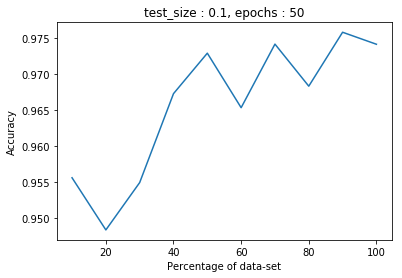

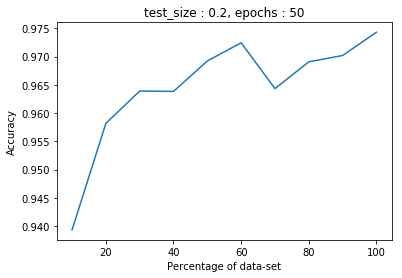

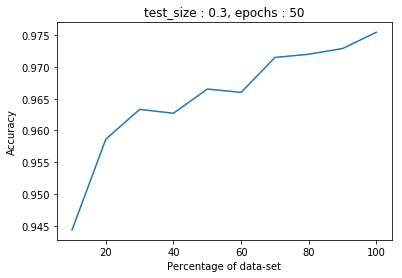

In [41]:
import matplotlib.pyplot as plt
x_axis = [10*i for i in range(1,11)]
title = []
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        title.append(["test_size : "+str(v),"epochs : " + str(e)])
for i in range(0,len(overAllY)):
    y_axis = overAllY[i]
    plt.plot(x_axis,y_axis)
    plt.xlabel('Percentage of data-set')
    plt.ylabel('Accuracy')
    plt.title(title[i][0]+", "+title[i][1])
    filename = "../dataset/malicia_result/graphs_dnn/"+str(title[i][0])+str(title[i][1])+".png"
#     print(filename)
    plt.savefig(filename)
    plt.show()

In [42]:
with open("../dataset/malicia_result/dnn_result_5iterations.txt","a+") as f:
    for i in range(0,len(overAllY)):
        line = str(title[i][0])+", "+ str(title[i][1])
        f.write(line+"\r\n")
        f.write(str(overAllY[i])+"\r\n")